# Advanced Regression - House Price Prediction for US-based Housing Company

### Importing Requried python Libraries

In [770]:
import pandas as pa
import numpy as ny
import matplotlib.pyplot as pt
import seaborn as sb
from collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Data Sourcing

### Loading and Understanding the Dataset

In [771]:
### Reading csv file
pa.set_option('display.max_rows', 1000)
pa.set_option('display.max_columns', 1000)

House_Dataset = pa.read_csv("train.csv")
House_Dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### List Total Number of rows and columns in the dataset

In [772]:
House_Dataset.info()
House_Dataset.shape
total_records= House_Dataset.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Examine the Data Visually

In [773]:
House_Dataset.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [774]:
House_Dataset.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1450         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1451         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1452         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1450       Norm   Duplex     2Story            5            5       1974   
1451       Norm     1Fam     1Story            8            5       2008   
1452       Norm   TwnhsE       SLvl            5            5       2005   
1453       Norm     1Fam     1Story            5            5       2006   
1454       Norm     1Fam     1Story            7            5       2004   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1450          1974     Gable  CompShg     VinylSd     VinylSd        NaN   
1451          2009     Gable  CompShg     CemntBd     CmentBd      Stone   
1452          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1453          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
1454          2005     Gable  CompShg     VinylSd     VinylSd        NaN   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1450         0.0        TA        TA     CBlock       Gd       TA   
1451       194.0        Gd        TA      PConc       Gd       TA   
1452        80.0        TA        TA      PConc       Gd       TA   
1453         0.0        TA        TA      PConc       Gd       TA   
1454         0.0        Gd        TA      PConc       Gd       TA   
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA  

In [775]:
House_Dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [776]:
House_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning & Preparation

### Checking null Values

In [777]:
House_Dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [778]:
##Removing any white spaces from column names.
House_Dataset = House_Dataset.rename(columns= lambda x: x.strip(), inplace=False)

In [779]:
##Checking and dropping duplicated records(if any)
House_Dataset = House_Dataset.drop_duplicates()

In [780]:
##Assess the percentage of null values in each column.
null_val_cols_prcnt = round(100*House_Dataset.isnull().sum()/len(House_Dataset.index),2)
null_val = pa.DataFrame(null_val_cols_prcnt[null_val_cols_prcnt!=0])
null_val

0
LotFrontage   17.74
Alley         93.77
MasVnrType    59.73
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
FireplaceQu   47.26
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55
PoolQC        99.52
Fence         80.75
MiscFeature   96.30

In [781]:
#Creating a dataframe to identify and sort missing values for graphical representation.
my_cols = null_val.index
vals = null_val[0]
null_val_df = pa.DataFrame({'features':my_cols,'percent':vals})
null_val_df = null_val_df.sort_values(by='percent', ascending=False)

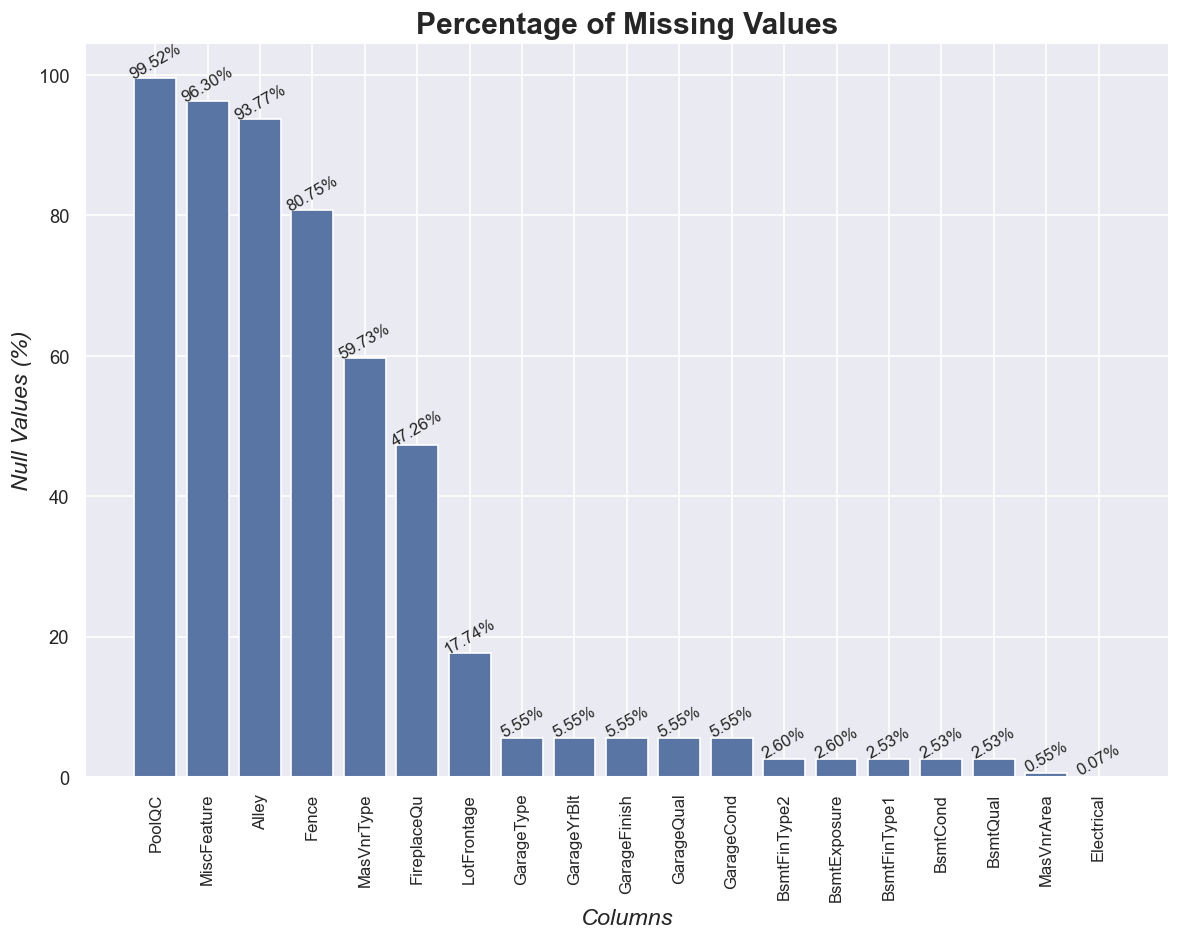

In [782]:
sb.set(style='darkgrid')
pt.figure(figsize=(10,8), dpi=120)
axis_x= sb.barplot(x=null_val_df.features, y=null_val_df.percent)

for p in axis_x.patches:
    axis_x.annotate(format(p.get_height(), '.2f')+"%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize =10, rotation=30)
pt.xticks(rotation=90, fontsize=10)        
pt.xlabel('Columns', fontsize=14, fontstyle='italic')
pt.ylabel('Null Values (%)', fontsize=14, fontstyle='italic')
pt.title('Percentage of Missing Values', fontsize=18, fontweight='bold')
pt.grid(True)
pt.tight_layout()
pt.autoscale()
pt.show()

The columns mentioned above contain missing values along with their respective percentages. However, some columns have missing values that are significant. Let's examine these.


### Examining missing entries in categorical columns (exclusively those with object types)

In [783]:
categorical_columns_with_nulls = House_Dataset.select_dtypes(include='object')
null_percentage_in_categorical = round(100 * categorical_columns_with_nulls.isnull().sum() / len(categorical_columns_with_nulls.index), 2)
null_percentage_in_categorical = null_percentage_in_categorical[null_percentage_in_categorical != 0]
null_percentage_in_categorical

Alley           93.77
MasVnrType      59.73
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [784]:
columns_with_significant_nulls = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
                                  'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 
                                  'MiscFeature', 'PoolQC']
for column_name in columns_with_significant_nulls:
    House_Dataset[column_name] = House_Dataset[column_name].fillna('None')

### Examining missing entries in categorical columns afrer fixing the null values

In [785]:
categorical_columns_with_nulls = House_Dataset.select_dtypes(include='object')
null_percentage_in_categorical = round(100 * categorical_columns_with_nulls.isnull().sum() / len(categorical_columns_with_nulls.index), 2)
null_percentage_in_categorical = null_percentage_in_categorical[null_percentage_in_categorical != 0]
null_percentage_in_categorical

Series([], dtype: float64)

### Handling Imbalance in Categorical Data: Removing object-type categorical columns where over 80% of entries are the same value

In [786]:
def identify_highly_imbalanced_columns(dataframe, threshold_percentage):
    copied_data = dataframe.copy()
    imbalanced_columns_list = []
    categorical_columns = copied_data.select_dtypes(include=['object'])
    for column in categorical_columns:
        if(copied_data[column].value_counts().max() > int(threshold_percentage * len(copied_data.index) / 100)):
            imbalanced_columns_list.append(column)
    return imbalanced_columns_list

columns_for_removal = identify_highly_imbalanced_columns(dataframe=House_Dataset, threshold_percentage=80)
print("categorical columns removed due to high imbalance:", columns_for_removal)
print("Total number of categorical columns removed:", len(columns_for_removal))
House_Dataset = House_Dataset.drop(columns_for_removal, axis=1)
House_Dataset.head()


categorical columns removed due to high imbalance: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Total number of categorical columns removed: 24


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      CollgCr     2Story            7            5       2003          2003   
1      Veenker     1Story            6            8       1976          1976   
2      CollgCr     2Story            7            5       2001          2002   
3      Crawfor     2Story            7            5       1915          1970   
4      NoRidge     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             8           0        None     Attchd   
1             1          TA             6           1          TA     Attchd   
2             1          Gd             6           1          TA     Attchd   
3             1          Gd             7           1          Gd     Detchd   
4             1          Gd             9           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2         548           0           61   
1       1976.0          RFn           2         460         298            0   
2       2001.0          RFn           2         608           0           42   
3       1998.0          Unf           3         642           0           35   
4       2000.0          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272         

In [787]:
House_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1452 non-null   float64
 18  ExterQua

#### Categorical columns of object type no longer have null values, and issues of data imbalance have been addressed.

In [788]:
object_type_columns = House_Dataset.select_dtypes(include='object').columns
categorical_df = House_Dataset.loc[:, object_type_columns]
categorical_df.head()

MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
0       RL      Reg    Inside      CollgCr     2Story     Gable     VinylSd   
1       RL      Reg       FR2      Veenker     1Story     Gable     MetalSd   
2       RL      IR1    Inside      CollgCr     2Story     Gable     VinylSd   
3       RL      IR1    Corner      Crawfor     2Story     Gable     Wd Sdng   
4       RL      IR1       FR2      NoRidge     2Story     Gable     VinylSd   

  Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd    BrkFace        Gd      PConc       Gd           No   
1     MetalSd       None        TA     CBlock       Gd           Gd   
2     VinylSd    BrkFace        Gd      PConc       Gd           Mn   
3     Wd Shng       None        TA     BrkTil       TA           No   
4     VinylSd    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType GarageFinish  
0          GLQ        Ex          Gd        None     Attchd          RFn  
1          ALQ        Ex          TA          TA     Attchd          RFn  
2          GLQ        Ex          Gd          TA     Attchd          RFn  
3          ALQ        Gd          Gd          Gd     Detchd          Unf  
4          GLQ        Ex          Gd          TA     Attchd          RFn

### Examining categorical variables

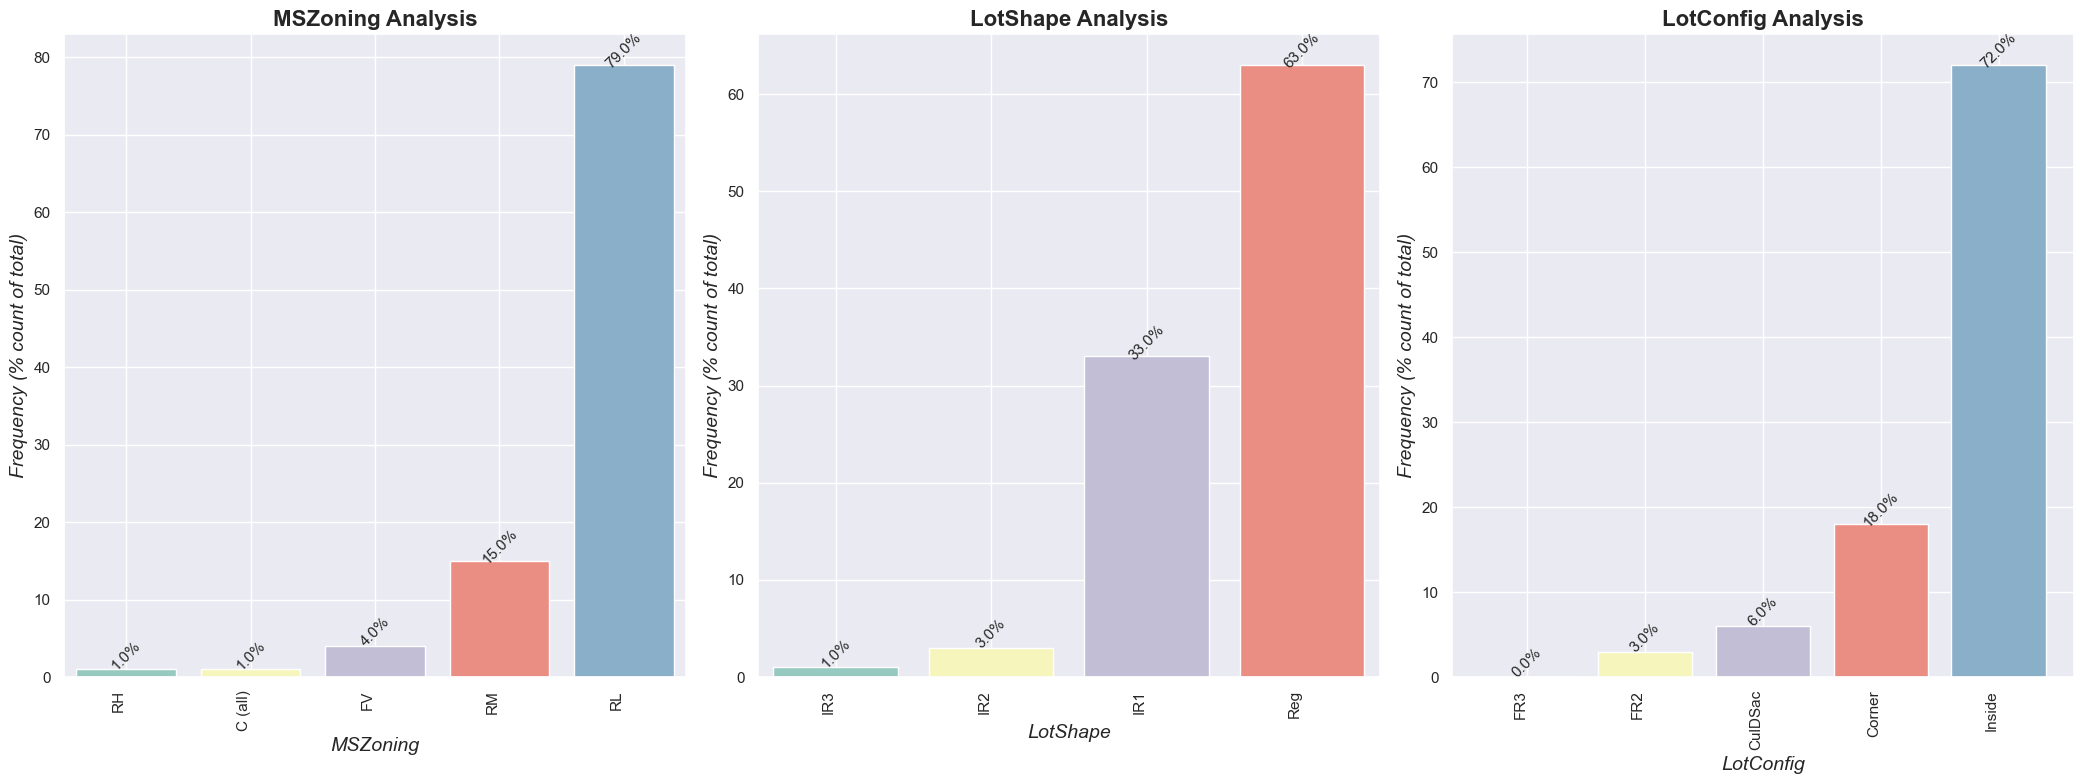

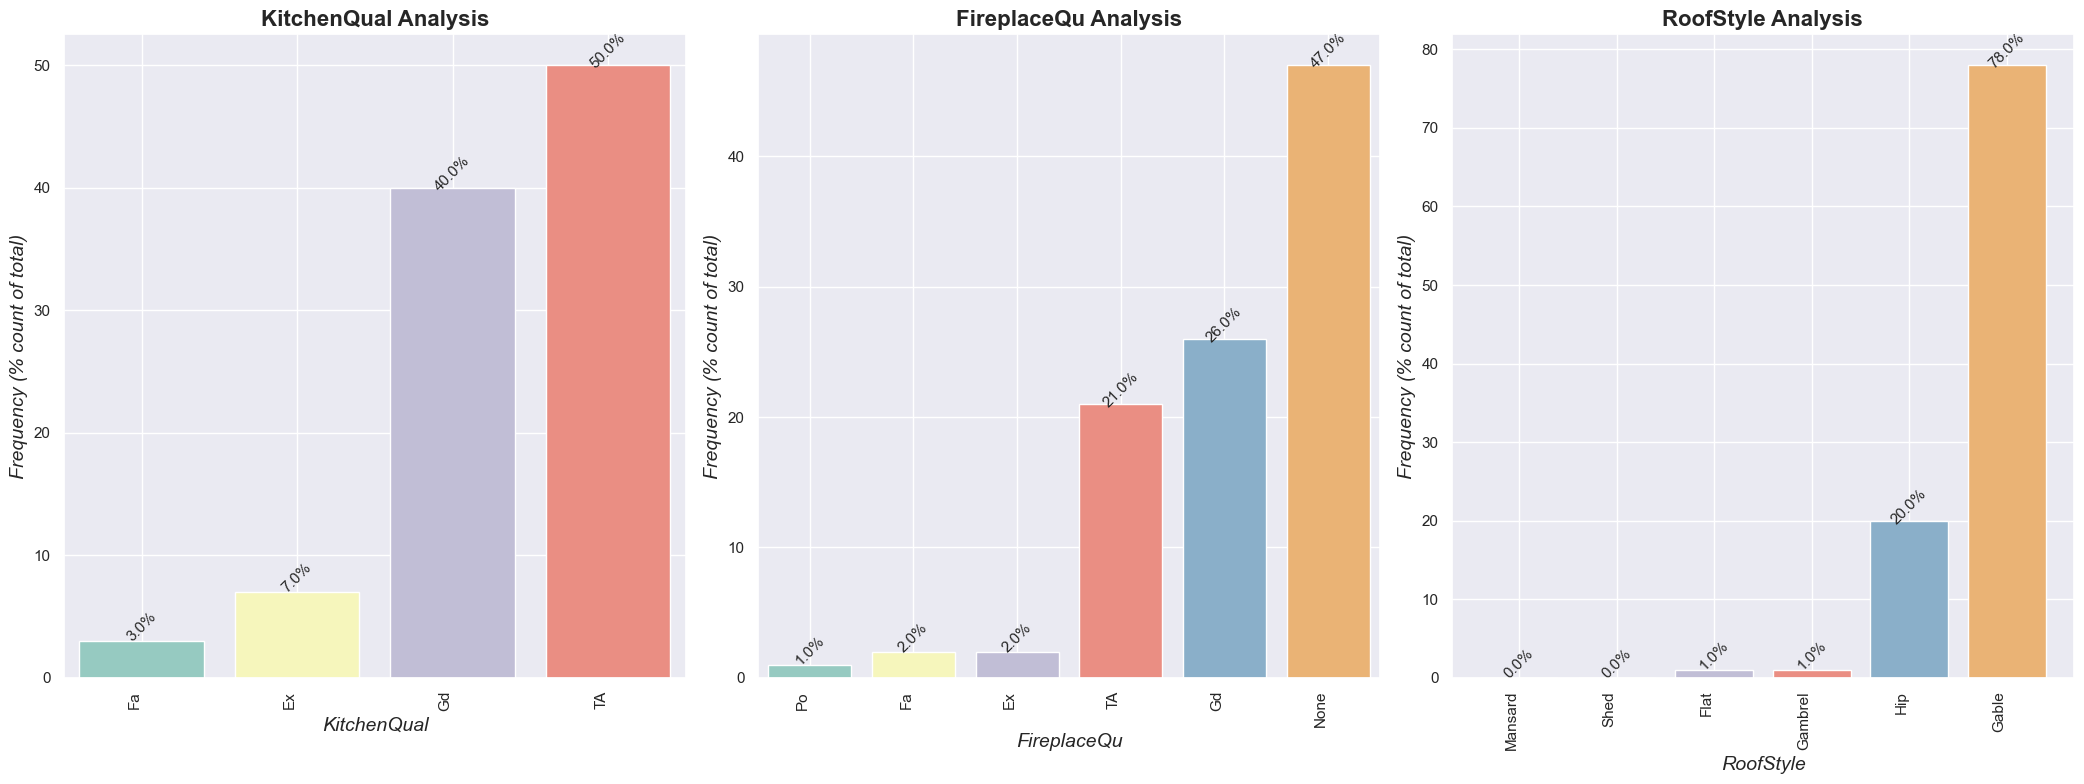

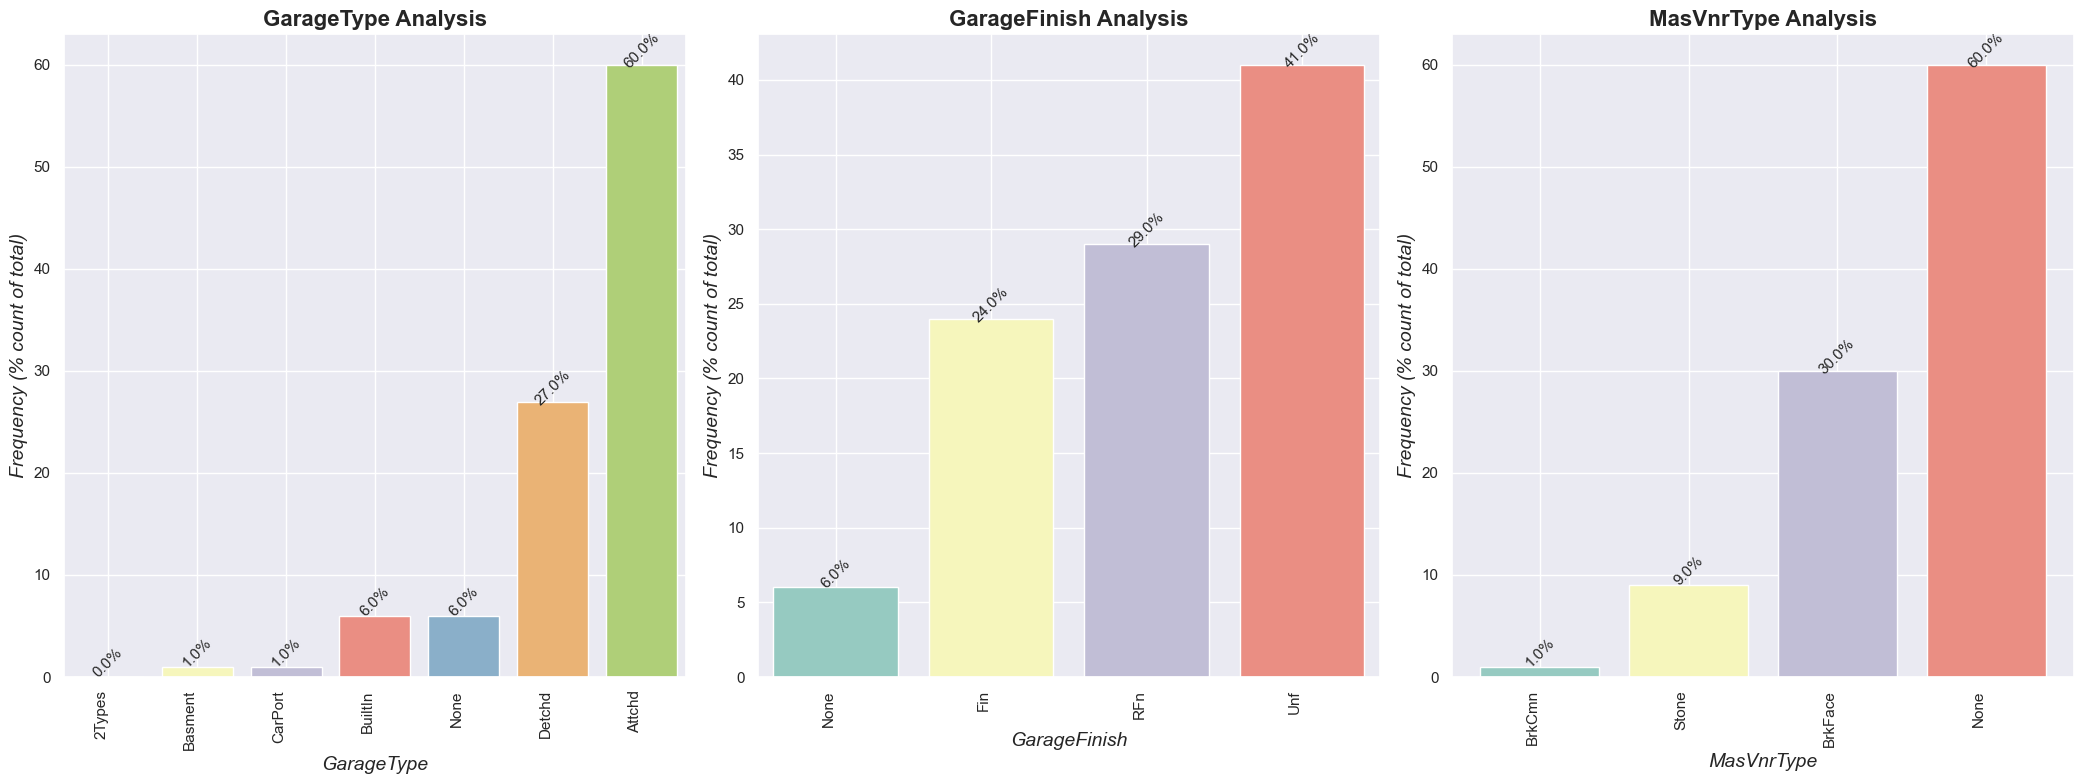

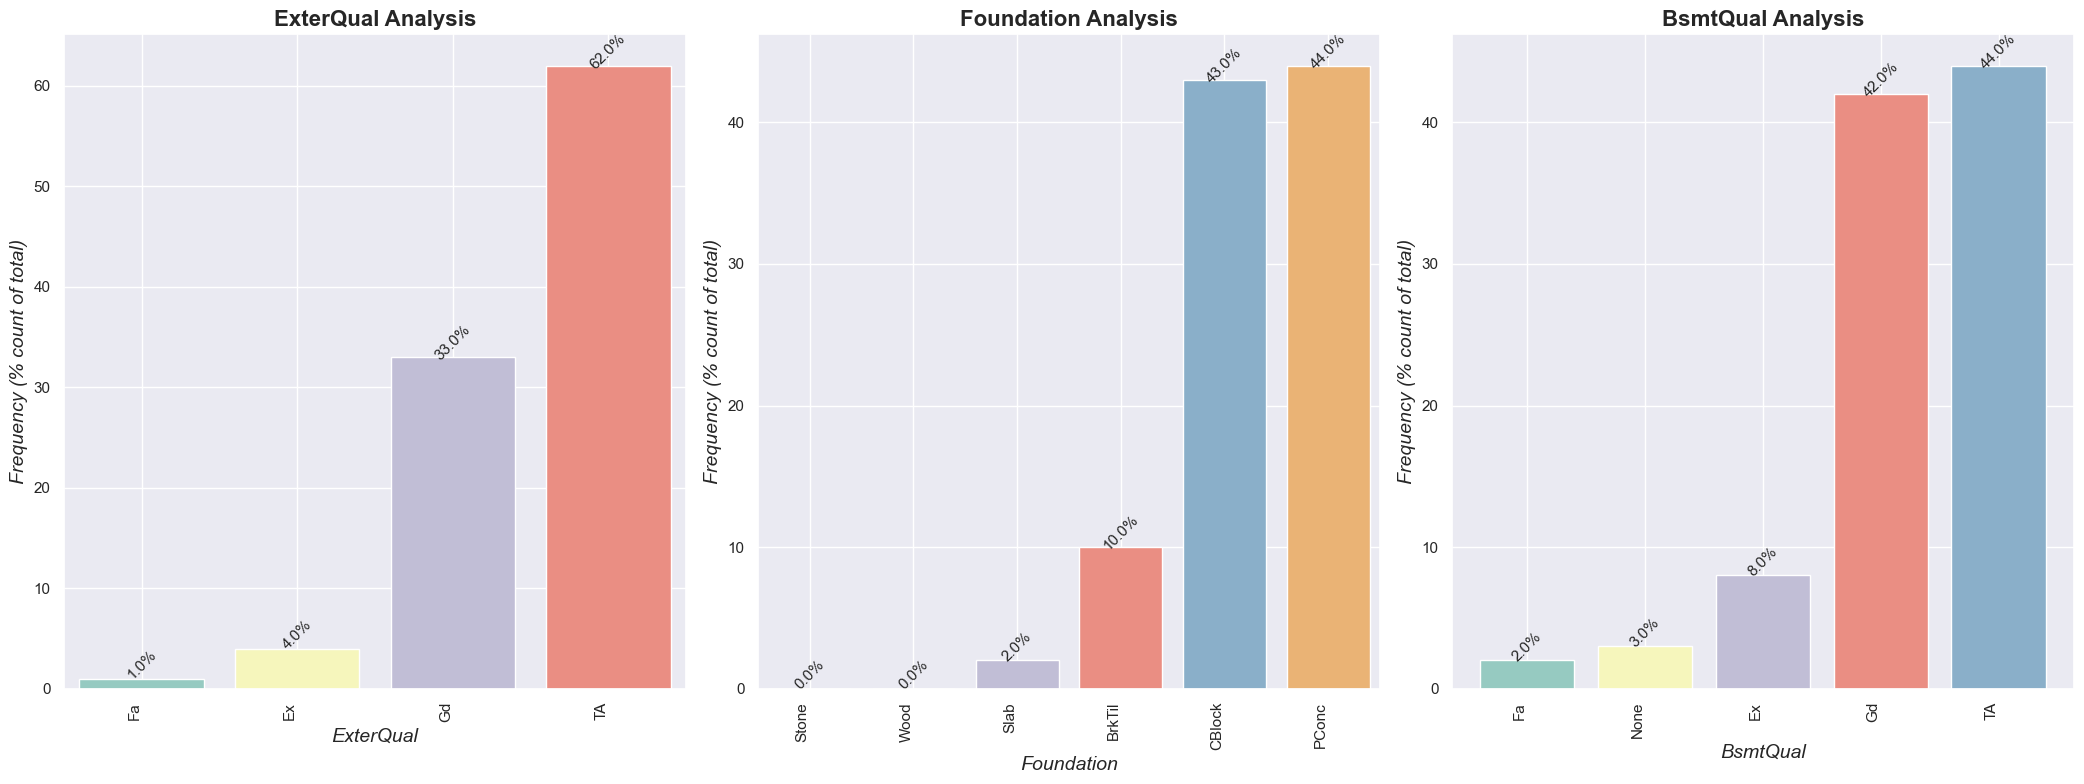

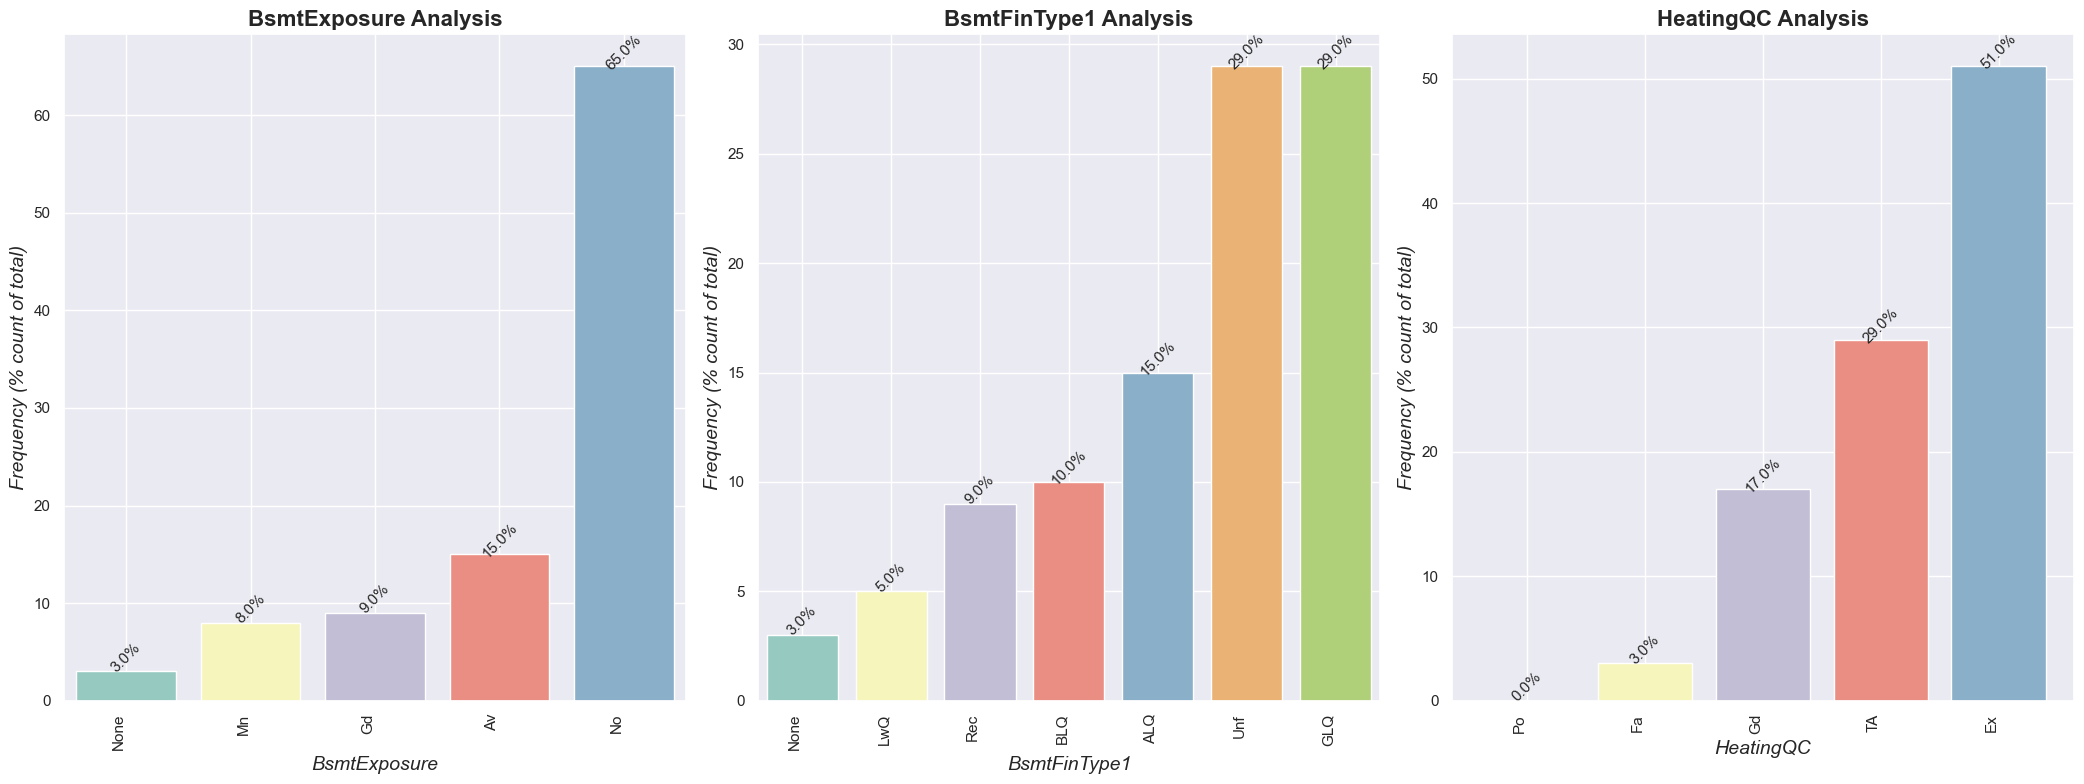

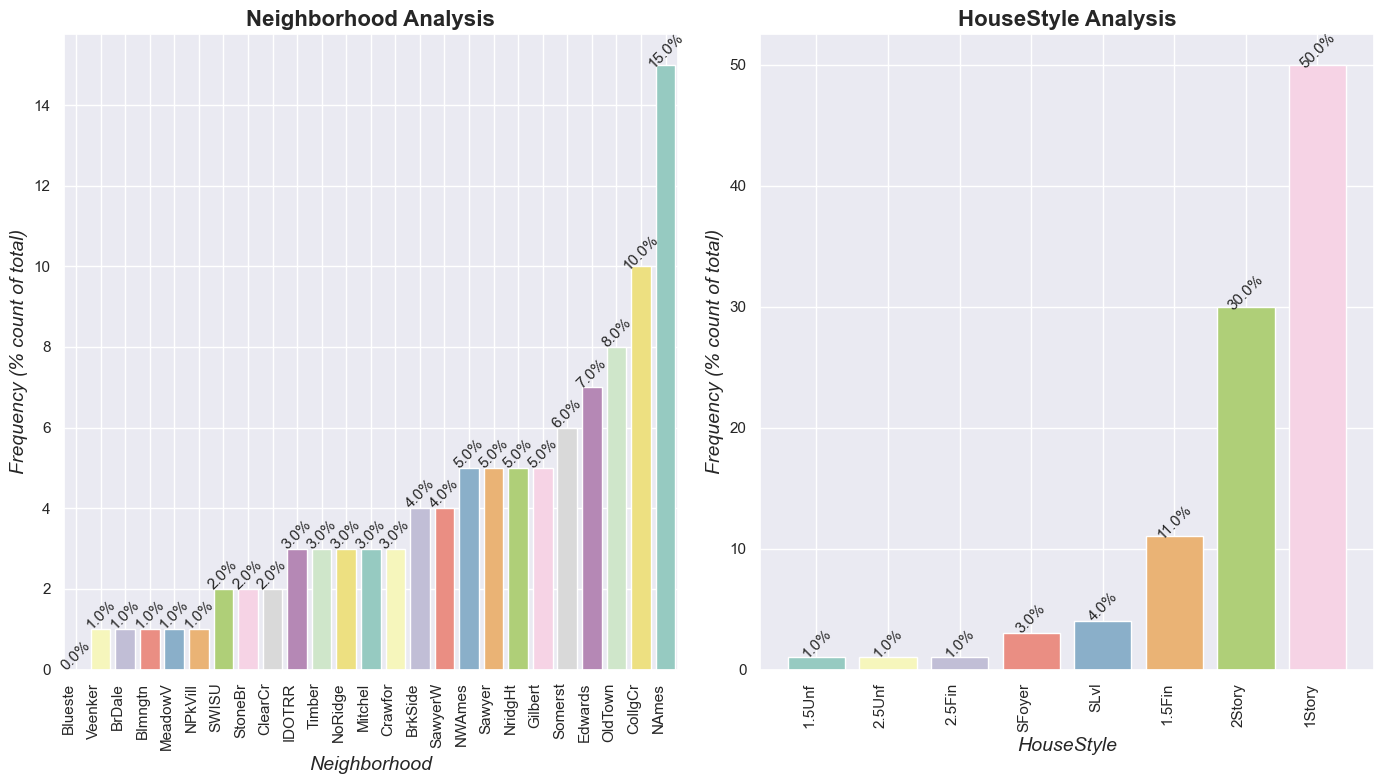

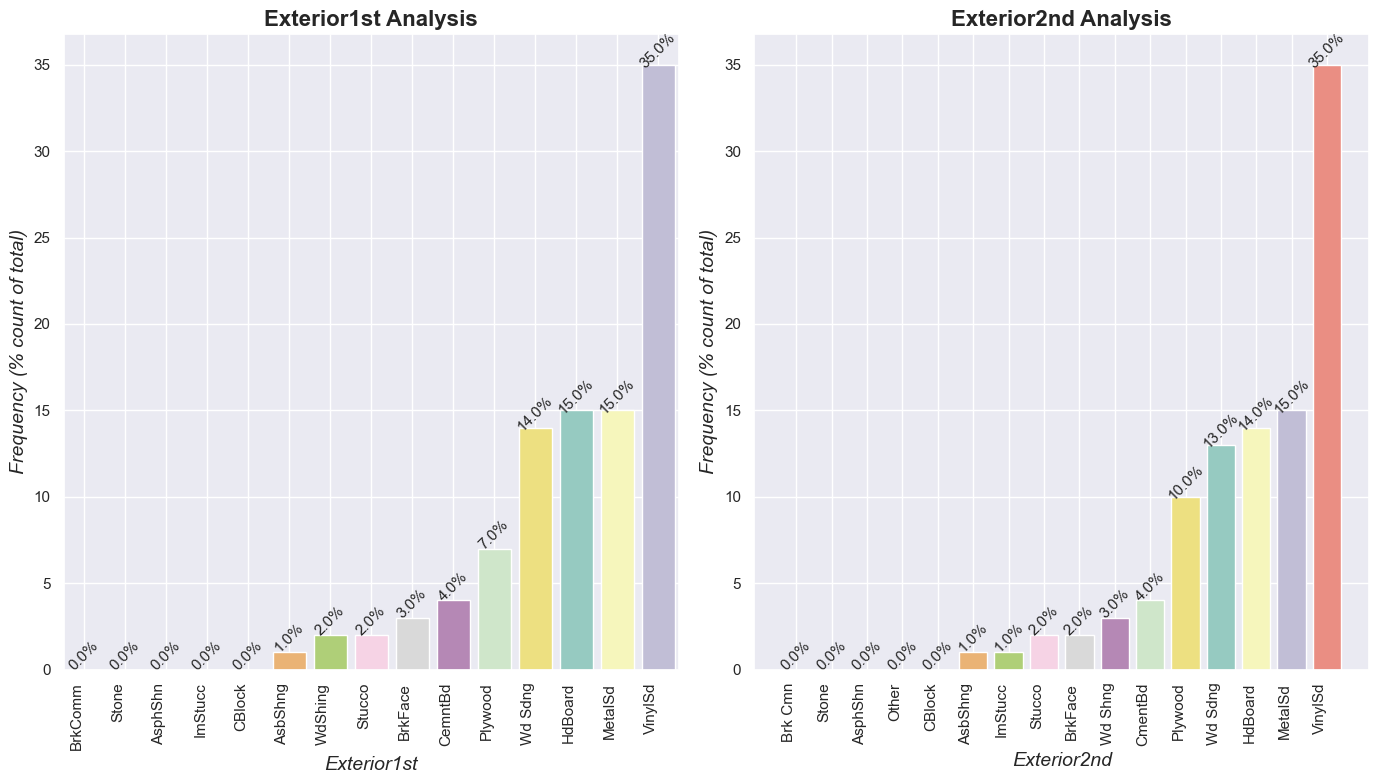

In [789]:
def plot_categorical_distributions(data_frame, feature_one, feature_two, feature_three):
    df_copy = data_frame.copy()
    sb.set(style='darkgrid')
    
    num_subplots = 3 if feature_three != 0 else 2
    pt.figure(figsize=(7 * num_subplots, 8), dpi=100)
    
    def plot_feature(feature, subplot_num):
        # Calculate the percentage and reset index with a specific name for the former index
        counts_df = pa.DataFrame((df_copy[feature].value_counts(normalize=True) * 100).round(0).sort_values())
        counts_df.reset_index(inplace=True)
        counts_df.columns = ['Category', feature]  # Rename columns appropriately
        
        plot = sb.barplot(x='Category', y=feature, data=counts_df, palette='Set3')
        pt.setp(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
        pt.xlabel(feature, fontsize=14, fontstyle='italic')
        pt.ylabel('Frequency (% count of total)', fontsize=14, fontstyle='italic')
        pt.title(feature + ' Analysis', fontsize=16, fontweight='bold')
        pt.grid(True)
        
        for bar in plot.patches:
            plot.annotate(format(bar.get_height()) + "%", 
                          (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                          ha='center', va='center', 
                          xytext=(0, 10), textcoords='offset points',
                          rotation=45, fontsize=11)
    
    pt.subplot(1, num_subplots, 1)
    plot_feature(feature_one, 1)
    
    pt.subplot(1, num_subplots, 2)
    plot_feature(feature_two, 2)
    
    if num_subplots == 3:
        pt.subplot(1, num_subplots, 3)
        plot_feature(feature_three, 3)
    
    pt.tight_layout()
    pt.autoscale()
    pt.show()

# Example usage
plot_categorical_distributions(House_Dataset, 'MSZoning', 'LotShape', 'LotConfig')
plot_categorical_distributions(House_Dataset, 'KitchenQual', 'FireplaceQu', 'RoofStyle')
plot_categorical_distributions(House_Dataset, 'GarageType', 'GarageFinish', 'MasVnrType')
plot_categorical_distributions(House_Dataset, 'ExterQual', 'Foundation', 'BsmtQual')
plot_categorical_distributions(House_Dataset, 'BsmtExposure', 'BsmtFinType1', 'HeatingQC')
plot_categorical_distributions(House_Dataset, 'Neighborhood', 'HouseStyle', 0)
plot_categorical_distributions(House_Dataset, 'Exterior1st', 'Exterior2nd', 0)

### Analysis and Findings from the Plot

1. MSZoning: Most houses are in areas meant for regular homes, not apartments or commercial buildings.
2. LotShape: Most properties have a standard, rectangular yard shape.
3. LotConfig: The majority of homes have a yard that's surrounded by other yards rather than being on the corner of a street.
4. KitchenQual: Most kitchens are of average quality.
5. FireplaceQu: Many homes don't have a fireplace, but if they do, it's usually a nice one.
6. RoofStyle: Most houses have a triangular (gable) roof.
7. GarageType: Most homes have garages that are attached to the house.
8. GarageFinish: Many garages are unfinished on the inside.
9. MasVnrType: Most houses don't have decorative stone or brick on their exterior walls.
10. ExterQual: The exterior quality of most homes is average.
11. Foundation: The base of most houses is made of poured concrete or concrete blocks.
12. BsmtQual: The basements are typically of average quality.
13. BsmtExposure: Most basements don't have windows or walkouts.
14. BsmtFinType1: Many basements are unfinished.
15. HeatingQC: Most homes have excellent heating systems.
16. Neighborhood: There's a mix of different neighborhoods, but some are more popular than others.
17. HouseStyle: Single-story homes are the most common.
18. Exterior1st: Vinyl siding is the most popular material on the outside of the homes.
19. Exterior2nd: For the second material on the outside of houses, vinyl siding is again the most popular.

### Managing Imbalance in Numeric Data Sets

In [790]:
 # Filtering for numeric data types
numeric_data_with_nulls = House_Dataset.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
null_percentage_in_numeric_data = round(100 * numeric_data_with_nulls.isnull().sum() / len(numeric_data_with_nulls.index), 2)
null_percentage_in_numeric_data = null_percentage_in_numeric_data[null_percentage_in_numeric_data != 0]
null_percentage_in_numeric_data

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [791]:
###Generating Descriptive Statistics for LotFrontage and MasVnrArea Columns
print("Statistics for LotFrontage:\n", House_Dataset.LotFrontage.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 0.98, 0.99, 1]))
print("\nStatistics for MasVnrArea:\n", House_Dataset.MasVnrArea.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 0.98, 0.99, 1]))


Statistics for LotFrontage:
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
85%        90.000000
90%        96.000000
95%       107.000000
98%       124.000000
99%       141.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64

Statistics for MasVnrArea:
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
85%       262.350000
90%       335.000000
95%       456.000000
98%       650.980000
99%       791.920000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [792]:
# Excluding zero values from 'MasVnrArea' to calculate a refined median
non_zero_MasVnrArea = House_Dataset.MasVnrArea[House_Dataset.MasVnrArea != 0]
print("Refined Statistics for MasVnrArea:\n", non_zero_MasVnrArea.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 0.98, 0.99, 1]))

Refined Statistics for MasVnrArea:
 count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


Given the presence of outliers in 'LotFrontage' and 'MasVnrArea':

For 'LotFrontage': Opt to fill missing values with the median, given its proximity to the mean value (70.05 and 69, respectively). This choice ensures a balanced approach unaffected by extreme values.

For 'MasVnrArea': Due to a significant count of zeros, which likely indicate the absence of masonry veneer for many properties, focus on data excluding these zeros for imputation. Use the median value (203) from the adjusted dataset to address missing values, considering the dataset's outliers for a more accurate representation.

In [793]:
# Imputing missing values in 'LotFrontage' and 'MasVnrArea' with their respective median values
House_Dataset['LotFrontage'] = House_Dataset['LotFrontage'].fillna(House_Dataset['LotFrontage'].median())
House_Dataset['MasVnrArea'] = House_Dataset['MasVnrArea'].fillna(non_zero_MasVnrArea.median())

# Temporarily filling missing 'GarageYrBlt' values with 0, to be addressed later
House_Dataset['GarageYrBlt'] = House_Dataset['GarageYrBlt'].fillna(0).astype(int)

# Verifying the presence of null values in numeric columns after imputation
numeric_data_nulls = House_Dataset.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])  # Filtering for numeric columns
percent_missing = round(100 * numeric_data_nulls.isnull().sum() / len(numeric_data_nulls.index), 2)
percent_missing = percent_missing[percent_missing != 0]
percent_missing

Series([], dtype: float64)

#### All missing values in the numeric columns of the dataset House_Dataset have been successfully filled, especially for 'LotFrontage', 'MasVnrArea', and temporarily for 'GarageYrBlt'. This means the dataset is now ready for more detailed analysis and use in models, with reliable and complete data.

### Derived Variables : Creating a new column 'RemodelStatus': Identifies if a house was remodelled comparing 'YearBuilt' to 'YearRemodAdd'

In [794]:
def Check_Renovation(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
House_Dataset['WhetherRemodelled'] = House_Dataset.apply(Check_Renovation, axis=1)
House_Dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      CollgCr     2Story            7            5       2003          2003   
1      Veenker     1Story            6            8       1976          1976   
2      CollgCr     2Story            7            5       2001          2002   
3      Crawfor     2Story            7            5       1915          1970   
4      NoRidge     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             8           0        None     Attchd   
1             1          TA             6           1          TA     Attchd   
2             1          Gd             6           1          TA     Attchd   
3             1          Gd             7           1          Gd     Detchd   
4             1          Gd             9           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2003          RFn           2         548           0           61   
1         1976          RFn           2         460         298            0   
2         2001          RFn           2         608           0           42   
3         1998          Unf           3         642           0           35   
4         2000          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272         

In [795]:
###There are no incorrect entries marked as '2'. Therefore, the column will indicate '0' for houses not remodelled and '1' for those that are remodelled.
House_Dataset.WhetherRemodelled.value_counts()

WhetherRemodelled
0    764
1    696
Name: count, dtype: int64

In [796]:
##Calculate 'PropertyAge': Computes the property's age from its construction year until the year it was sold

def calculate_property_age(row):
        return row['YrSold'] - row['YearBuilt']
House_Dataset['PropertyAge'] = House_Dataset.apply(calculate_property_age, axis=1)
House_Dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      CollgCr     2Story            7            5       2003          2003   
1      Veenker     1Story            6            8       1976          1976   
2      CollgCr     2Story            7            5       2001          2002   
3      Crawfor     2Story            7            5       1915          1970   
4      NoRidge     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             8           0        None     Attchd   
1             1          TA             6           1          TA     Attchd   
2             1          Gd             6           1          TA     Attchd   
3             1          Gd             7           1          Gd     Detchd   
4             1          Gd             9           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2003          RFn           2         548           0           61   
1         1976          RFn           2         460         298            0   
2         2001          RFn           2         608           0           42   
3         1998          Unf           3         642           0           35   
4         2000          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272         

In [797]:

#Removing original columns used to create new variables as they're no longer needed for further analysis.
#Deleting 'YearBuilt', 'YearRemodAdd', 'YrSold', and 'GarageYrBlt' from the dataset.

House_Dataset = House_Dataset.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis=1)
House_Dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0      CollgCr     2Story            7            5     Gable     VinylSd   
1      Veenker     1Story            6            8     Gable     MetalSd   
2      CollgCr     2Story            7            5     Gable     VinylSd   
3      Crawfor     2Story            7            5     Gable     Wd Sdng   
4      NoRidge     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706           0        150          856   
1           Gd          ALQ         978           0        284         1262   
2           Mn          GLQ         486           0        434          920   
3           No          ALQ         216           0        540          756   
4           Av          GLQ         655           0        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        Ex       856       854             0       1710             1   
1        Ex      1262         0             0       1262             0   
2        Ex       920       866             0       1786             1   
3        Gd       961       756             0       1717             1   
4        Ex      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd  Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  \
0             8           0        None     Attchd          RFn           2   
1             6           1          TA     Attchd          RFn           2   
2             6           1          TA     Attchd          RFn           2   
3             7           1          Gd     Detchd          Unf           3   
4             9           1          TA     Attchd          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  SalePrice  WhetherRemodelled  PropertyAge  
0         0        0       2     208500                  0            5  
1         0        0       5     181500                  0           31  
2         0        0       9     223500                  1            7  
3         0        0       2     140000

In [798]:
House_Dataset.shape

(1460, 55)

### Addressing Imbalance in Numeric Data: Eliminating numeric columns where a single value represents over 80% of the data.

In [799]:
## Identifying and removing numeric columns with over 80% of values being the same.

def find_skewed_numeric_columns(dataset, threshold_percentage):
    temp_dataset = dataset.copy()
    skewed_columns = []
    numeric_columns = temp_dataset.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
    for column in numeric_columns:
        if(temp_dataset[column].value_counts().max() > int(threshold_percentage * len(temp_dataset.index) / 100)):
            skewed_columns.append(column)
    return skewed_columns

## Identifying numeric columns with skewed distribution to remove
columns_to_remove = find_skewed_numeric_columns(dataset=House_Dataset, threshold_percentage=80)
print("Numeric columns to be dropped:", columns_to_remove)
print("\nTotal numeric columns dropped: ", len(columns_to_remove))

## Removing columns with predominantly one value
House_Dataset = House_Dataset.drop(columns_to_remove, axis=1)
House_Dataset.head()

Numeric columns to be dropped: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Total numeric columns dropped:  9


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0      CollgCr     2Story            7            5     Gable     VinylSd   
1      Veenker     1Story            6            8     Gable     MetalSd   
2      CollgCr     2Story            7            5     Gable     VinylSd   
3      Crawfor     2Story            7            5     Gable     Wd Sdng   
4      NoRidge     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             3          Gd             8           0        None     Attchd   
1             3          TA             6           1          TA     Attchd   
2             3          Gd             6           1          TA     Attchd   
3             3          Gd             7           1          Gd     Detchd   
4             4          Gd             9           1          TA     Attchd   

  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  \
0          RFn           2         548           0           61       2   
1          RFn           2         460         298            0       5   
2          RFn           2         608           0           42       9   
3          Unf           3         642           0           35       2   
4          RFn           3         836         192           84      12   

   SalePrice  WhetherRemodelled  PropertyAge  
0     208500                  0            5  
1     181500                  0           31  
2     223500                  1            7  
3     140000                  1           91  
4     250000                  0            8

In [800]:
## Calculating the percentage of missing values across the entire dataframe
null_values_percentage = round(100 * House_Dataset.isnull().sum() / len(House_Dataset.index), 2)
non_zero_missing = null_values_percentage[null_values_percentage != 0]
non_zero_missing

Series([], dtype: float64)

#### The dataset 'House_Dataset', used for predicting housing prices, contains no missing values.

#### Evaluating Numeric Categorical Data

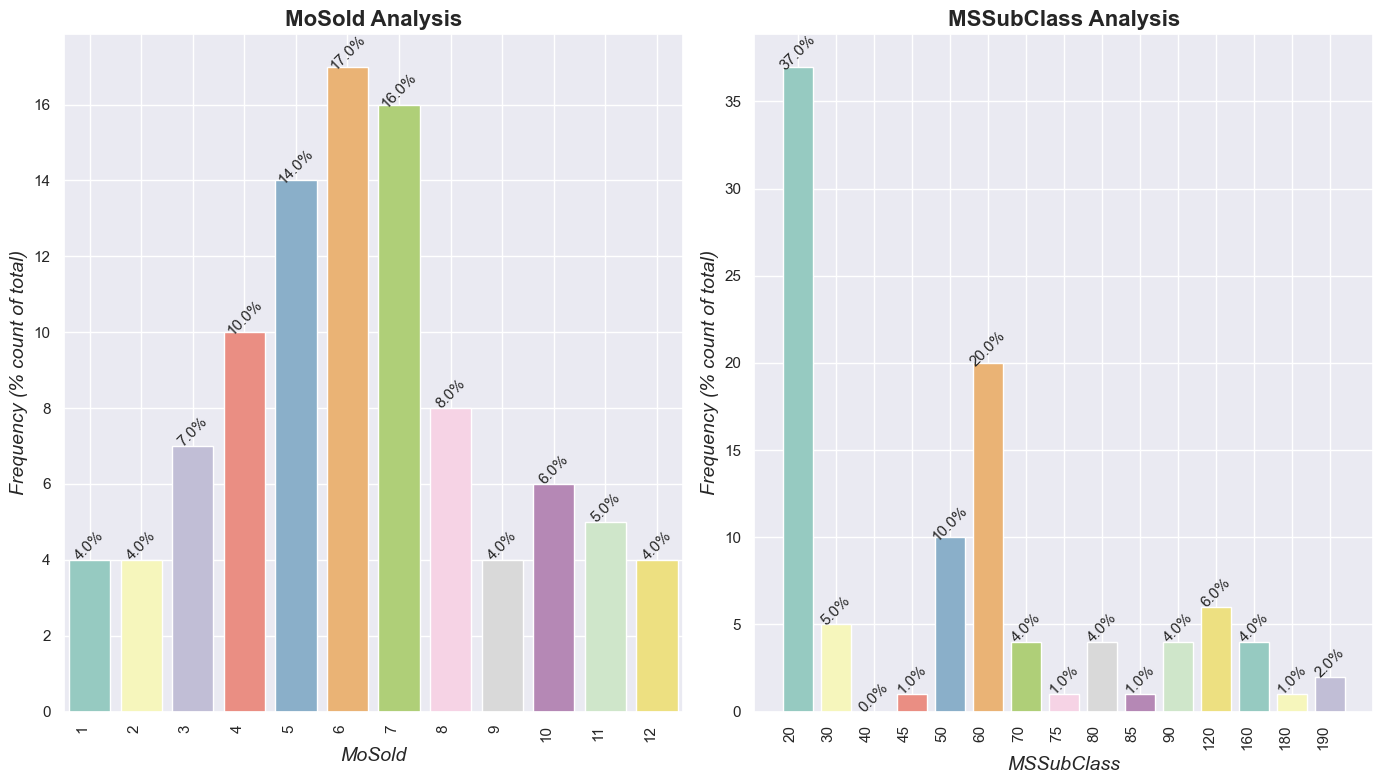

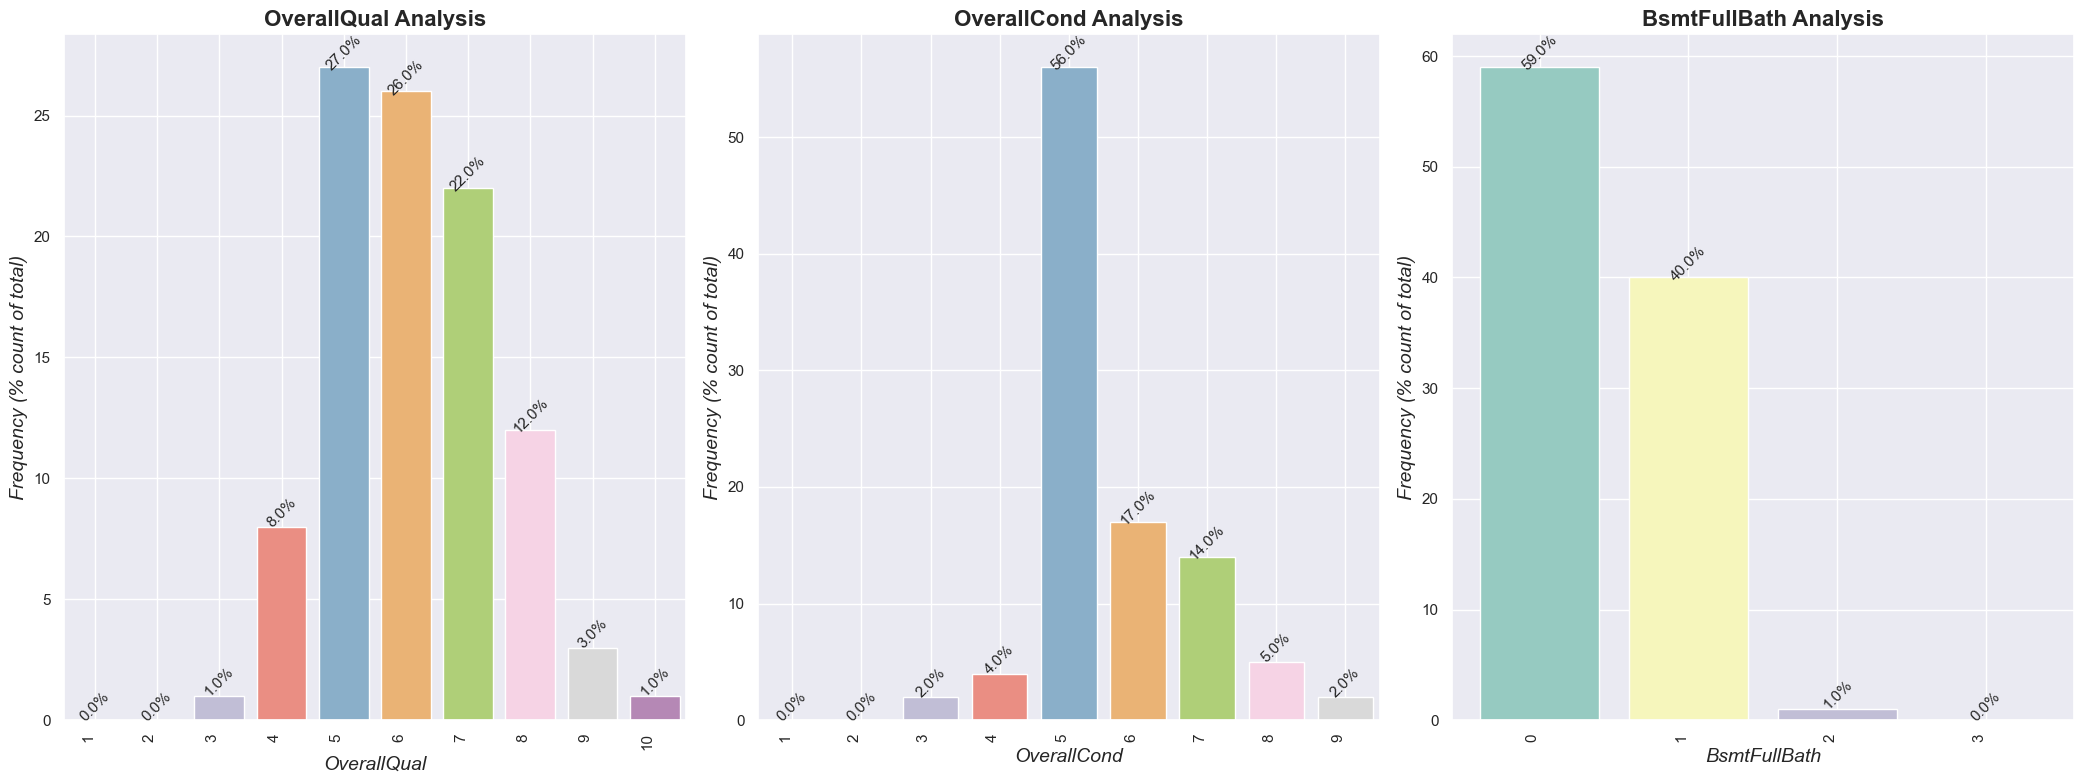

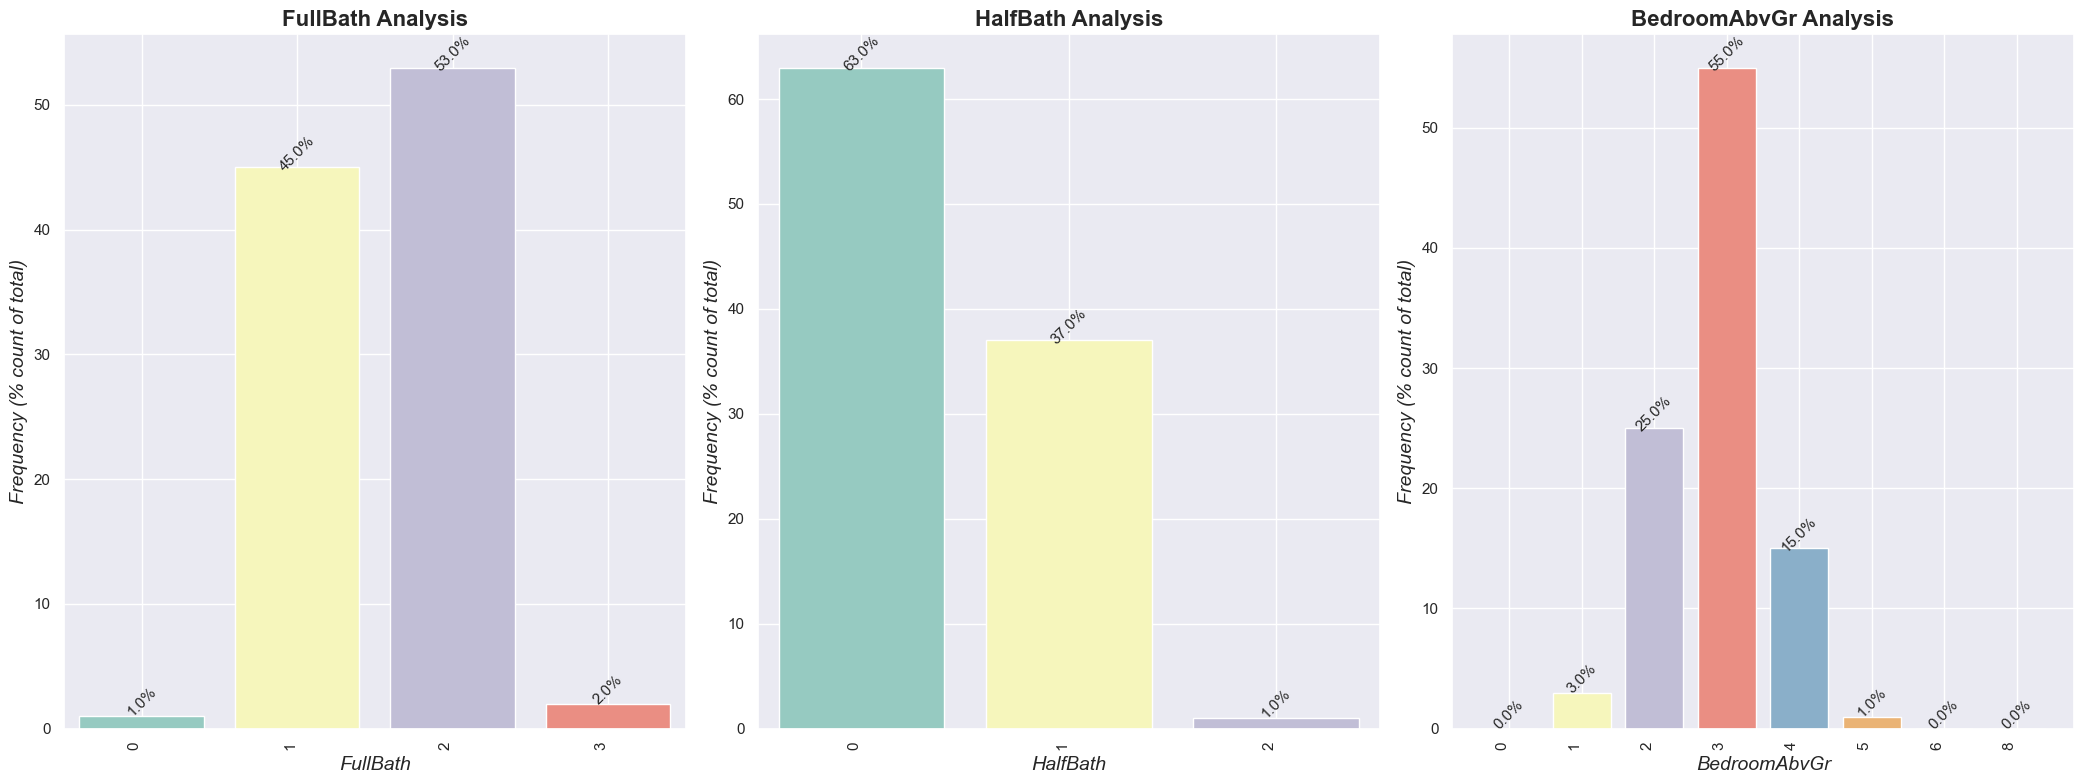

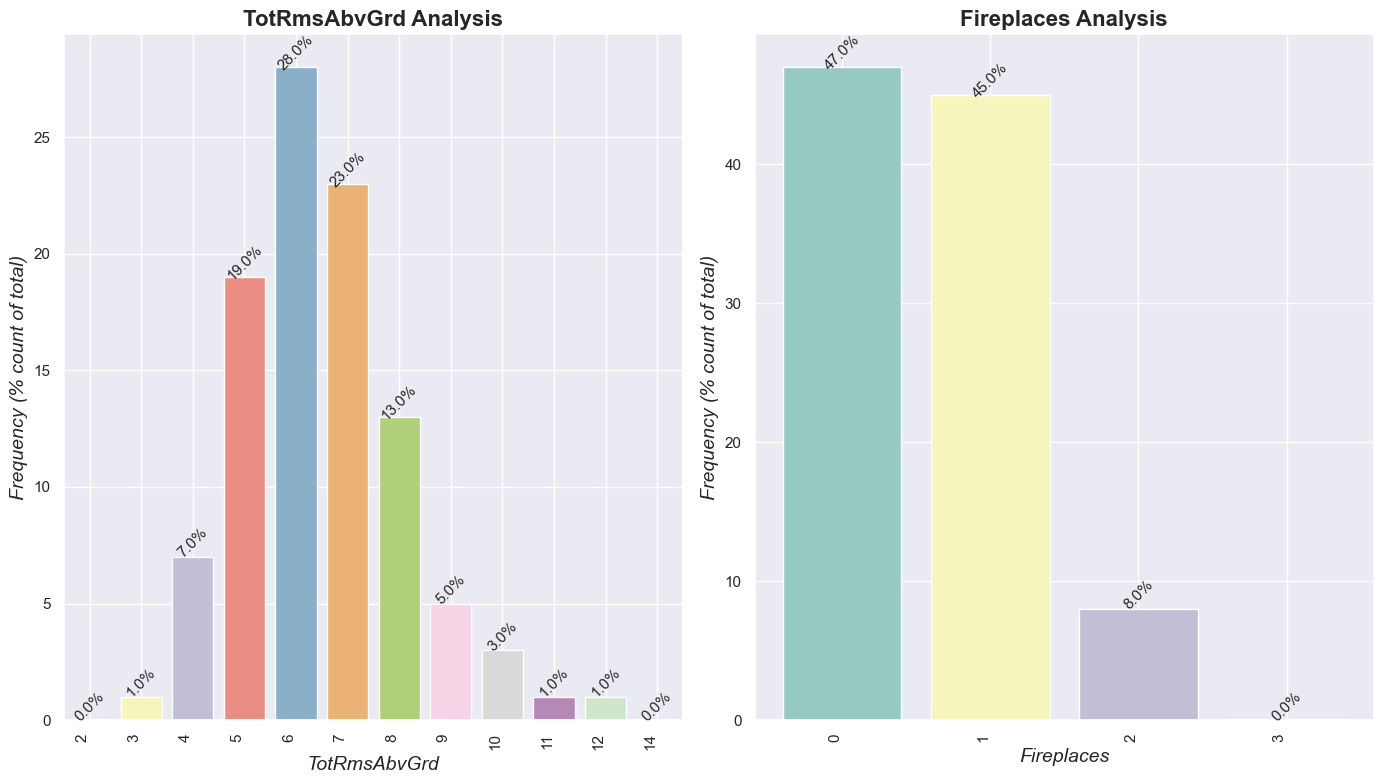

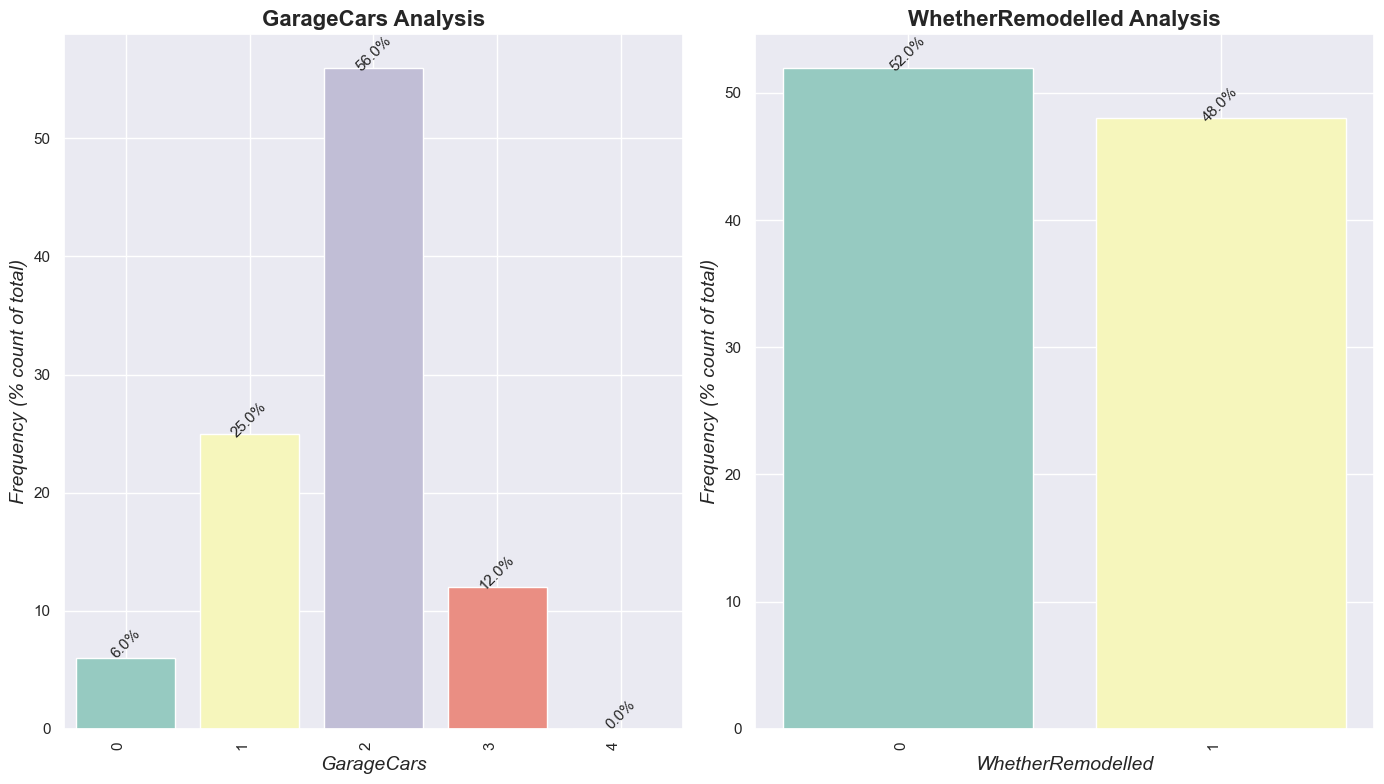

In [801]:
Numeric_cateogorical_var = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath',
                            'FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','WhetherRemodelled']

plot_categorical_distributions(House_Dataset, 'MoSold', 'MSSubClass',0)
plot_categorical_distributions(House_Dataset, 'OverallQual','OverallCond','BsmtFullBath')
plot_categorical_distributions(House_Dataset, 'FullBath','HalfBath','BedroomAbvGr')
plot_categorical_distributions(House_Dataset, 'TotRmsAbvGrd','Fireplaces',0)
plot_categorical_distributions(House_Dataset, 'GarageCars','WhetherRemodelled',0)

### Analysis and Findings from the Plot


1. Popular Sale Months: Houses tend to sell the most in June, with July and May also being common times for sales.
2. Favored House Styles: The 1-story homes built after 1946 are the most sought after, with 2-story homes from the same period being the next choice.
3. Quality and Maintenance: People usually go for homes that are of average or slightly above-average build and maintenance quality.
4. Bathrooms and Bedrooms: There's a clear preference for homes without basement bathrooms and those with two full bathrooms. Three bedrooms are typically desired.
5. Living Space: A home with six or seven rooms is often chosen, suggesting a preference for more space.
6. Fireplaces and Renovations: These don't seem to strongly influence buying decisions.
7. Garage Size: Two-car garages are the most preferred, with one-car garages also being popular.

#### Deleting the 'Id' and 'MoSold' columns since they are not relevant to our analysis.

In [802]:
House_Dataset = House_Dataset.drop(['Id','MoSold'], axis=1)


### Handling Outlier Values

In [803]:
House_Dataset.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
10%      20.000000    49.000000    5000.000000     5.000000     5.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
98%     188.200000   120.820000   25251.620000     9.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
100%    190.000000   313.000000  215245.000000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    104.229452   443.639726   567.240411  1057.429452  1162.626712   
std     180.717988   456.098091   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
10%       0.000000     0.000000    74.900000   636.900000   756.900000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000   
75%     168.000000   712.250000   808.000000  1298.250000  1391.250000   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000   
98%     650.820000  1442.640000  1678.200000  2001.640000  2072.280000   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000   
100%   1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath     FullBath     HalfBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    346.992466  1515.463699      0.425342     1.565068     0.382877   
std     436.528436   525.480383      0.518911     0.550916     0.502885   
min       0.000000   334.000000      0.000000     0.000000     0.000000   
10%       0.000000   912.000000      0.000000     1.000000     0.000000   
25%       0.000000  1129.500000      0.000000     1.000000     0.000000   
50%       0.000000  1464.000000      0.000000     2.000000     0.000000   
75%     728.000000  1776.750000      1.000000     2.000000     1.000000   
95%    1141.050000  2466.100000      1.000000     2.000000     1.000000   
98%    1318.560000  2782.380000      1.000000     3.000000     1.000000   
99%    1418.920000  3123.480000      2.000000     3.000000     1.000000   
100%   2065.000000  5642.000000      3.000000     3.000000     2.000000   
max    2065.000000  5642.000000      3.000000     3.000000     2.000000   

       BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       2.866438      6.517808     0.613014     1.767123   472.980137   
std        0.815778      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
10%        2.000000      5.000000     0.000000     1.000000   240.000000   
25%        2.000000      5.000000     0.000000     1.000000   334.500000   
50%        3.000000      6.000000     1.000000     2.000000   480.000000   
75%        3.000000      7.000000     1.000000     2.000000   576.000000   
95%        4.000000     10.000000     2.000000     3.000000   850.100000   
98%        4.000000     10.820000     2.000000     3.000000   907.460000   
99%        5.000000

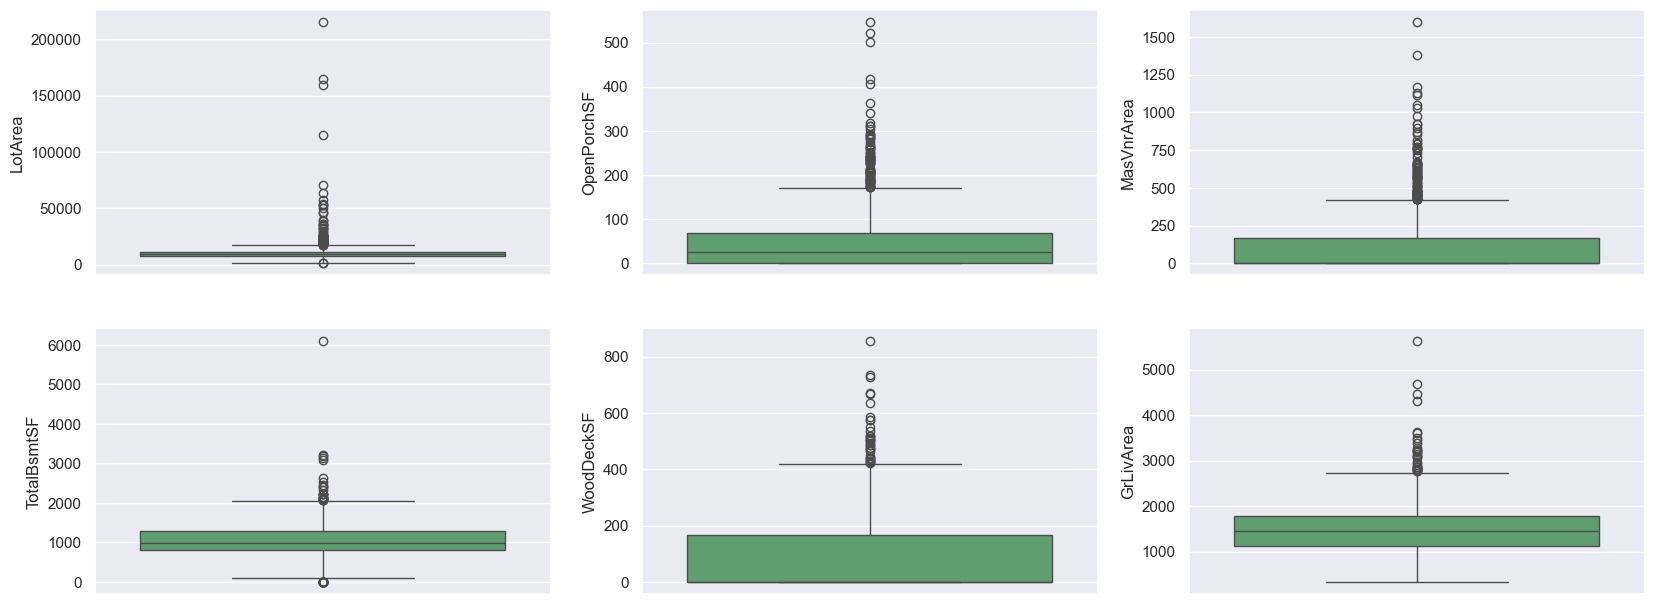

In [804]:
pt.figure(figsize=(20, 20))
pt.subplot(5,3,1)
sb.boxplot(y = 'LotArea', color='g', data = House_Dataset)
pt.subplot(5,3,2)
sb.boxplot(y = 'OpenPorchSF', color='g', data = House_Dataset)
pt.subplot(5,3,3)
sb.boxplot(y = 'MasVnrArea', color='g', data = House_Dataset)
pt.subplot(5,3,4)
sb.boxplot(y = 'TotalBsmtSF', color='g', data = House_Dataset)
pt.subplot(5,3,5)
sb.boxplot(y = 'WoodDeckSF', color='g', data = House_Dataset)
pt.subplot(5,3,6)
sb.boxplot(y = 'GrLivArea', color='g', data = House_Dataset)
pt.show()

In [805]:
## Eliminating Outliers
# Trimming values above the 98th percentile for LotArea

percentile_LotArea = House_Dataset['LotArea'].quantile(0.98)
House_Dataset = House_Dataset[House_Dataset["LotArea"] < percentile_LotArea]

# Trimming values above the 99th percentile for WoodDeckSF
percentile_WoodDeckSF = House_Dataset['WoodDeckSF'].quantile(0.99)
House_Dataset = House_Dataset[House_Dataset["WoodDeckSF"] < percentile_WoodDeckSF]

# Trimming values above the 99th percentile for OpenPorchSF
percentile_OpenPorchSF = House_Dataset['OpenPorchSF'].quantile(0.99)
House_Dataset = House_Dataset[House_Dataset["OpenPorchSF"] < percentile_OpenPorchSF]

# Trimming values above the 99th percentile for TotalBsmtSF
percentile_TotalBsmtSF = House_Dataset['TotalBsmtSF'].quantile(0.99)
House_Dataset = House_Dataset[House_Dataset["TotalBsmtSF"] < percentile_TotalBsmtSF]

In [806]:
# Calculating the percentage of data remaining after removing outliers

percentage_retained = round(100 * (len(House_Dataset) / total_records), 2)
print(percentage_retained, "%")

94.93 %


## Data Visualization

### Visualising target Variable - SalePrice


 mu = 176116.17 and sigma = 71240.39



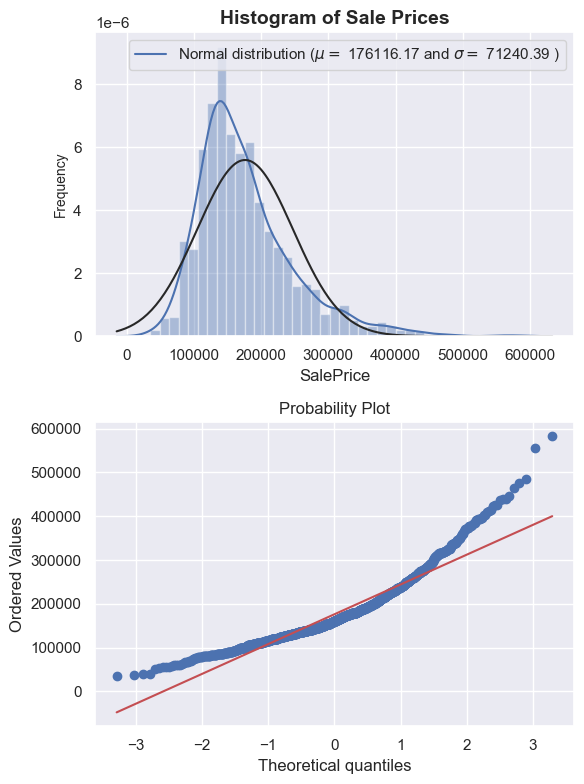

In [807]:
pt.figure(figsize=(6,8), dpi=100)
pt.subplot(211)
sb.distplot(House_Dataset['SalePrice'], fit=norm)

# Calculate and print the mean (mu) and standard deviation (sigma) of SalePrice
(mu, sigma) = norm.fit(House_Dataset['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Add a legend to the histogram
pt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
pt.ylabel('Frequency', fontsize=10)
pt.title('Histogram of Sale Prices', fontsize=14, fontweight='bold')

# Generate and plot the QQ-plot for SalePrice
pt.subplot(212)
res = stats.probplot(House_Dataset['SalePrice'], plot=pt)

# Adjust the layout of the plots for better display
pt.autoscale()
pt.tight_layout()
pt.show()

#### Insight: The plot shows that the sale prices aren't spread out evenly, and they don't line up with the expected pattern (the red line). We'll use a log transformation to straighten this out.


 Mean = 12.00 and Standard Deviation = 0.38



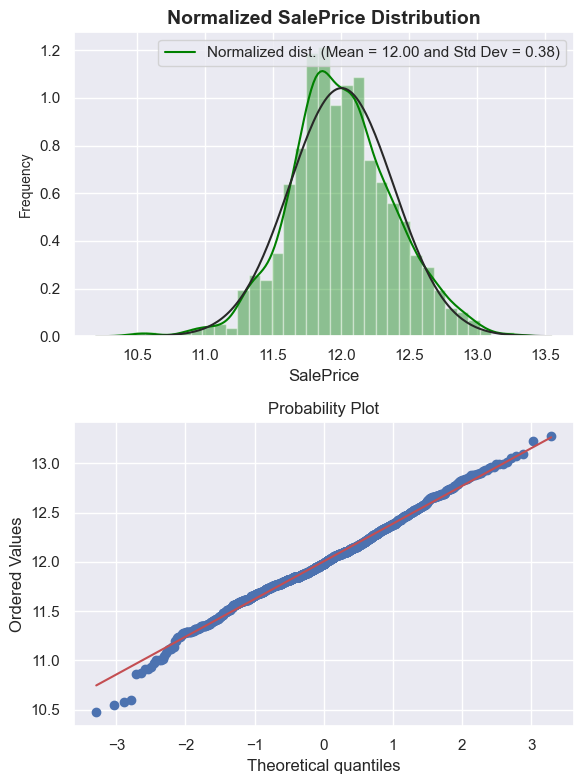

In [808]:
## Applying log transformation to 'SalePrice' to normalize its distribution.
## 'log1p' function is used to transform values by log(1+x) to avoid log(0).
House_Dataset["SalePrice"] = ny.log1p(House_Dataset["SalePrice"])

pt.figure(figsize=(6,8), dpi=100)
pt.subplot(211)
sb.distplot(House_Dataset['SalePrice'], fit=norm, color='green')

# Calculating and displaying the mean and standard deviation after transformation
(mu, sigma) = norm.fit(House_Dataset['SalePrice'])
print('\n Mean = {:.2f} and Standard Deviation = {:.2f}\n'.format(mu, sigma))

# Displaying the distribution with updated legend
pt.legend(['Normalized dist. (Mean = {:.2f} and Std Dev = {:.2f})'.format(mu, sigma)], loc='best')
pt.ylabel('Frequency', fontsize=10)
pt.title("Normalized SalePrice Distribution", fontsize=14, fontweight='bold')

# Generating and plotting the QQ-plot to visualize the normalization effect
pt.subplot(212)
res = stats.probplot(House_Dataset['SalePrice'], plot=pt)

# Adjusting plot layout for clear visualization
pt.autoscale()
pt.tight_layout()
pt.show()

#### Insight: 
1. After applying a log transformation, the SalePrice distribution looks much more like a normal curve. 
2. The probability plot shows the data points lining up well with the red line, meaning the skewness in SalePrice is mostly fixed, though there's still a bit of unevenness left.

In [809]:
def plot_scatter_three_vars(variable1, variable2, variable3):
    pt.figure(figsize=(15,5), dpi=150)
    sb.set_style("darkgrid")
    # First subplot
    pt.subplot(1,3,1)
    pt.scatter(x= House_Dataset[variable1], y= House_Dataset['SalePrice'], color='green')
    pt.title("Sale Price vs " + variable1, fontweight='bold', fontsize=15)
    pt.xlabel(variable1, fontsize=13, fontstyle='italic')
    pt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    pt.grid(True)
    # Second subplot
    pt.subplot(1,3,2)
    pt.scatter(x= House_Dataset[variable2], y= House_Dataset['SalePrice'], color='green')
    pt.title("Sale Price vs " + variable2, fontweight='bold', fontsize=15)
    pt.xlabel(variable2, fontsize=13, fontstyle='italic')
    pt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    pt.grid(True)
    # Third subplot
    pt.subplot(1,3,3)
    pt.scatter(x= House_Dataset[variable3], y= House_Dataset['SalePrice'], color='green')
    pt.title("Sale Price vs " + variable3, fontweight='bold', fontsize=15)
    pt.xlabel(variable3, fontsize=13, fontstyle='italic')
    pt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    pt.grid(True)
    
    pt.autoscale()
    pt.tight_layout()
    pt.show()
    
# Displaying two scatter plots simultaneously
def plot_scatter_two_vars(variable1, variable2):
    sb.set_style("darkgrid")
    pt.figure(figsize=(10,5), dpi=150)
    # First subplot
    pt.subplot(121)
    pt.scatter(x= House_Dataset[variable1], y= House_Dataset['SalePrice'], color='green')
    pt.title("Sale Price vs " + variable1, fontweight='bold', fontsize=15)
    pt.xlabel(variable1, fontsize=13, fontstyle='italic')
    pt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    pt.grid(True)
    # Second subplot
    pt.subplot(122)
    pt.scatter(x= House_Dataset[variable2], y= House_Dataset['SalePrice'], color='green')
    pt.title("Sale Price vs " + variable2, fontweight='bold', fontsize=15)
    pt.xlabel(variable2, fontsize=13, fontstyle='italic')
    pt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    pt.grid(True)
    
    pt.autoscale()
    pt.tight_layout()
    pt.show()

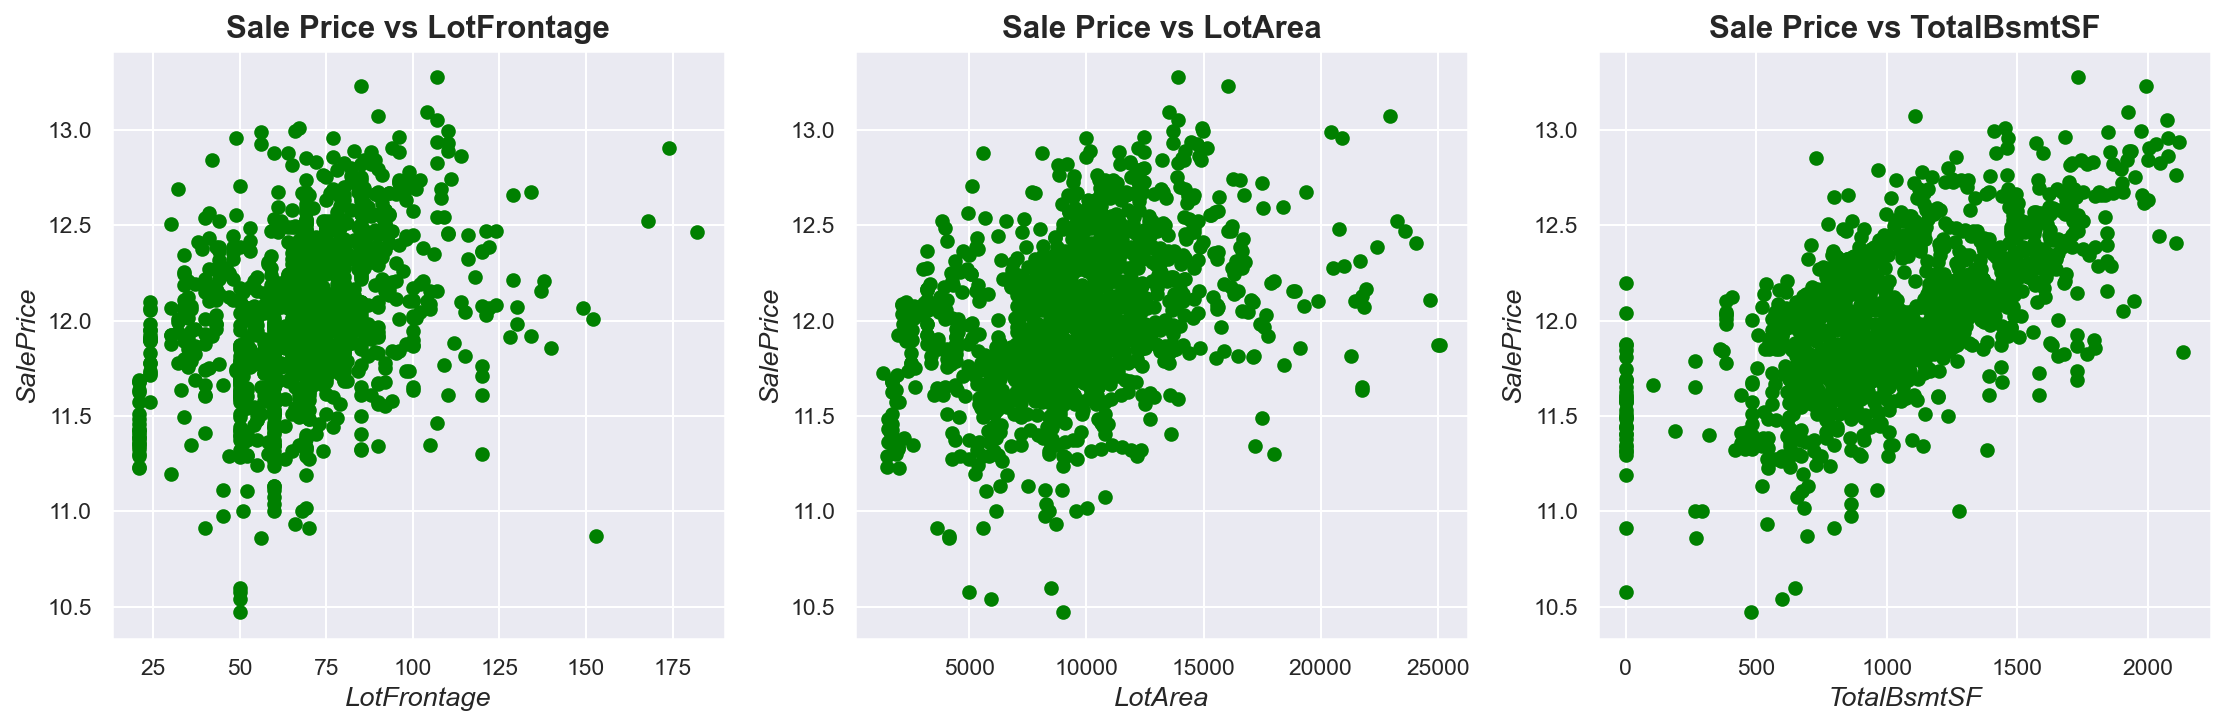

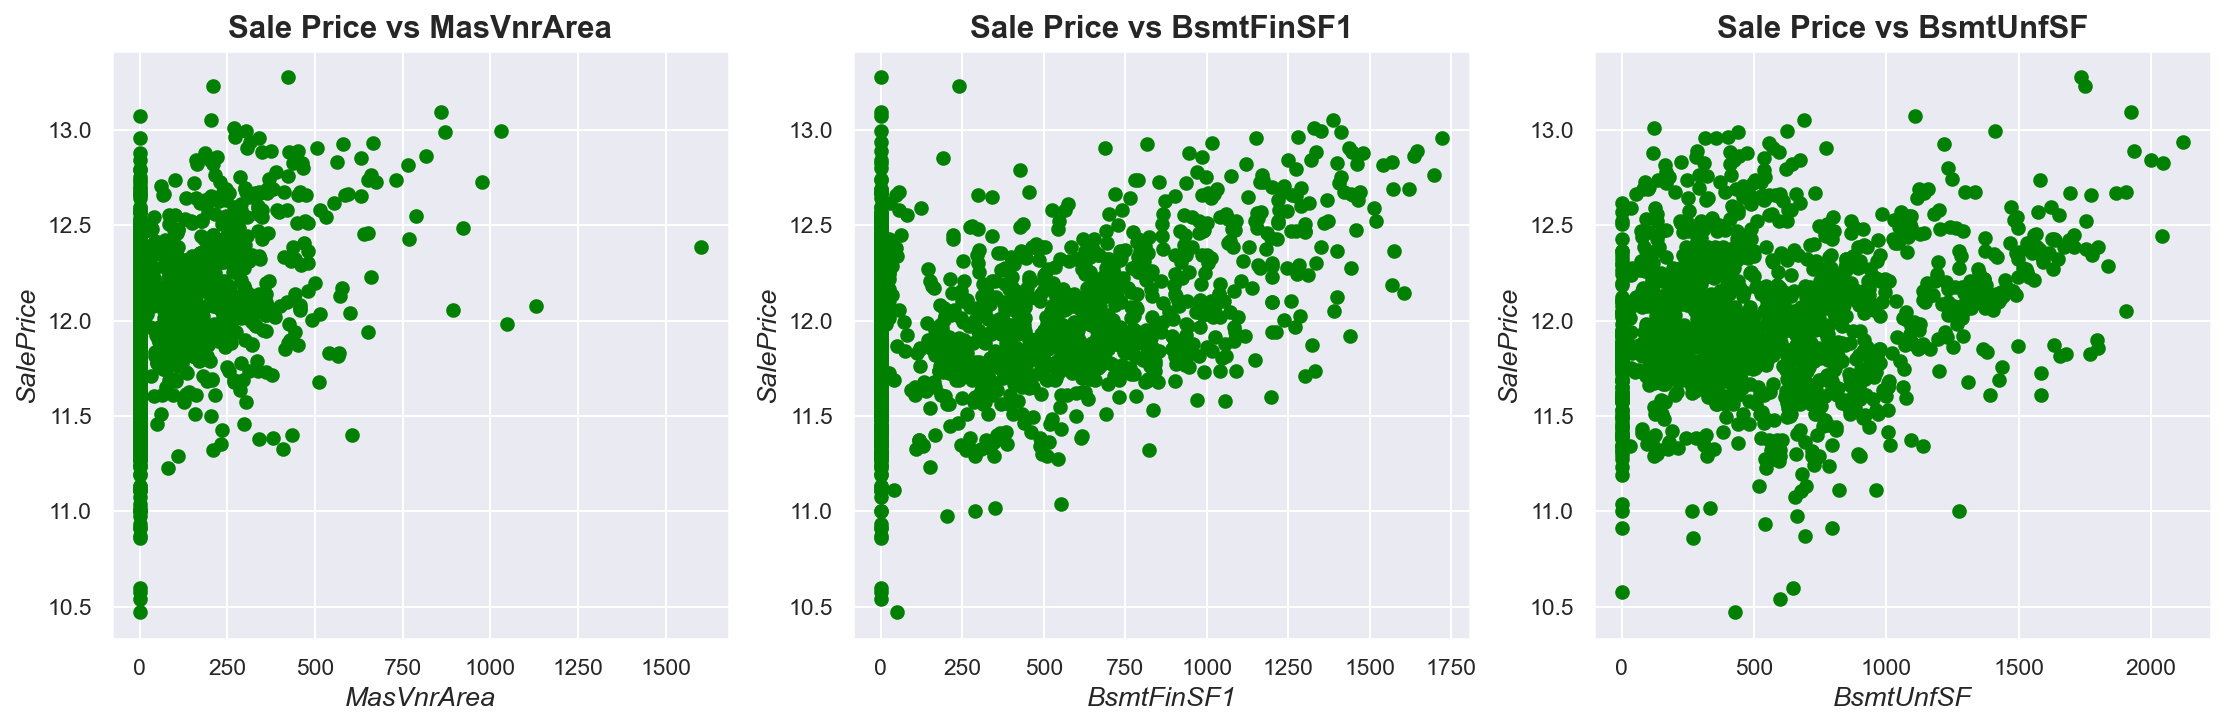

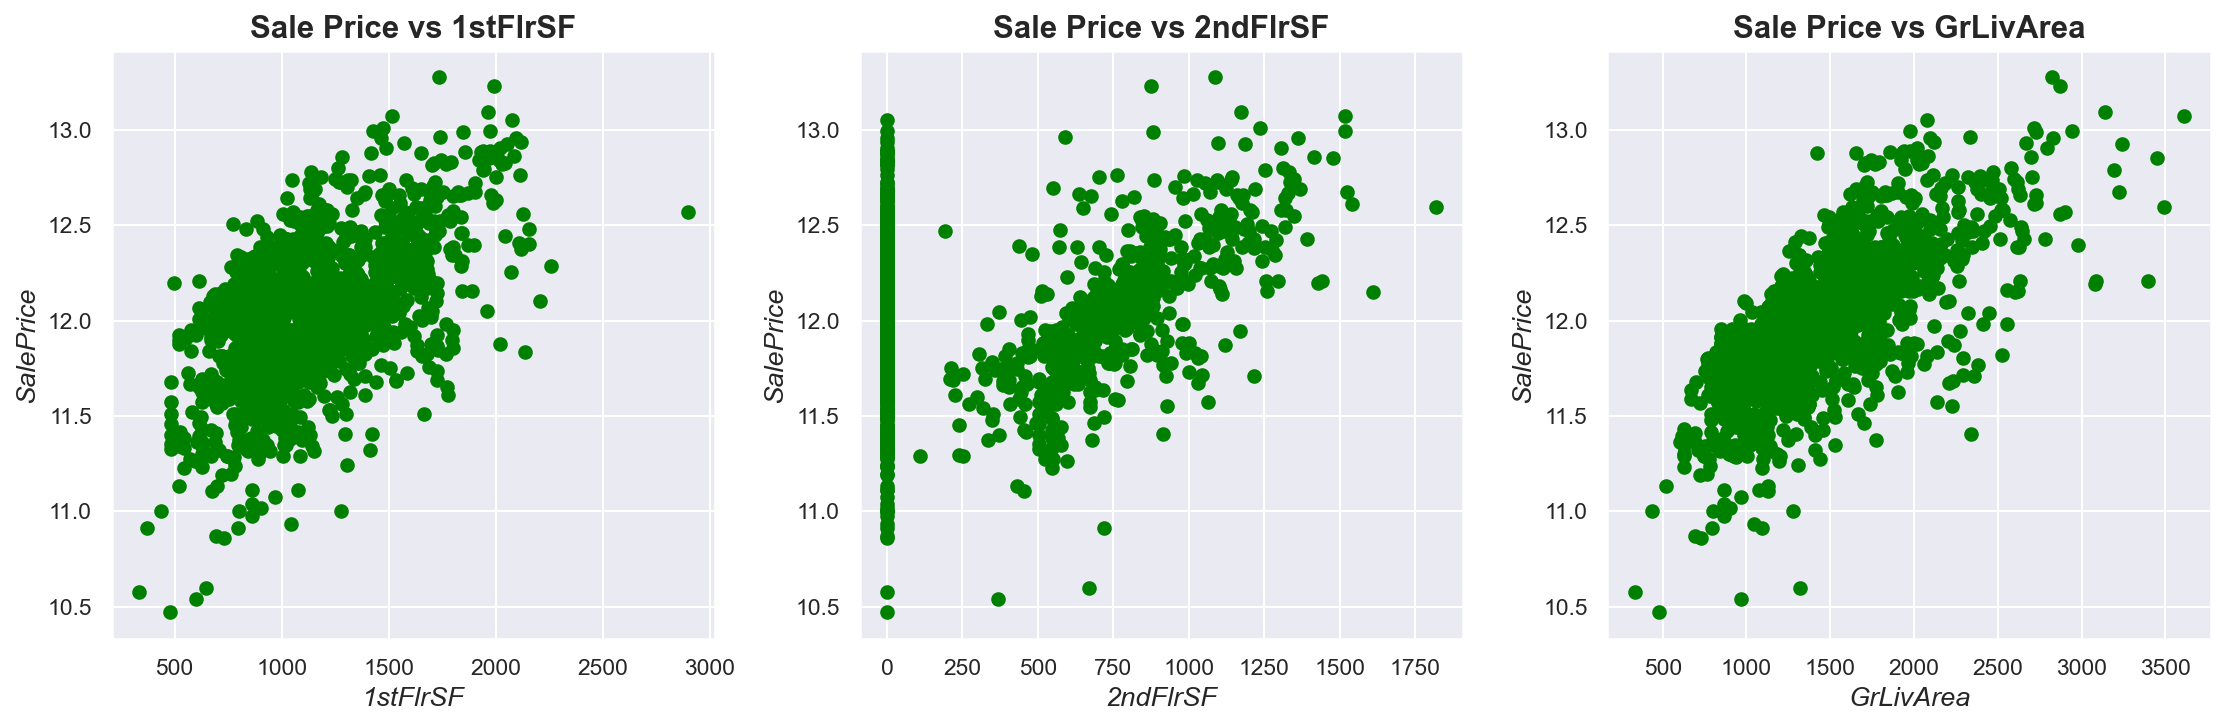

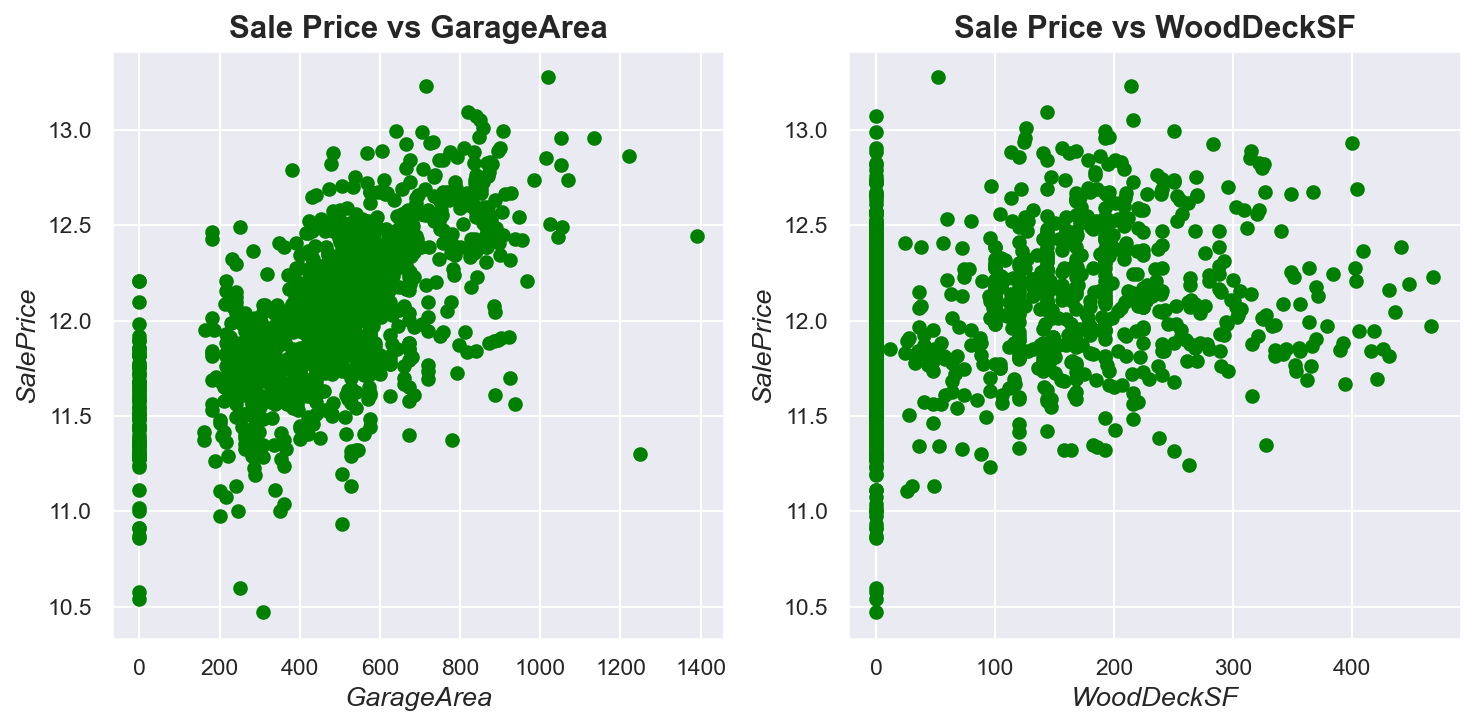

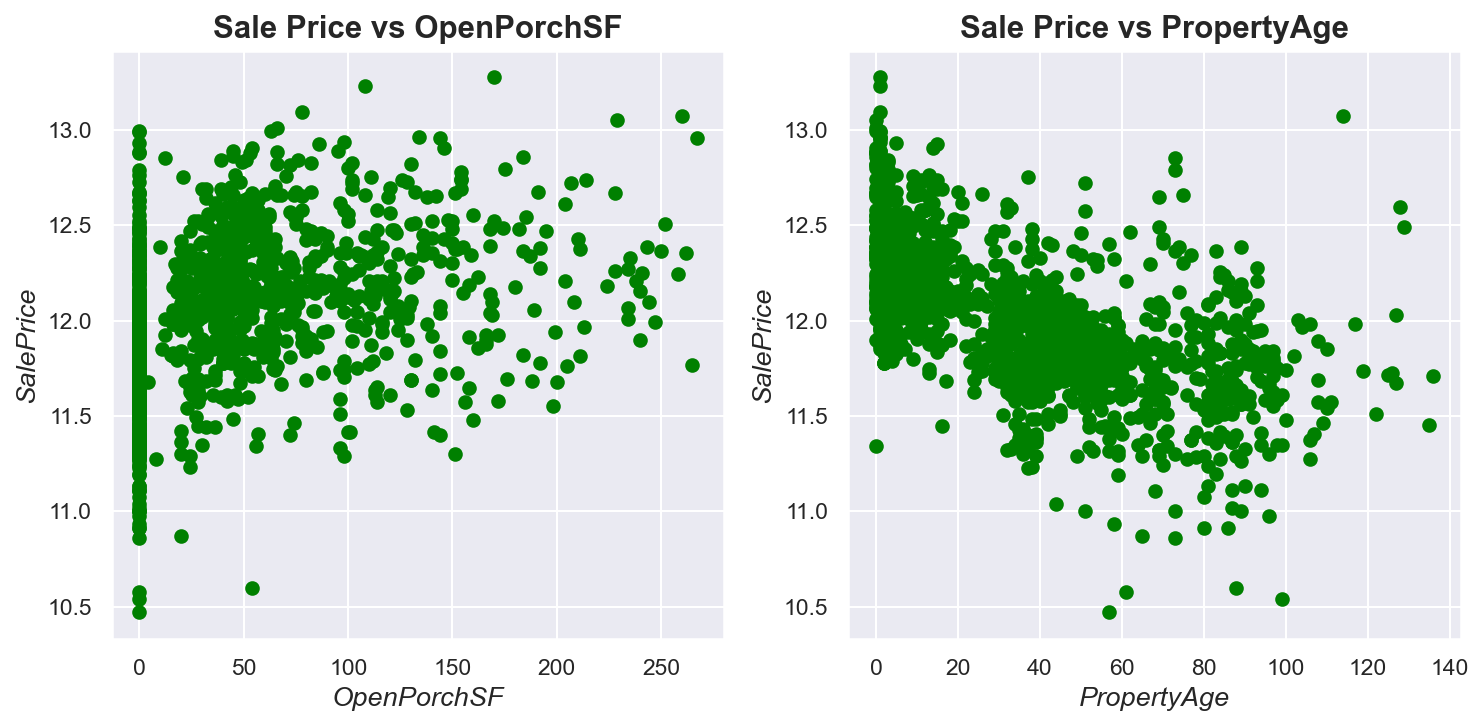

In [810]:
plot_scatter_three_vars('LotFrontage', 'LotArea','TotalBsmtSF')
plot_scatter_three_vars('MasVnrArea','BsmtFinSF1', 'BsmtUnfSF')
plot_scatter_three_vars('1stFlrSF','2ndFlrSF', 'GrLivArea')
plot_scatter_two_vars( 'GarageArea', 'WoodDeckSF')
plot_scatter_two_vars('OpenPorchSF', 'PropertyAge')

### Insight :
1. The size of the first floor and the living area above ground both tend to increase with higher sale prices, indicating a positive correlation.
2. The relationship between SalePrice and other continuous variables isn't as clear-cut and needs more detailed analysis.
3. The plots for LotFrontage, MasVnrArea, 1stFlrSF, and GarageArea show some unusual extreme values. These outliers should be removed to get a clearer   picture of the overall data trends.

#### Removing outlier data points in the 'LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' features as observed from their respective scatter plots with SalePrice.

In [811]:
House_Dataset = House_Dataset.loc[~((House_Dataset['SalePrice']>12.0) & (House_Dataset['1stFlrSF']>2500))]
House_Dataset = House_Dataset.loc[~((House_Dataset['SalePrice']<12.5) & (House_Dataset['GarageArea']>1200))]
House_Dataset = House_Dataset.loc[~((House_Dataset['SalePrice']<11.0) & (House_Dataset['LotFrontage']>150))]
House_Dataset = House_Dataset.loc[~((House_Dataset['SalePrice']>12.0) & (House_Dataset['MasVnrArea']>1500))]
## Calculating the percentage of records kept in the dataset after data cleaning

current_data_percentage = round(100 * (len(House_Dataset) / total_records), 2)
print(current_data_percentage, "%")


94.59 %


<Figure size 1440x1200 with 0 Axes>

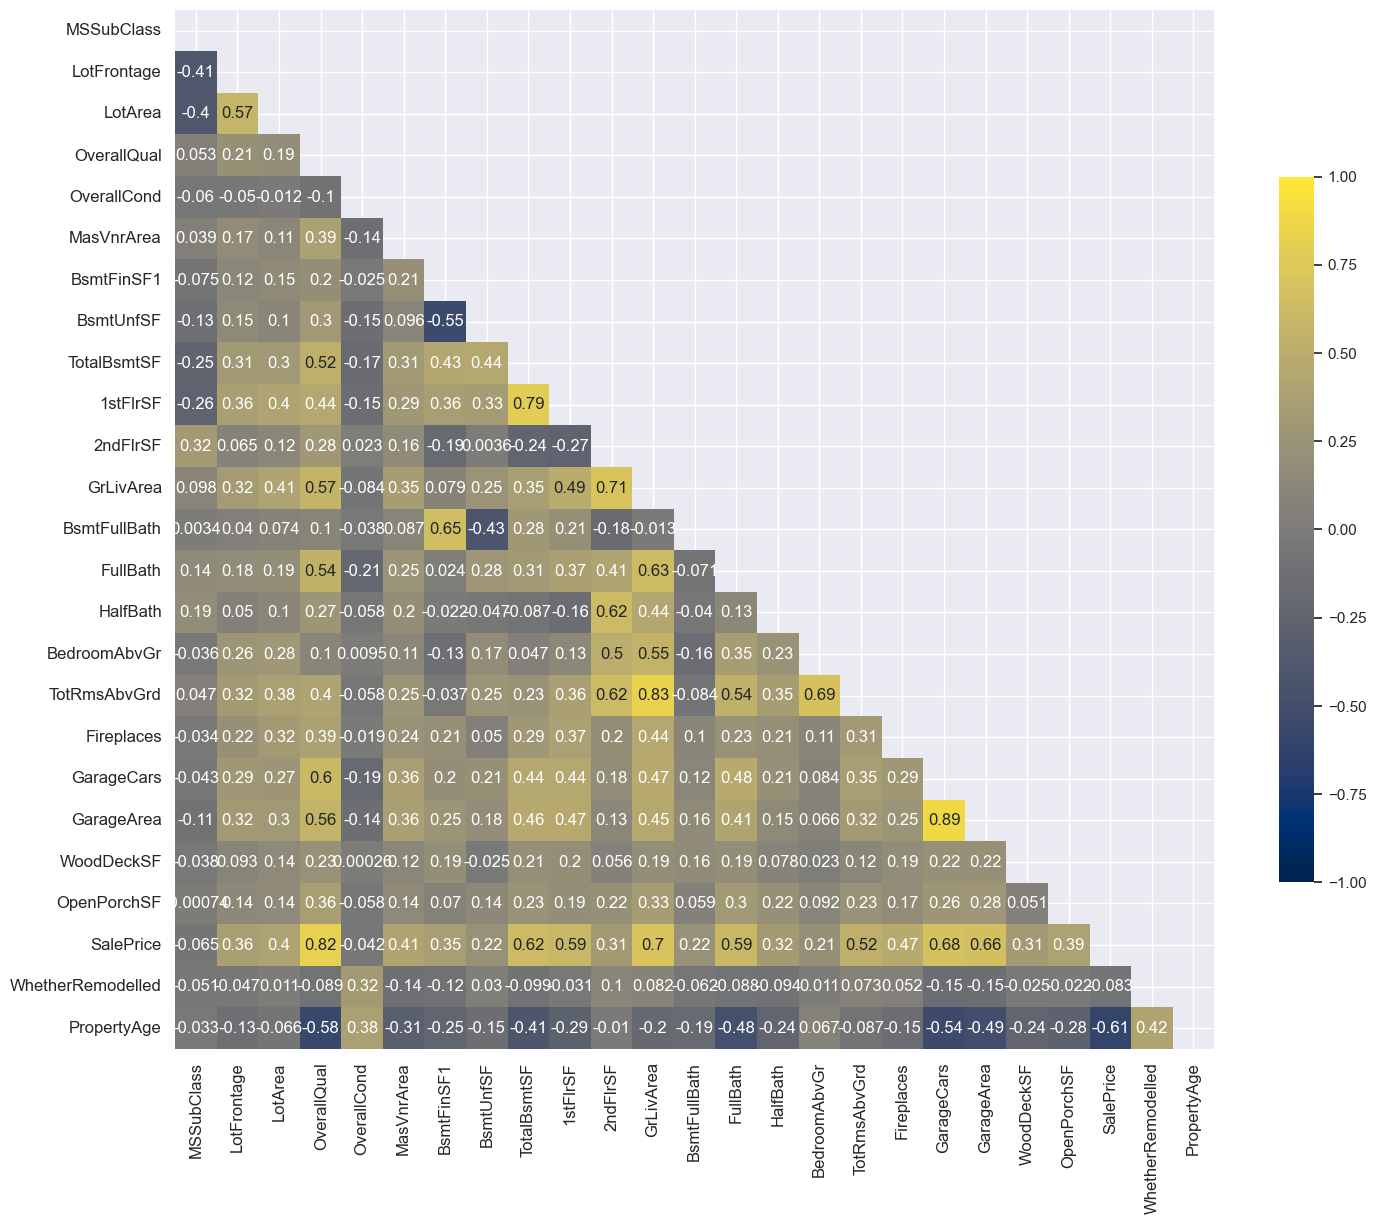

In [812]:
# Constructing a heatmap to visualize the correlations between numeric variables, excluding categorical ones treated as numeric
numeric_variables = House_Dataset.select_dtypes(include=['int32', 'float32', 'int64', 'float64']).columns
pt.figure(figsize=(12, 10), dpi=120)
correlation_matrix = House_Dataset[numeric_variables].corr()
upper_triangle_mask = ny.triu(ny.ones_like(correlation_matrix, dtype=bool))
fig, ax_heatmap = pt.subplots(figsize=(15, 15), dpi=100)
ax_heatmap = sb.heatmap(correlation_matrix, cmap='cividis', cbar_kws={"shrink": .5}, vmin=-1, vmax=1, center=0,
                        square=True, mask=upper_triangle_mask, annot=True)
pt.xticks(fontsize=12, rotation=90)
pt.yticks(fontsize=12, rotation=0)
pt.tight_layout()
pt.show()

### Insight:

1. The variables 'GrLivArea' (above ground living area) and 'TotRmsAbvGrd' (total rooms above ground) have a high correlation of 0.83, suggesting that as the living area increases, the number of rooms typically increases too. To avoid redundancy in the model, 'TotRmsAbvGrd' will be removed.

2. 'GarageCars' (the size of the garage in car capacity) and 'GarageArea' (the size of the garage in square feet) are also strongly correlated at 0.89, indicating that the number of cars that can fit into a garage is proportional to the garage's physical size. For simplicity, 'GarageCars' will be dropped.

3. 'GrLivArea' and '2ndFlrSF' (second-floor square footage) have a correlation of 0.71, which means larger living areas often include more second-floor space. Thus, '2ndFlrSF' will be excluded from the dataset to simplify the model.

4. There is a high correlation of 0.77 between '1stFlrSF' (first-floor square footage) and 'TotalBsmtSF' (total basement square footage), likely due to the footprint of the first floor matching the area available for the basement. Consequently, '1stFlrSF' will be omitted to reduce multicollinearity.

Removing these correlated variables can help in preventing multicollinearity in predictive modeling, leading to more reliable and interpretable results.

In [813]:
House_Dataset= House_Dataset.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1)
House_Dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0    BrkFace       196.0        Gd      PConc       Gd           No   
1       None         0.0        TA     CBlock       Gd           Gd   
2    BrkFace       162.0        Gd      PConc       Gd           Mn   
3       None         0.0        TA     BrkTil       TA           No   
4    BrkFace       350.0        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  GrLivArea  \
0          GLQ         706        150          856        Ex       1710   
1          ALQ         978        284         1262        Ex       1262   
2          GLQ         486        434          920        Ex       1786   
3          ALQ         216        540          756        Gd       1717   
4          GLQ         655        490         1145        Ex       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  Fireplaces  \
0             1         2         1             3          Gd           0   
1             0         2         0             3          TA           1   
2             1         2         1             3          Gd           1   
3             1         1         0             3          Gd           1   
4             1         2         1             4          Gd           1   

  FireplaceQu GarageType GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  \
0        None     Attchd          RFn         548           0           61   
1          TA     Attchd          RFn         460         298            0   
2          TA     Attchd          RFn         608           0           42   
3          Gd     Detchd          Unf         642           0           35   
4          TA     Attchd          RFn         836         192           84   

   SalePrice  WhetherRemodelled  PropertyAge  
0  12.247699                  0            5  
1  12.109016                  0           31  
2  12.317171                  1            7  
3  11.849405                  1           91  
4  12.429220                  0            8

#### Reviewing the Heatmap Again to Examine the Correlations Between Numeric Variables, Excluding Numeric Categorical Data

<Figure size 1440x1200 with 0 Axes>

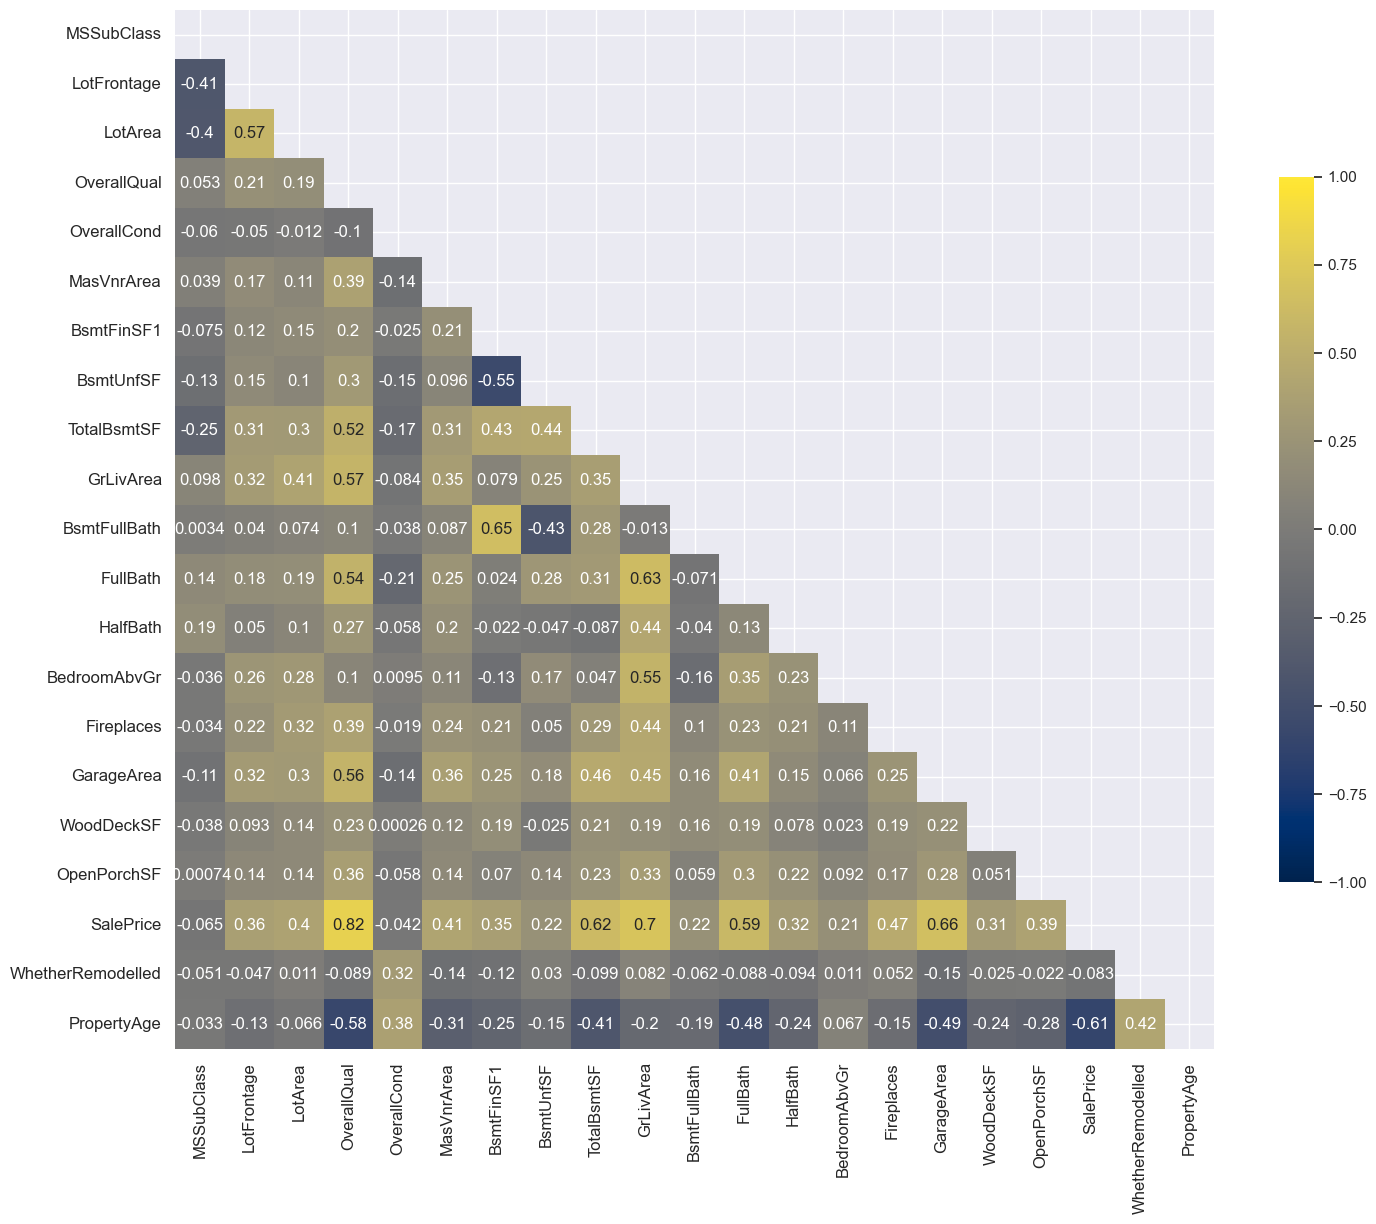

In [814]:
numeric_variables = House_Dataset.select_dtypes(include=['int32', 'float32', 'int64', 'float64']).columns
pt.figure(figsize=(12, 10), dpi=120)
correlation_matrix = House_Dataset[numeric_variables].corr()
upper_triangle_mask = ny.triu(ny.ones_like(correlation_matrix, dtype=bool))
fig, ax_heatmap = pt.subplots(figsize=(15, 15), dpi=100)
ax_heatmap = sb.heatmap(correlation_matrix, cmap='cividis', cbar_kws={"shrink": .5}, vmin=-1, vmax=1, center=0,
                        square=True, mask=upper_triangle_mask, annot=True)
pt.xticks(fontsize=12, rotation=90)
pt.yticks(fontsize=12, rotation=0)
pt.tight_layout()
pt.show()

### Data Preparation

#### Converting Categorical Variables to Numeric Variables

In [815]:
#Assigning Sequential Values to Ordered Fields
#For fields with an inherent order, we assign sequential values based on their order.
#For fields without a natural order, we categorize them using 0 and 1.

House_Dataset['d_LotShape'] = House_Dataset['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
House_Dataset['d_ExterQual'] = House_Dataset['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
House_Dataset['d_HeatingQC'] = House_Dataset['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
House_Dataset['d_GarageFinish'] = House_Dataset['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
House_Dataset['d_BsmtExposure'] = House_Dataset['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
House_Dataset['d_BsmtFinType1'] = House_Dataset['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
House_Dataset['d_BsmtQual'] = House_Dataset['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
House_Dataset['d_KitchenQual'] = House_Dataset['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
House_Dataset['d_FireplaceQu'] = House_Dataset['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
House_Dataset = House_Dataset.drop(['LotShape', 'ExterQual', 'HeatingQC', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)
House_Dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea LotConfig Neighborhood  \
0          60       RL         65.0     8450    Inside      CollgCr   
1          20       RL         80.0     9600       FR2      Veenker   
2          60       RL         68.0    11250    Inside      CollgCr   
3          70       RL         60.0     9550    Corner      Crawfor   
4          60       RL         84.0    14260       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea Foundation  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0    BrkFace       196.0      PConc         706        150          856   
1       None         0.0     CBlock         978        284         1262   
2    BrkFace       162.0      PConc         486        434          920   
3       None         0.0     BrkTil         216        540          756   
4    BrkFace       350.0      PConc         655        490         1145   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  \
0       1710             1         2         1             3           0   
1       1262             0         2         0             3           1   
2       1786             1         2         1             3           1   
3       1717             1         1         0             3           1   
4       2198             1         2         1             4           1   

  GarageType  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0     Attchd         548           0           61  12.247699   
1     Attchd         460         298            0  12.109016   
2     Attchd         608           0           42  12.317171   
3     Detchd         642           0           35  11.849405   
4     Attchd         836         192           84  12.429220   

   WhetherRemodelled  PropertyAge  d_LotShape  d_ExterQual  d_HeatingQC  \
0                  0            5           3            4            5   
1                  0           31           3            3            5   
2                  1            7           2            4            5   
3                  1           91           2            3            4   
4                  0            8           2            4            5   

   d_GarageFinish  d_BsmtExposure  d_BsmtFinType1  d_BsmtQual  d_KitchenQual  \
0               2               1               6           4              4   
1               2               4               5           4              3   
2               2               2               6           4              4   
3               1               1               5           3              4   
4               2               3               6           4              4   

   d_FireplaceQu  
0              0  
1              3  
2              3  
3              4  
4              3

In [816]:

#Generating Dummy Variables for Categorical Features

subclass_dummies = pa.get_dummies(House_Dataset['MSSubClass'], prefix='MSSubClass', drop_first=True)
House_Dataset = pa.concat([House_Dataset, subclass_dummies], axis=1)

lotconfig_dummies = pa.get_dummies(House_Dataset['LotConfig'], prefix='LotConfig', drop_first=True)
House_Dataset = pa.concat([House_Dataset, lotconfig_dummies], axis=1)

zoning_dummies = pa.get_dummies(House_Dataset['MSZoning'], prefix='MSZoning', drop_first=True)
House_Dataset = pa.concat([House_Dataset, zoning_dummies], axis=1)

foundation_dummies = pa.get_dummies(House_Dataset['Foundation'], prefix='Foundation', drop_first=True)
House_Dataset = pa.concat([House_Dataset, foundation_dummies], axis=1)

masvnrtype_dummies = pa.get_dummies(House_Dataset['MasVnrType'], prefix='MasVnrType', drop_first=True)
House_Dataset = pa.concat([House_Dataset, masvnrtype_dummies], axis=1)

neighborhood_dummies = pa.get_dummies(House_Dataset['Neighborhood'], prefix='Neighborhood', drop_first=True)
House_Dataset = pa.concat([House_Dataset, neighborhood_dummies], axis=1)

exterior2_dummies = pa.get_dummies(House_Dataset['Exterior2nd'], prefix='Exterior2nd', drop_first=True)
House_Dataset = pa.concat([House_Dataset, exterior2_dummies], axis=1)

style_dummies = pa.get_dummies(House_Dataset['HouseStyle'], prefix='HouseStyle', drop_first=True)
House_Dataset = pa.concat([House_Dataset, style_dummies], axis=1)

exterior1_dummies = pa.get_dummies(House_Dataset['Exterior1st'], prefix='Exterior1st', drop_first=True)
House_Dataset = pa.concat([House_Dataset, exterior1_dummies], axis=1)

garagetype_dummies = pa.get_dummies(House_Dataset['GarageType'], prefix='GarageType', drop_first=True)
House_Dataset = pa.concat([House_Dataset, garagetype_dummies], axis=1)

roofstyle_dummies = pa.get_dummies(House_Dataset['RoofStyle'], prefix='RoofStyle', drop_first=True)
House_Dataset = pa.concat([House_Dataset, roofstyle_dummies], axis=1)

##Removing Original Columns After Creating Dummies
original_columns_to_drop = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation',
'GarageType', 'LotConfig' ,'HouseStyle', 'MasVnrType']
House_Dataset = House_Dataset.drop(original_columns_to_drop, axis=1)




In [817]:
House_Dataset.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        150          856       1710             1         2         1   
1        284         1262       1262             0         2         0   
2        434          920       1786             1         2         1   
3        540          756       1717             1         1         0   
4        490         1145       2198             1         2         1   

   BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0             3           0         548           0           61  12.247699   
1             3           1         460         298            0  12.109016   
2             3           1         608           0           42  12.317171   
3             3           1         642           0           35  11.849405   
4             4           1         836         192           84  12.429220   

   WhetherRemodelled  PropertyAge  d_LotShape  d_ExterQual  d_HeatingQC  \
0                  0            5           3            4            5   
1                  0           31           3            3            5   
2                  1            7           2            4            5   
3                  1           91           2            3            4   
4                  0            8           2            4            5   

   d_GarageFinish  d_BsmtExposure  d_BsmtFinType1  d_BsmtQual  d_KitchenQual  \
0               2               1               6           4              4   
1               2               4               5           4              3   
2               2               2               6           4              4   
3               1               1               5           3              4   
4               2               3               6           4              4   

   d_FireplaceQu  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0          False          False          False          False   
1              3          False          False          False          False   
2              3          False          False          False          False   
3              4          False          False          False          False   
4              3          False          False          False          False   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0           True          False          False          False          False   
1          False          False          False          False          False   
2           True          False          False          False          False   
3          False           True          False          False          False   
4           True          False          False          False          False   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0          False           False           False           False   
1          False           False           False           False   
2          False           False           False           False   
3          False           False           False           False   
4          False           False           False           False   

   MSSubClass_190  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0           False              False          False          False   
1           False              False           True          False   
2           False              False          False          False   
3           False              False 

In [818]:
# Removing the target variable 'SalePrice' from the dataset to focus on predictor variables
predictors_dataset = House_Dataset.drop(['SalePrice'], axis=1)

# Calculating the absolute correlation matrix for the predictors
predictors_corr_matrix = predictors_dataset.corr().abs()
predictors_corr_matrix

# Identifying the upper triangle of the correlation matrix to avoid redundancy
upper_triangle_matrix = predictors_corr_matrix.where(ny.triu(ny.ones(predictors_corr_matrix.shape), k=1).astype(ny.bool_))

# Identifying columns that have a high correlation with other predictors (threshold: >0.70) to avoid multicollinearity
high_corr_predictors = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > 0.70)]

# These predictors are candidates for removal to reduce multicollinearity
high_corr_predictors  # List of predictor variables to potentially remove from House_Dataset


['d_ExterQual',
 'd_BsmtFinType1',
 'd_KitchenQual',
 'd_FireplaceQu',
 'MSZoning_RM',
 'Foundation_PConc',
 'MasVnrType_None',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_Detchd',
 'RoofStyle_Hip']

In [819]:
##Removing predictors from the dataset that are strongly correlated with each other
House_Dataset = House_Dataset.drop(high_corr_predictors, axis=1)
House_Dataset.shape

(1381, 108)

In [820]:
House_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 0 to 1458
Columns: 108 entries, LotFrontage to RoofStyle_Shed
dtypes: bool(83), float64(3), int64(22)
memory usage: 392.5 KB


We have converted all the columns to numeric.

In [821]:
##Creating a copy of this dataset
House_Dataset_copy = House_Dataset.copy()

In [822]:
# Define a function to identify columns with binary values in a dataframe
def identify_binary_columns(dataframe):
    # Create a copy of the dataframe to avoid modifying the original
    dataframe_copy = dataframe.copy()
    # Determine columns with exactly two unique values, indicating binary data
    binary_columns_mask = (dataframe_copy.nunique() == 2)
    # Extract the names of these binary columns
    binary_columns_list = list(binary_columns_mask[binary_columns_mask.values == True].index)
    # Return the list of binary column names
    return binary_columns_list

# Apply the function to the 'House_Dataset' to find binary columns
binary_columns = identify_binary_columns(House_Dataset)
print(binary_columns)


['WhetherRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Foundation_CBlock', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',

### Model Building

In [823]:
##Separating the Data into Training and Test Sets.
ny.random.seed(0)
House_Dataset_train, House_Dataset_test = train_test_split(House_Dataset, train_size=0.7, test_size = 0.3, random_state=100)

**Feature Scaling**

In [824]:
# Extracting binary columns from the training and testing datasets
House_Dataset_binary_train = House_Dataset_train.loc[:, binary_columns]
House_Dataset_binary_test = House_Dataset_test.loc[:, binary_columns]

# Removing binary columns from the original datasets to avoid scaling issues
House_Dataset_train = House_Dataset_train.drop(binary_columns, axis=1)
House_Dataset_test = House_Dataset_test.drop(binary_columns, axis=1)

# Preparing for feature scaling to ensure consistent data range across variables
all_cols = House_Dataset_train.columns
scaler = StandardScaler()

# Applying the StandardScaler to normalize the training data
House_Dataset_train[all_cols] = scaler.fit_transform(House_Dataset_train[all_cols])
# Reintegrating binary columns to the normalized training dataset
House_Dataset_train = pa.concat([House_Dataset_train, House_Dataset_binary_train], axis=1)

# Normalizing the testing data using the same scaler fitted to the training data
House_Dataset_test[all_cols] = scaler.transform(House_Dataset_test[all_cols])
# Reintegrating binary columns to the normalized testing dataset
House_Dataset_test = pa.concat([House_Dataset_test, House_Dataset_binary_test], axis=1)


In [825]:
print(House_Dataset_train.shape)
print(House_Dataset_test.shape)

(966, 108)
(415, 108)


In [826]:
#Assigning the target variable to y_train and y_test for training and testing datasets, respectively.

y_train = House_Dataset_train['SalePrice']
y_test = House_Dataset_test['SalePrice']

In [827]:
##Assigning all predictor variables to X_train and X_test for the training and testing datasets, respectively.
X_train = House_Dataset_train.drop('SalePrice',axis=1)
X_test = House_Dataset_test.drop('SalePrice',axis=1)

### Feature Selection through Recursive Elimination

Given the presence of approximately 108 features, we will employ Recursive Feature Elimination (RFE) to identify the top 50 features from the total, which will then be utilized for subsequent analysis.

In [828]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=50)  # Initiating RFE to narrow down to 50 most influential features
rfe = rfe.fit(X_train, y_train)

In [829]:
# Creating a tuple list that combines feature names, selection status, and feature rankings from RFE
feature_selection_details = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
feature_selection_details

[('LotFrontage', False, 36),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 50),
 ('BsmtFinSF1', False, 42),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 21),
 ('FullBath', False, 27),
 ('HalfBath', False, 29),
 ('BedroomAbvGr', False, 51),
 ('Fireplaces', False, 23),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 46),
 ('OpenPorchSF', False, 30),
 ('PropertyAge', True, 1),
 ('d_LotShape', False, 52),
 ('d_HeatingQC', False, 41),
 ('d_GarageFinish', False, 54),
 ('d_BsmtExposure', False, 34),
 ('d_BsmtQual', False, 17),
 ('WhetherRemodelled', False, 57),
 ('MSSubClass_30', False, 10),
 ('MSSubClass_40', False, 43),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 56),
 ('MSSubClass_60', False, 28),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 35),
 ('MSSubClass_85', False, 33),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', True,

In [830]:
# Identifying the feature names selected by RFE
selected_features_by_rfe = X_train.columns[rfe.support_]
selected_features_by_rfe

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'GarageArea', 'PropertyAge', 'MSSubClass_45',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RL',
       'Foundation_Stone', 'Foundation_Wood', 'MasVnrType_Stone',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Ext

In [831]:
# Constructing a dataframe to display the top 50 features selected through RFE
selected_features_df = pa.DataFrame(feature_selection_details, columns=['FeatureName', 'IsSelected', 'Rank'])
selected_features_df = selected_features_df.loc[selected_features_df['IsSelected'] == True]
selected_features_df.reset_index(drop=True, inplace=True)
selected_features_df

FeatureName  IsSelected  Rank
0                LotArea        True     1
1            OverallQual        True     1
2            OverallCond        True     1
3              BsmtUnfSF        True     1
4            TotalBsmtSF        True     1
5              GrLivArea        True     1
6             GarageArea        True     1
7            PropertyAge        True     1
8          MSSubClass_45        True     1
9          MSSubClass_70        True     1
10         MSSubClass_75        True     1
11         MSSubClass_90        True     1
12        MSSubClass_120        True     1
13        MSSubClass_160        True     1
14        MSSubClass_180        True     1
15           MSZoning_FV        True     1
16           MSZoning_RL        True     1
17      Foundation_Stone        True     1
18       Foundation_Wood        True     1
19      MasVnrType_Stone        True     1
20  Neighborhood_ClearCr        True     1
21  Neighborhood_Crawfor        True     1
22  Neighborhood_Edwards        True     1
23   Neighborhood_IDOTRR        True     1
24  Neighborhood_MeadowV        True     1
25  Neighborhood_Mitchel        True     1
26    Neighborhood_NAmes        True     1
27   Neighborhood_NWAmes        True     1
28  Neighborhood_NridgHt        True     1
29  Neighborhood_OldTown        True     1
30   Neighborhood_Sawyer        True     1
31  Neighborhood_SawyerW        True     1
32  Neighborhood_StoneBr        True     1
33   Exterior2nd_AsphShn        True     1
34   Exterior2nd_Brk Cmn        True     1
35   Exterior2nd_BrkFace        True     1
36   Exterior2nd_CmentBd        True     1
37   Exterior2nd_ImStucc        True     1
38   Exterior2nd_MetalSd        True     1
39     Exterior2nd_Stone        True     1
40    Exterior2nd_Stucco        True     1
41   Exterior2nd_VinylSd        True     1
42   Exterior2nd_Wd Sdng        True     1
43     HouseStyle_2.5Fin        True     1
44     HouseStyle_2.5Unf        True     1
45   Exterior1st_BrkComm        True     1
46   Exterior1st_BrkFace        True     1
47   Exterior1st_WdShing        True     1
48       GarageType_None        True     1
49     RoofStyle_Gambrel        True     1

In [832]:
# Assigning the features selected by RFE to a new training dataset
X_train_rfe = X_train[selected_features_by_rfe]

In [833]:
# Updating X_train and X_test to contain only the 50 features identified by RFE for subsequent analysis
X_train = X_train_rfe[X_train_rfe.columns]  # Ensuring X_train includes only the RFE-selected features
X_test = X_test[X_train.columns]  # Aligning X_test to have the same feature set as X_train


### Ridge Regression

In [834]:
# Defining a range of alpha values for tuning the Ridge Regression Model
alpha_range = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                         9.0, 10.0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 50, 100, 500, 1000]}

# Initializing the Ridge Regression model
ridge_regression = Ridge()

# Setting up cross-validation configuration
num_folds = 5
ridge_cv_model = GridSearchCV(estimator=ridge_regression, 
                              param_grid=alpha_range, 
                              scoring='neg_mean_absolute_error', 
                              cv=num_folds, 
                              return_train_score=True,
                              verbose=1)            
# Fitting the model with the training data and alpha range for cross-validation
ridge_cv_model.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [835]:
##Display Mean Scores

ridge_cv_results = pa.DataFrame(ridge_cv_model.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
17         6.0         -0.205212        -0.215660                1
16         5.0         -0.204829        -0.215692                2
18         7.0         -0.205611        -0.215706                3
19         8.0         -0.206020        -0.215799                4
15         4.0         -0.204457        -0.215832                5
20         9.0         -0.206418        -0.215985                6
14         3.0         -0.204154        -0.216056                7
21        10.0         -0.206829        -0.216210                8
22          11         -0.207244        -0.216433                9
23          12         -0.207657        -0.216677               10
13         2.0         -0.203965        -0.216703               11
24          13         -0.208073        -0.216930               12
25          14         -0.208488        -0.217184               13
26          15         -0.208898        -0.217438               14
27          16         -0.209292        -0.217683               15
28          17         -0.209671        -0.217923               16
12         1.0         -0.203912        -0.218015               17
29          18         -0.210039        -0.218173               18
11         0.9         -0.203903        -0.218206               19
10         0.8         -0.203893        -0.218405               20
30          19         -0.210399        -0.218422               21
9          0.7         -0.203881        -0.218613               22
31          20         -0.210746        -0.218658               23
8          0.6         -0.203868        -0.218838               24
7          0.5         -0.203851        -0.219082               25
6          0.4         -0.203830        -0.219346               26
5          0.3         -0.203799        -0.219630               27
4          0.2         -0.203754        -0.220055               28
3          0.1         -0.203690        -0.220583               29
2         0.01         -0.203662        -0.221226               30
1        0.001         -0.203666        -0.221304               31
0       0.0001         -0.203666        -0.221311               32
32          50         -0.218243        -0.224343               33
33         100         -0.225780        -0.230605               34
34         500         -0.271570        -0.274681               35
35        1000         -0.329267        -0.331708               36

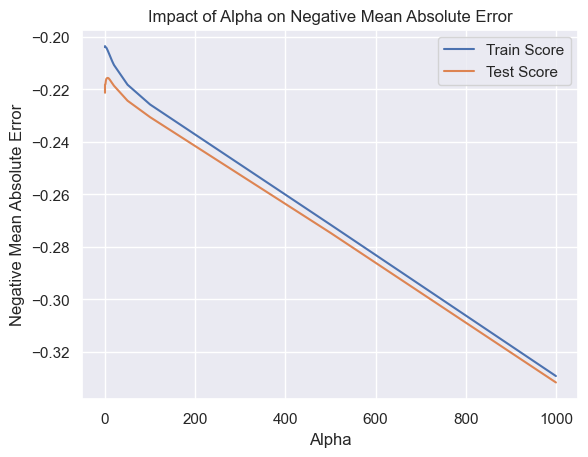

In [836]:
# Converting the alpha parameter values to integer for clearer plotting
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# Plotting the relationship between alpha values and performance scores
pt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'], label='Train Score')
pt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'], label='Test Score')
pt.xlabel('Alpha')
pt.ylabel('Negative Mean Absolute Error')
pt.title("Impact of Alpha on Negative Mean Absolute Error")
pt.legend(loc='upper right')
pt.show()


In [837]:
# Retrieving the best Ridge Regression model according to the cross-validation results
ridge_cv_model.best_estimator_

Ridge(alpha=6.0)

In [838]:
##Checking the coefficient values with lambda (alpha) = 8

ridge = Ridge(alpha=8)
ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.10217848309181451
Coefficients:
 [ 0.07504564  0.23729823  0.15841404 -0.09311242  0.20528495  0.35070743
  0.09528044 -0.30289865  0.05425668  0.17626819  0.02315024 -0.21282987
 -0.01758374 -0.20059936 -0.07586402  0.21444381  0.12127647  0.07131158
 -0.11231404  0.10071354 -0.05314393  0.18036573 -0.10166273 -0.09882498
 -0.14514128 -0.11714218 -0.10955111 -0.16012398  0.12091586 -0.13731011
 -0.12531265 -0.05678642  0.21860396  0.01367365 -0.06333165  0.10634026
  0.05558581 -0.00206591  0.074285    0.02488722  0.10501738  0.05883104
  0.06814243 -0.03095437 -0.04270874 -0.13700164  0.15092499  0.05280457
 -0.09334774  0.11242727]


### Assessing Model Performance: Prediction and Metrics

In [839]:
# Generating predictions for both the training and testing datasets using the Ridge Regression model
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# Calculating the R2 score for the Ridge Regression model on both sets
r2_score_train_ridge = r2_score(y_true=y_train, y_pred=y_pred_train_ridge)
r2_score_test_ridge = r2_score(y_true=y_test, y_pred=y_pred_test_ridge)

# Determining the Mean Squared Error (MSE) for the Ridge Regression model
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

# Calculating the Mean Absolute Error (MAE) for both the train and test datasets
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)

# Computing the Root Mean Squared Error (RMSE) for both datasets
rmse_train_ridge = ny.sqrt(mse_train_ridge)
rmse_test_ridge = ny.sqrt(mse_test_ridge)

# Summary of model performance metrics for Ridge Regression with alpha set to 8.0
print("Ridge Regression Model Performance (Alpha=8.0):\n", "-"*50)
print("\nTraining Set Metrics:\nR2 Score:", r2_score_train_ridge, "\nMSE:", mse_train_ridge, "\nMAE:", mae_train_ridge,
      "\nRMSE:", rmse_train_ridge)
print("\nTesting Set Metrics:\nR2 Score:", r2_score_test_ridge, "\nMSE:", mse_test_ridge, "\nMAE:", mae_test_ridge,
      "\nRMSE:", rmse_test_ridge, "\n", "-"*50)


Ridge Regression Model Performance (Alpha=8.0):
 --------------------------------------------------

Training Set Metrics:
R2 Score: 0.9135828257331216 
MSE: 0.08641717426687842 
MAE: 0.2064410669637679 
RMSE: 0.2939679817035835

Testing Set Metrics:
R2 Score: 0.8977081065509518 
MSE: 0.11070137654841027 
MAE: 0.23087628551197853 
RMSE: 0.332718163839022 
 --------------------------------------------------


In [840]:
# Constructing a dataframe to detail features alongside their corresponding coefficients from the Ridge model
features_coefficients_df = pa.DataFrame({
    'Feature': X_train.columns, 
    'Coefficient': ridge.coef_.round(4), 
    'Absolute_Coefficient': abs(ridge.coef_.round(4))
})

# Reordering the dataframe based on the absolute value of coefficients in descending order and resetting the index
features_coefficients_df = features_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)
features_coefficients_df.reset_index(drop=True, inplace=True)

# Displaying the top 10 features based on their absolute coefficient values
features_coefficients_df.head(10)


Feature  Coefficient  Absolute_Coefficient
0             GrLivArea       0.3507                0.3507
1           PropertyAge      -0.3029                0.3029
2           OverallQual       0.2373                0.2373
3  Neighborhood_StoneBr       0.2186                0.2186
4           MSZoning_FV       0.2144                0.2144
5         MSSubClass_90      -0.2128                0.2128
6           TotalBsmtSF       0.2053                0.2053
7        MSSubClass_160      -0.2006                0.2006
8  Neighborhood_Crawfor       0.1804                0.1804
9         MSSubClass_70       0.1763                0.1763

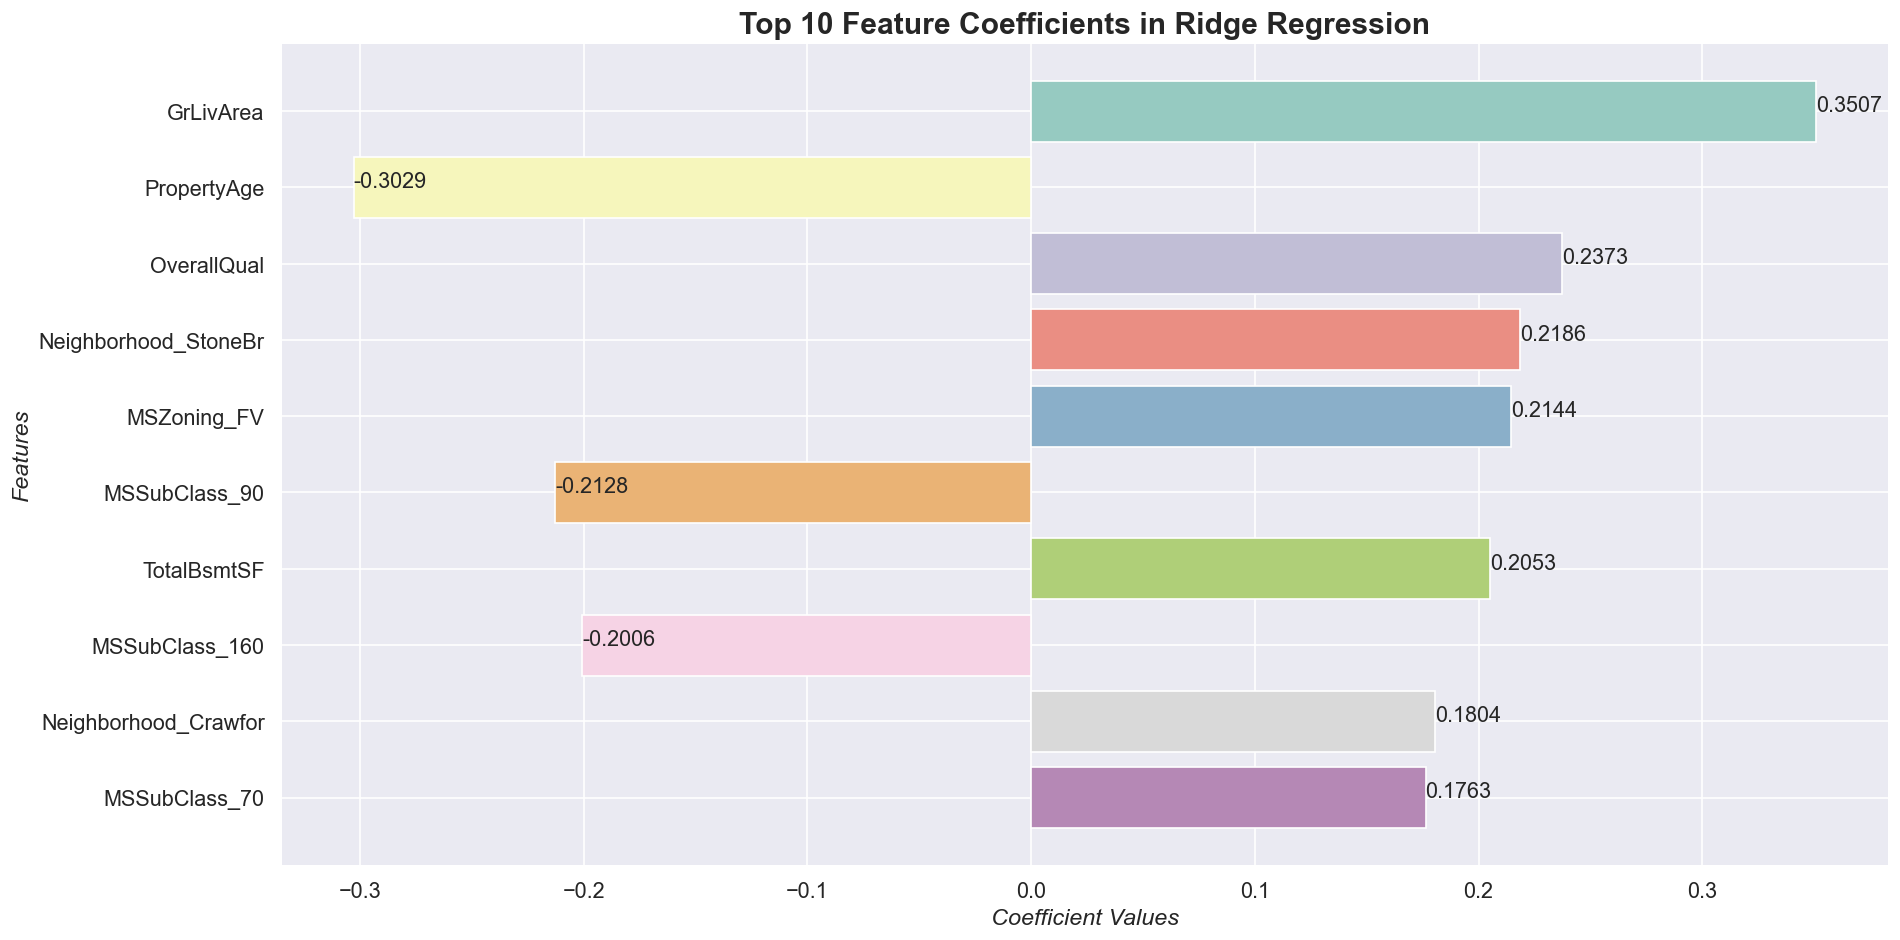

In [841]:
# Extracting the top 10 features with the highest coefficients from the Ridge regression model
top10_features_coefficients = features_coefficients_df.head(10)

# Setting the visual style of the seaborn plot
sb.set(style='darkgrid')
pt.figure(figsize=(16,8), dpi=120)
# Creating a bar plot to visualize the coefficients of the top 10 features
bar_plot = sb.barplot(y=top10_features_coefficients['Feature'], x=top10_features_coefficients['Coefficient'], palette='Set3')

pt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
pt.ylabel('Features', fontsize=14, fontstyle='italic')
pt.title('Top 10 Feature Coefficients in Ridge Regression', fontsize=18, fontweight='bold')

# Annotating coefficient values on the bar plot
coefficients = top10_features_coefficients['Coefficient']
for index, value in enumerate(coefficients):
    pt.text(value, index, str(value), fontsize=13)

pt.grid(True)
pt.xticks(fontsize=13)
pt.yticks(fontsize=13)
pt.autoscale()
pt.tight_layout()
pt.show()


The above chart showcases the top 10 predictors identified by the Ridge Regression model, highlighting their significance in determining the sale price of a house.

### Analyzing Model Residuals - Ridge

Evaluating the distribution of error terms to ensure normality, a fundamental assumption of linear regression models.

Train Set:

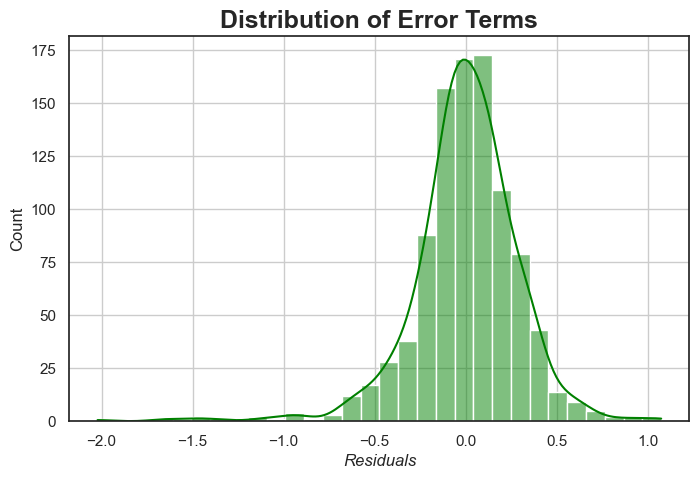

In [842]:
# Setting the visual style for the plot
sb.set_style('white')
pt.figure(figsize=(8,5), dpi=100)
# Calculating residuals by subtracting predicted values from actual values
residuals = y_train - y_pred_train_ridge
# Plotting the distribution of residuals to assess normality
sb.histplot(residuals, bins=30, color='green', kde=True)
pt.title('Distribution of Error Terms', fontweight='bold', fontsize=18)
pt.xlabel('Residuals', fontstyle='italic', fontsize=12)
pt.grid(True)
pt.show()

The distribution of error terms closely aligns with a normal distribution centered around zero, affirming our underlying assumption.

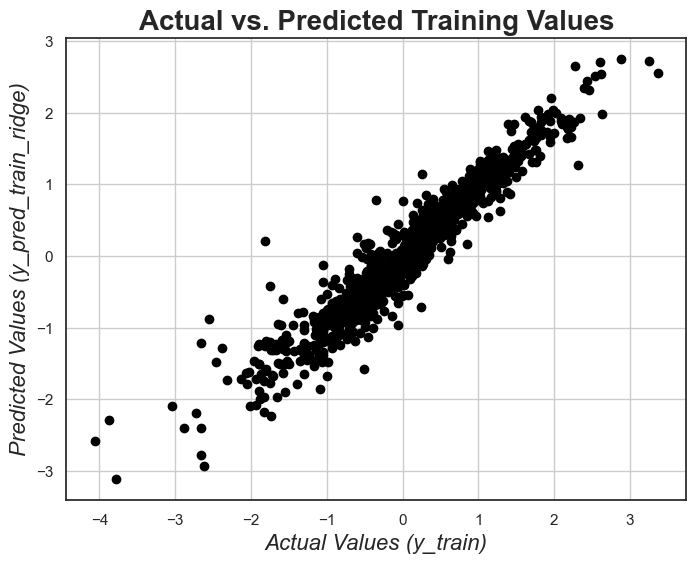

In [843]:
# Configuring the visual style for the scatter plot
sb.set_style('white')
pt.figure(figsize=(8,6))
# Creating a scatter plot to analyze the relationship between actual and predicted training values
pt.scatter(y_train, y_pred_train_ridge, color='black')
pt.title('Actual vs. Predicted Training Values', fontweight='bold', fontsize=20)
pt.xlabel('Actual Values (y_train)', fontstyle='italic', fontsize=16)
pt.ylabel('Predicted Values (y_pred_train_ridge)', fontstyle='italic', fontsize=16)
pt.grid(True)
pt.show()



In [844]:
y_train.shape

(966,)

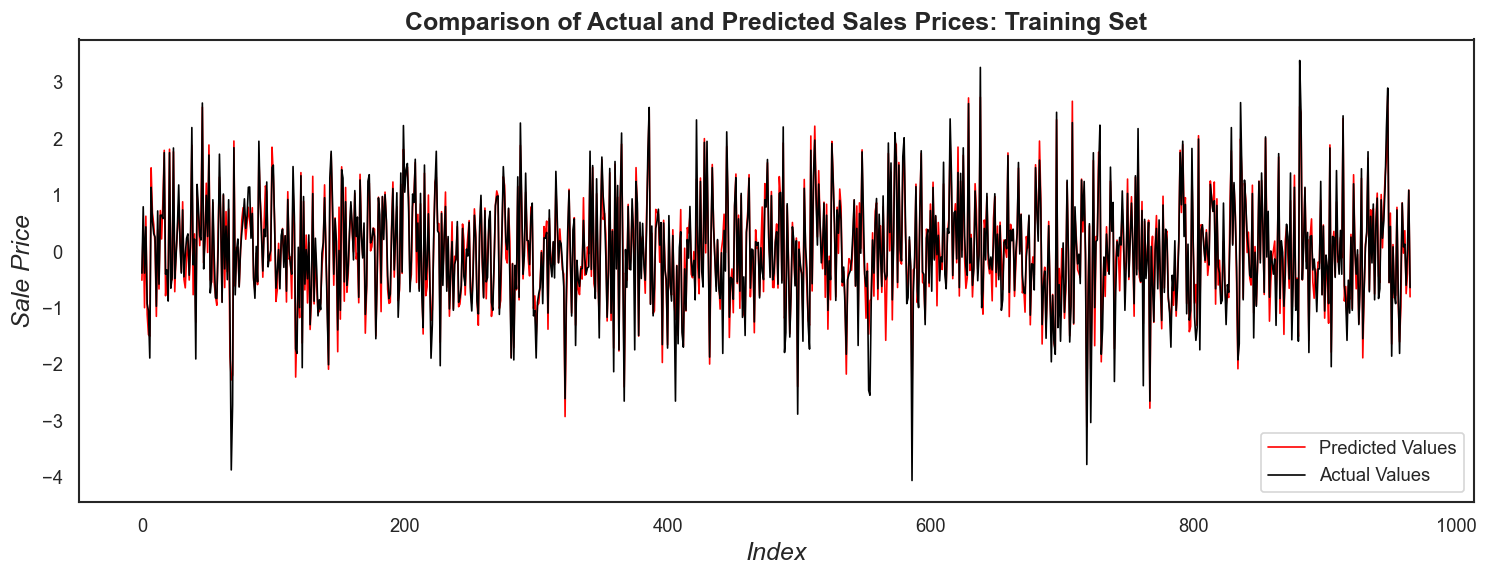

In [845]:
# Setting the visual style for the plots
sb.set_style('white')
pt.figure(figsize=(15,5), dpi=120)
# Generating indices for plotting, corresponding to the number of observations in y_train
indices = [i for i in range(0, 966, 1)]
# Plotting the predicted values from the Ridge model for the training dataset
pt.plot(indices, y_pred_train_ridge, color="red", linewidth=1, linestyle="-", label='Predicted Values')
# Plotting the actual values from the training dataset
pt.plot(indices, y_train, color="black", linewidth=1, linestyle="-", label='Actual Values')
pt.title("Comparison of Actual and Predicted Sales Prices: Training Set", fontsize=15, fontweight='bold')    
pt.xlabel('Index', fontstyle='italic', fontsize=15)                              
pt.ylabel('Sale Price', fontstyle='italic', fontsize=15)
pt.legend()
pt.show()


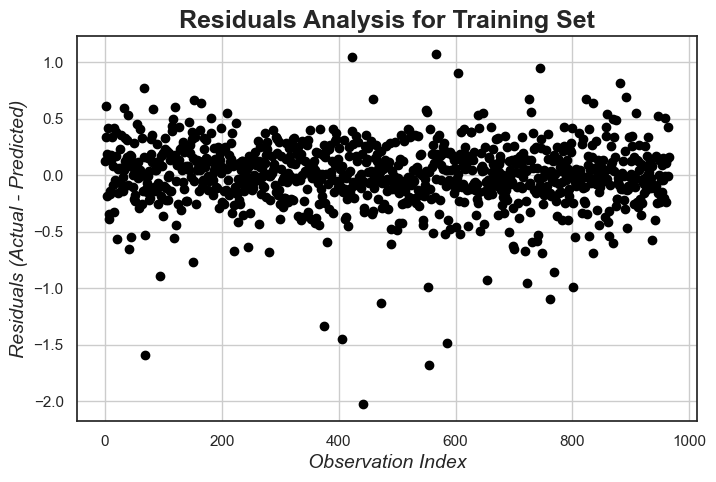

In [846]:
# Configuring the visual appearance for the scatter plot
sb.set_style('white')
pt.figure(figsize=(8,5), dpi=100)
# Generating indices for each observation in the training set
indices = [i for i in range(0, 966, 1)]
# Calculating residuals for the training set by subtracting predicted values from actual values
residuals_train = y_train - y_pred_train_ridge
# Plotting residuals to visually assess the error distribution across observations
pt.scatter(indices, residuals_train, color='black')

pt.title('Residuals Analysis for Training Set', fontsize=18, fontweight='bold')              
pt.xlabel('Observation Index', fontstyle='italic', fontsize=14)                      
pt.ylabel('Residuals (Actual - Predicted)', fontstyle='italic', fontsize=14)   
pt.grid(True)
pt.show()


The residuals are scattered along (y=0) and are independent of each other.

Test Set:

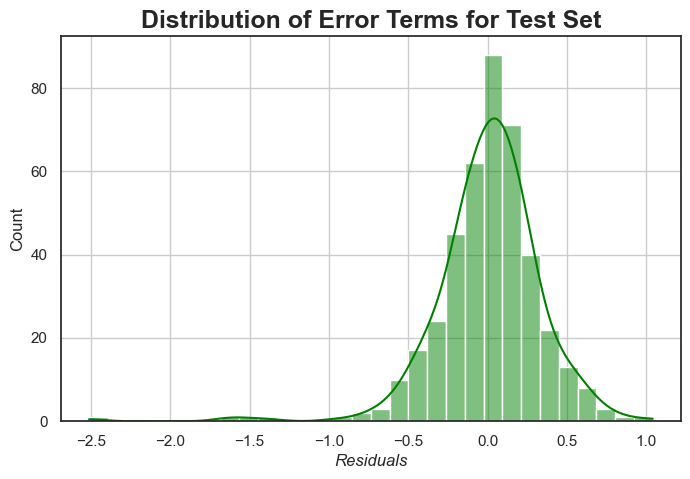

In [847]:
# Applying a clean visual style for the histogram
sb.set_style('white')
pt.figure(figsize=(8,5), dpi=100)
# Calculating the residuals by subtracting the predicted values from the actual test set values
residuals_test = y_test - y_pred_test_ridge
# Plotting the distribution of residuals for the test set to examine their spread and normality
sb.histplot(residuals_test, bins=30, color='green', kde=True)
pt.title('Distribution of Error Terms for Test Set', fontweight='bold', fontsize=18)               
pt.xlabel('Residuals', fontstyle='italic', fontsize=12) 
pt.grid(True)
pt.show()

The distribution of error terms closely approximates a normal distribution centered around zero, confirming our initial assumption.

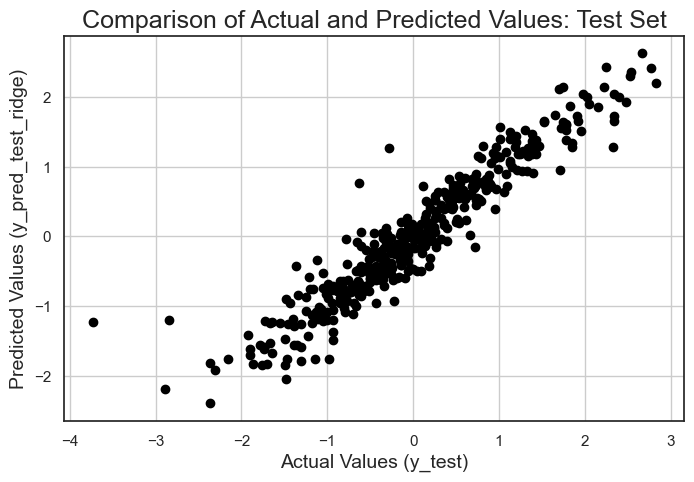

In [848]:
# Applying a clean style for the scatter plot
sb.set_style('white')
pt.figure(figsize=(8,5), dpi=100)
# Plotting actual vs predicted values for the test set to analyze the spread and alignment
pt.scatter(y_test, y_pred_test_ridge, color='Black')
pt.title('Comparison of Actual and Predicted Values: Test Set', fontsize=18)             
pt.xlabel('Actual Values (y_test)', fontsize=14)                       
pt.ylabel('Predicted Values (y_pred_test_ridge)', fontsize=14)  
pt.grid(True)
pt.show()


In [849]:
y_test.shape

(415,)

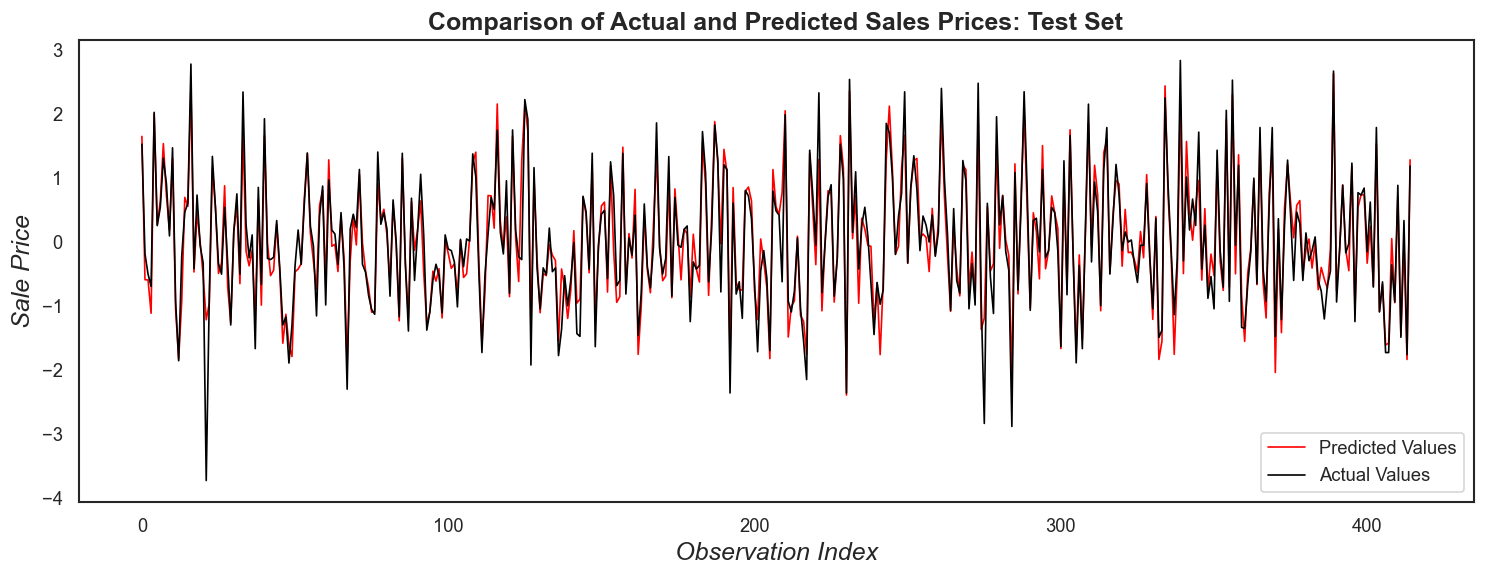

In [850]:
# Setting up the figure for plotting
pt.figure(figsize=(15,5), dpi=120)
# Generating index values corresponding to the number of observations in the test set
index_values = [i for i in range(0, 415, 1)]
# Plotting the predicted sales prices for the test set
pt.plot(index_values, y_pred_test_ridge, color="red", linewidth=1, linestyle="-", label='Predicted Values')
# Plotting the actual sales prices for the test set
pt.plot(index_values, y_test, color="black", linewidth=1, linestyle="-", label='Actual Values')
pt.title('Comparison of Actual and Predicted Sales Prices: Test Set', fontsize=15, fontweight='bold')                              
pt.ylabel('Sale Price', fontstyle='italic', fontsize=15)  
pt.xlabel('Observation Index', fontstyle='italic', fontsize=15)
pt.legend()
pt.show()


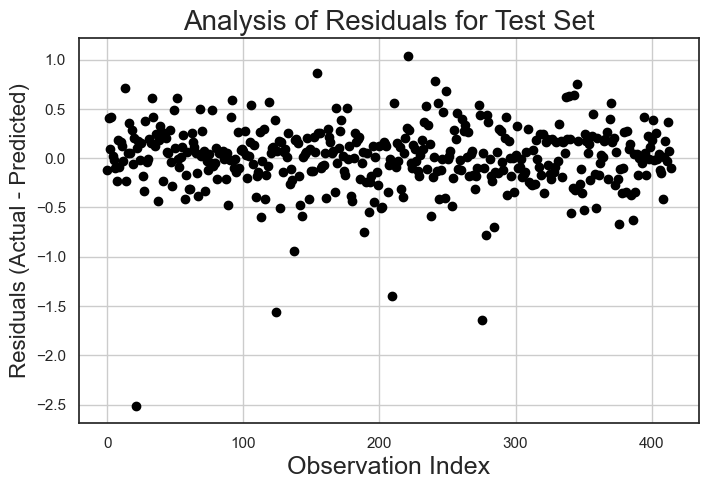

In [851]:
# Initializing the figure for plotting error terms
pt.figure(figsize=(8,5), dpi=100)
# Creating index values for each observation in the test set
indices_test = [i for i in range(0, 415, 1)]
# Calculating the residuals for the test set by subtracting the predicted values from the actual values
residuals_test_set = y_test - y_pred_test_ridge
# Plotting the residuals to assess the spread of errors across the test set
pt.scatter(indices_test, residuals_test_set,color='black')

pt.title('Analysis of Residuals for Test Set', fontsize=20)              
pt.xlabel('Observation Index', fontsize=18)                     
pt.ylabel('Residuals (Actual - Predicted)', fontsize=16)    
pt.grid(True)
pt.show()


The residuals are distributed around the zero line and appear to be uncorrelated with one another.

### Lasso Regression:

In [852]:
# Initializing the Lasso Regression model
lasso_regression = Lasso()

# Defining a range of alpha values for tuning the Lasso Regression model
alpha_values = {
    'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]
}

# Configuring cross-validation settings
num_folds = 5
lasso_cv_model = GridSearchCV(estimator=lasso_regression,                         
                              param_grid=alpha_values, 
                              scoring='neg_mean_absolute_error', 
                              cv=num_folds, 
                              return_train_score=True,
                              verbose=1)            

# Fitting the Lasso model with the training data and cross-validation
lasso_cv_model.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [853]:
# Extracting and displaying the mean scores from the Lasso Regression cross-validation results
lasso_cross_val_scores = pa.DataFrame(lasso_cv_model.cv_results_)
lasso_cross_val_scores[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

param_alpha  mean_train_score  mean_test_score  rank_test_score
7       0.0008         -0.204815        -0.218491                1
6       0.0007         -0.204551        -0.218541                2
8       0.0009         -0.205178        -0.218551                3
9        0.001         -0.205586        -0.218655                4
5       0.0006         -0.204374        -0.218669                5
4       0.0005         -0.204262        -0.218929                6
10       0.002         -0.209765        -0.219500                7
3       0.0003         -0.204037        -0.219761                8
2       0.0002         -0.203856        -0.220362                9
1       0.0001         -0.203667        -0.220846               10
0      0.00001         -0.203646        -0.221940               11
11       0.003         -0.213629        -0.221976               12
12       0.004         -0.217785        -0.225207               13
13       0.005         -0.221637        -0.228714               14
14        0.01         -0.234268        -0.238756               15
15        0.05         -0.254047        -0.256734               16
16         0.1         -0.288447        -0.290993               17
17         0.2         -0.346171        -0.348541               18
18         0.3         -0.422035        -0.424981               19
19         0.4         -0.504218        -0.506613               20
20         0.5         -0.574104        -0.575573               21
21         0.6         -0.635596        -0.636334               22
22         0.7         -0.698352        -0.699364               23
23         0.8         -0.763201        -0.764499               24
37         100         -0.778938        -0.780171               25
36          50         -0.778938        -0.780171               25
35          20         -0.778938        -0.780171               25
34        10.0         -0.778938        -0.780171               25
33         9.0         -0.778938        -0.780171               25
32         8.0         -0.778938        -0.780171               25
31         7.0         -0.778938        -0.780171               25
29         5.0         -0.778938        -0.780171               25
38         500         -0.778938        -0.780171               25
28         4.0         -0.778938        -0.780171               25
27         3.0         -0.778938        -0.780171               25
26         2.0         -0.778938        -0.780171               25
25         1.0         -0.778938        -0.780171               25
24         0.9         -0.778938        -0.780171               25
30         6.0         -0.778938        -0.780171               25
39        1000         -0.778938        -0.780171               25

In [854]:
# Initializing the Lasso Regression model
lasso_regression = Lasso()

# Defining a range of alpha values for tuning the Lasso Regression model
alpha_values = {
    'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]
}

# Configuring cross-validation settings
num_folds = 5
lasso_cv_model = GridSearchCV(estimator=lasso_regression,                         
                              param_grid=alpha_values, 
                              scoring='neg_mean_absolute_error', 
                              cv=num_folds, 
                              return_train_score=True,
                              verbose=1)            

# Fitting the Lasso model with the training data and cross-validation
lasso_cv_model.fit(X_train, y_train)


Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [855]:
# Again Extracting and displaying the mean scores from the Lasso Regression cross-validation results 
lasso_cross_val_scores = pa.DataFrame(lasso_cv_model.cv_results_)
lasso_cross_val_scores[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

param_alpha  mean_train_score  mean_test_score  rank_test_score
8       0.0008         -0.204815        -0.218491                1
7       0.0007         -0.204551        -0.218541                2
9       0.0009         -0.205178        -0.218551                3
10       0.001         -0.205586        -0.218655                4
6       0.0006         -0.204374        -0.218669                5
5       0.0005         -0.204262        -0.218929                6
4       0.0004         -0.204196        -0.219230                7
11       0.002         -0.209765        -0.219500                8
3       0.0003         -0.204037        -0.219761                9
2       0.0002         -0.203856        -0.220362               10
1       0.0001         -0.203667        -0.220846               11
0      0.00001         -0.203646        -0.221940               12
12       0.003         -0.213629        -0.221976               13
13       0.005         -0.221637        -0.228714               14
14        0.01         -0.234268        -0.238756               15
15        0.02         -0.239061        -0.242241               16
16        0.05         -0.254047        -0.256734               17

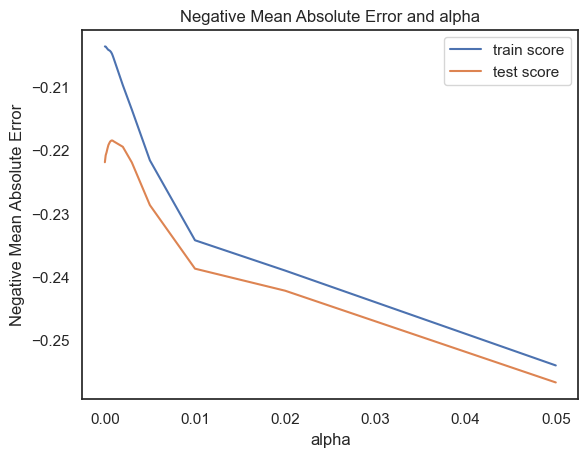

In [856]:
##Plotting mean test and train scoes with alpha 
lasso_cross_val_scores['param_alpha'] = lasso_cross_val_scores['param_alpha'].astype('float64')

##plotting
pt.plot(lasso_cross_val_scores['param_alpha'], lasso_cross_val_scores['mean_train_score'])
pt.plot(lasso_cross_val_scores['param_alpha'], lasso_cross_val_scores['mean_test_score'])
pt.xlabel('alpha')
pt.ylabel('Negative Mean Absolute Error')

pt.title("Negative Mean Absolute Error and alpha")
pt.legend(['train score', 'test score'], loc='upper right')
pt.show()

In [857]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0008)

In [858]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.0944790854526366
Coefficients:
  [ 0.07080482  0.23323257  0.16037145 -0.09007008  0.20298999  0.355595
  0.0950399  -0.31195477  0.          0.18988534  0.         -0.24433642
 -0.0175135  -0.23899983 -0.          0.24449859  0.11636018  0.
 -0.06809653  0.0987505  -0.          0.21483417 -0.08195933 -0.07135901
 -0.19425349 -0.10959753 -0.09332227 -0.16071862  0.13425038 -0.12629378
 -0.11657363 -0.03933758  0.27068429  0.         -0.          0.06525252
  0.02383699 -0.          0.05840407  0.          0.0872689   0.04152521
  0.05201981 -0.         -0.         -0.28262876  0.16613289  0.01560911
 -0.08504821  0.10475364]


In [859]:
# Predicting sales prices using the Lasso Regression model for both training and testing data
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

# Calculating the R2 score to evaluate the Lasso Regression model's accuracy
r2_lasso_train = r2_score(y_true=y_train, y_pred=y_pred_lasso_train)
r2_lasso_test = r2_score(y_true=y_test, y_pred=y_pred_lasso_test)

# Determining the Mean Squared Error (MSE) to assess the average squared difference between estimated and actual values
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)

# Computing the Mean Absolute Error (MAE) to measure the average magnitude of errors in a set of predictions
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

# Calculating the Root Mean Squared Error (RMSE) to evaluate the model's accuracy by squaring the average error
rmse_lasso_train = ny.sqrt(mse_lasso_train)
rmse_lasso_test = ny.sqrt(mse_lasso_test)

# Displaying performance metrics for the Lasso Regression model
print("Lasso Regression Model Performance (With alpha=0.001):\n", "*" * 40)
print("\nTraining Set Metrics:\nR2 Score:", r2_lasso_train, "\nMSE:", mse_lasso_train, "\nMAE:", mae_lasso_train,
      "\nRMSE:", rmse_lasso_train)
print("\nTesting Set Metrics:\nR2 Score:", r2_lasso_test, "\nMSE:", mse_lasso_test, "\nMAE:", mae_lasso_test,
      "\nRMSE:", rmse_lasso_test, "\n", "*" * 40)


Lasso Regression Model Performance (With alpha=0.001):
 ****************************************

Training Set Metrics:
R2 Score: 0.9135059399885377 
MSE: 0.08649406001146226 
MAE: 0.20691162463583912 
RMSE: 0.29409872494021844

Testing Set Metrics:
R2 Score: 0.8984115923743538 
MSE: 0.10994005669786232 
MAE: 0.22847657954370804 
RMSE: 0.3315720987928 
 ****************************************


In [860]:
# Creating a DataFrame to detail the features and their respective coefficients from the Lasso model
lasso_features_df = pa.DataFrame({
    'Feature': X_train.columns, 
    'Coefficient': lasso.coef_.round(4),
    'Absolute_Coefficient': abs(lasso.coef_.round(4))
})

# Sorting the DataFrame based on the absolute coefficient values in descending order for clearer insight
lasso_features_df = lasso_features_df.sort_values(by='Absolute_Coefficient', ascending=False)
lasso_features_df.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the highest impact according to the Lasso regression analysis
lasso_features_df.head(10)


Feature  Coefficient  Absolute_Coefficient
0             GrLivArea       0.3556                0.3556
1           PropertyAge      -0.3120                0.3120
2   Exterior1st_BrkComm      -0.2826                0.2826
3  Neighborhood_StoneBr       0.2707                0.2707
4           MSZoning_FV       0.2445                0.2445
5         MSSubClass_90      -0.2443                0.2443
6        MSSubClass_160      -0.2390                0.2390
7           OverallQual       0.2332                0.2332
8  Neighborhood_Crawfor       0.2148                0.2148
9           TotalBsmtSF       0.2030                0.2030

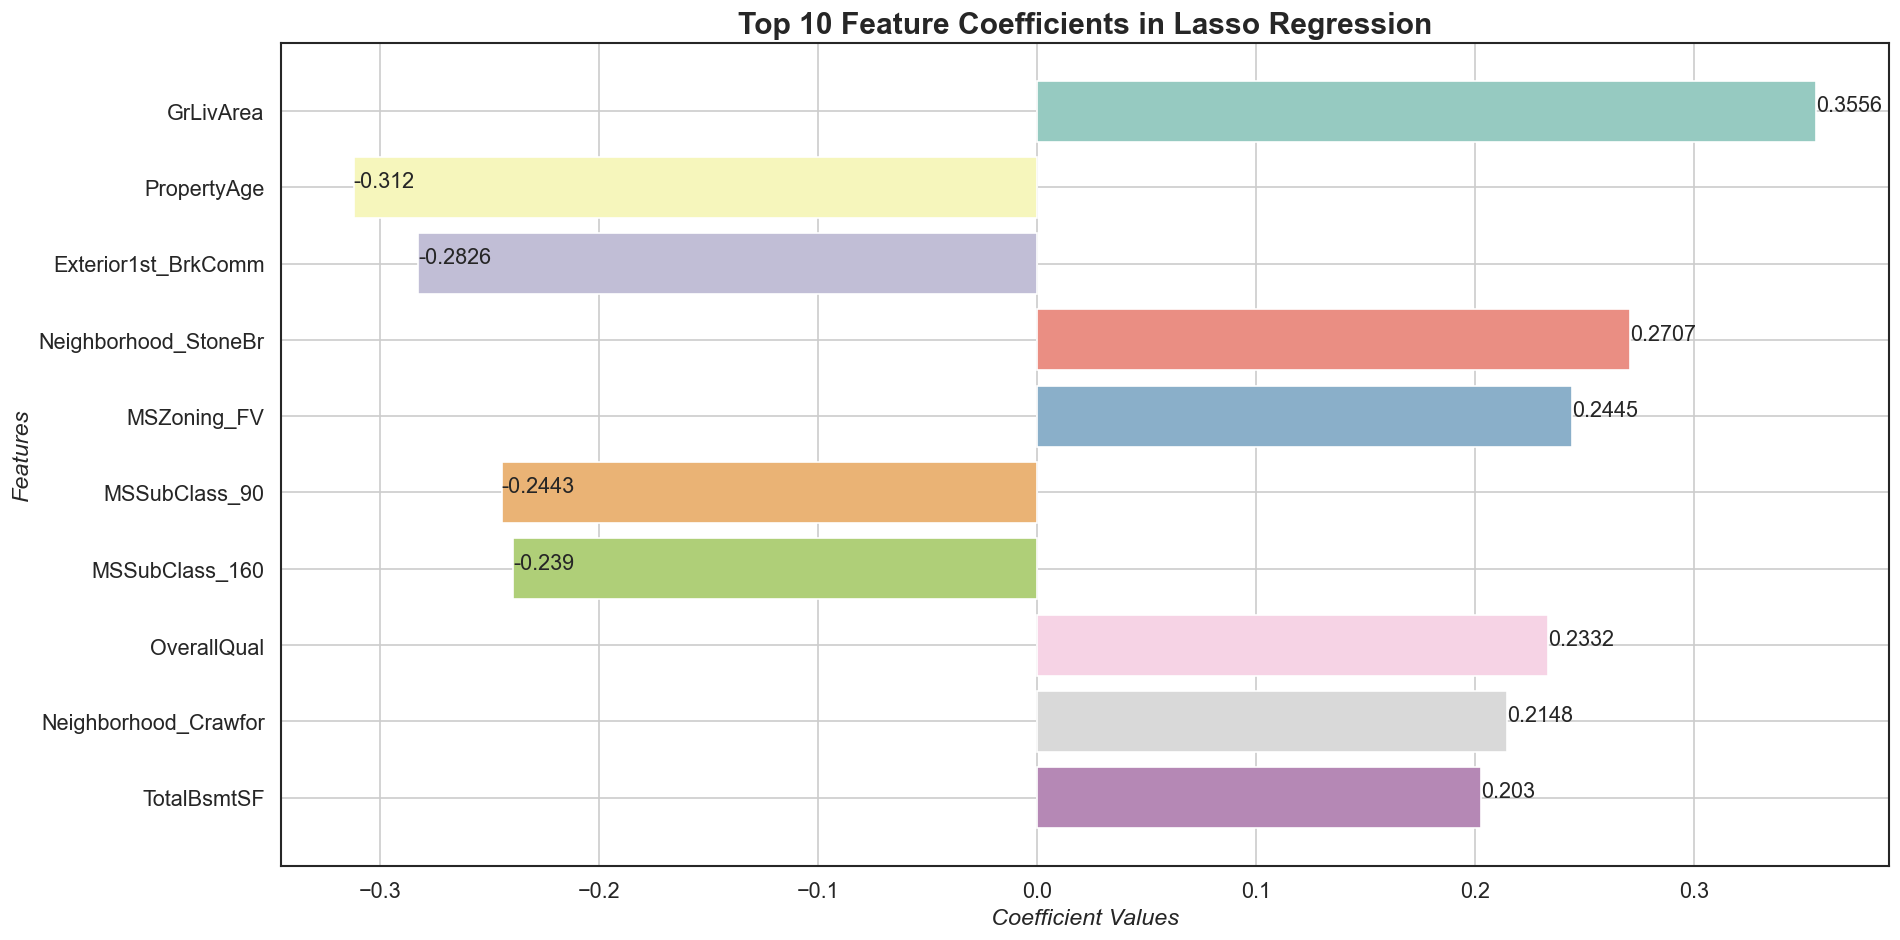

In [861]:
# Extracting the top 10 features based on their coefficients from the Lasso regression model
top10_features_lasso = lasso_features_df.head(10)

# Setting up the plot style for clarity
sb.set(style='white')
pt.figure(figsize=(16,8), dpi=120)
# Creating a bar plot to visualize the coefficients of the top 10 features identified by Lasso regression
bar_plot_lasso = sb.barplot(y=top10_features_lasso['Feature'], x=top10_features_lasso['Coefficient'], palette='Set3')

pt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
pt.ylabel('Features', fontsize=14, fontstyle='italic')
pt.title('Top 10 Feature Coefficients in Lasso Regression', fontsize=18, fontweight='bold')

# Annotating the coefficient values on the bar plot for detailed insight
coefficients = top10_features_lasso['Coefficient']
for index, value in enumerate(coefficients):
    pt.text(value, index, str(value), fontsize=13)

pt.grid(True)
pt.xticks(fontsize=13)
pt.yticks(fontsize=13)
pt.autoscale()
pt.tight_layout()
pt.show()


In [862]:
# Selecting the top 5 most influential features identified by the Lasso Regression model
top5_lasso_features = list(top10_features_lasso['Feature'].iloc[:5])
top5_lasso_features


['GrLivArea',
 'PropertyAge',
 'Exterior1st_BrkComm',
 'Neighborhood_StoneBr',
 'MSZoning_FV']

### Analyzing Model Residuals - Lasso

Evaluating the distribution of error terms to confirm their normality, which is a critical assumption underlying linear regression analysis.

Train Set:

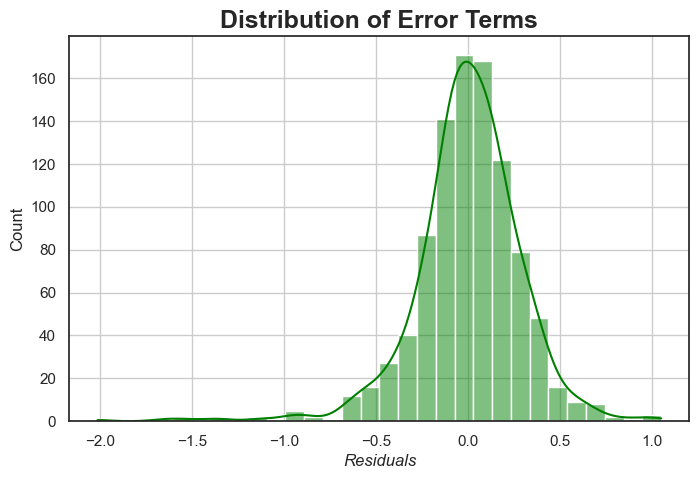

In [863]:
# Setting the visual style for the plot
sb.set_style('white')
pt.figure(figsize=(8,5), dpi=100)
# Calculating residuals by subtracting predicted values from actual values
residuals = y_train - y_pred_lasso_train
# Plotting the distribution of residuals to assess normality
sb.histplot(residuals, bins=30, color='green', kde=True)
pt.title('Distribution of Error Terms', fontweight='bold', fontsize=18)
pt.xlabel('Residuals', fontstyle='italic', fontsize=12)
pt.grid(True)
pt.show()

The distribution of error terms closely aligns with a normal distribution centered around zero, affirming our underlying assumption.

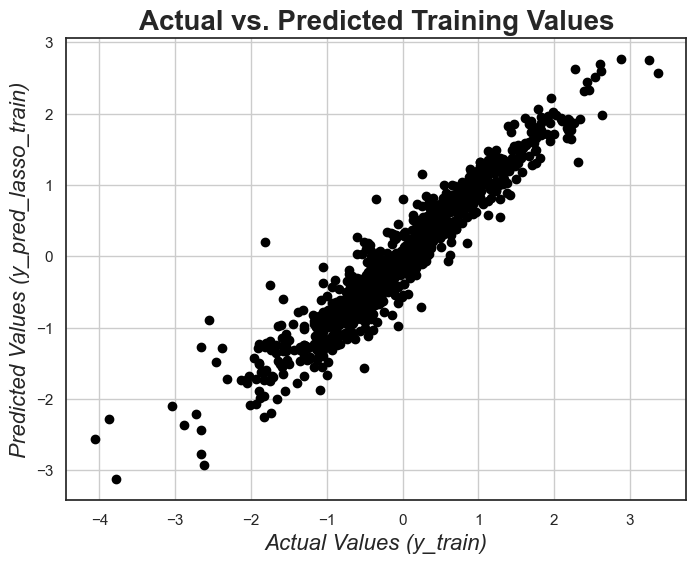

In [864]:
# Configuring the visual style for the scatter plot
sb.set_style('white')
pt.figure(figsize=(8,6))
# Creating a scatter plot to analyze the relationship between actual and predicted training values
pt.scatter(y_train, y_pred_lasso_train, color='black')
pt.title('Actual vs. Predicted Training Values', fontweight='bold', fontsize=20)
pt.xlabel('Actual Values (y_train)', fontstyle='italic', fontsize=16)
pt.ylabel('Predicted Values (y_pred_lasso_train)', fontstyle='italic', fontsize=16)
pt.grid(True)
pt.show()



In [865]:
y_train.shape

(966,)

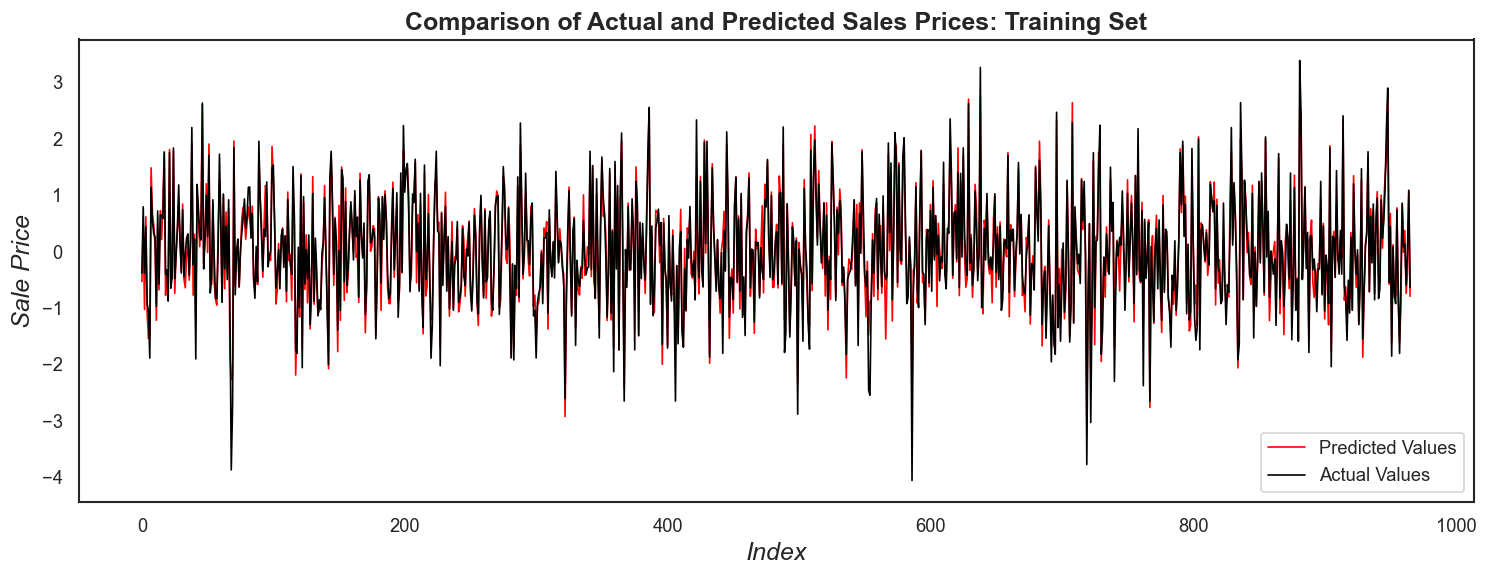

In [866]:
# Setting the visual style for the plots
sb.set_style('white')
pt.figure(figsize=(15,5), dpi=120)
# Generating indices for plotting, corresponding to the number of observations in y_train
indices = [i for i in range(0, 966, 1)]
# Plotting the predicted values from the Ridge model for the training dataset
pt.plot(indices, y_pred_lasso_train, color="red", linewidth=1, linestyle="-", label='Predicted Values')
# Plotting the actual values from the training dataset
pt.plot(indices, y_train, color="black", linewidth=1, linestyle="-", label='Actual Values')
pt.title("Comparison of Actual and Predicted Sales Prices: Training Set", fontsize=15, fontweight='bold')    
pt.xlabel('Index', fontstyle='italic', fontsize=15)                              
pt.ylabel('Sale Price', fontstyle='italic', fontsize=15)
pt.legend()
pt.show()


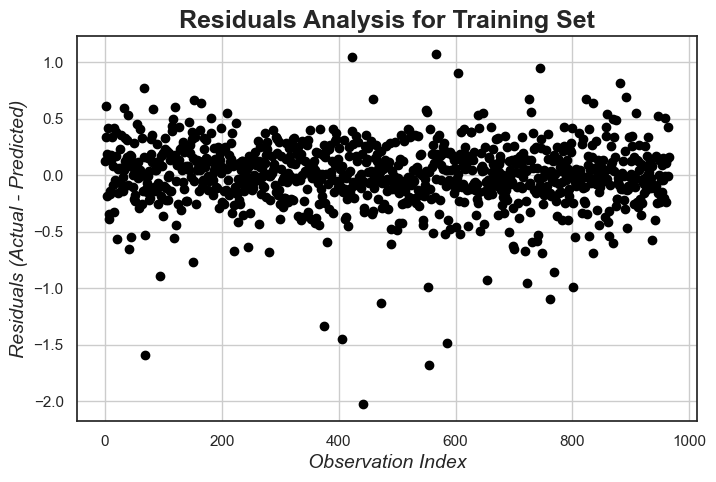

In [867]:
# Configuring the visual appearance for the scatter plot
sb.set_style('white')
pt.figure(figsize=(8,5), dpi=100)
# Generating indices for each observation in the training set
indices = [i for i in range(0, 966, 1)]
# Calculating residuals for the training set by subtracting predicted values from actual values
residuals_train = y_train - y_pred_train_ridge
# Plotting residuals to visually assess the error distribution across observations
pt.scatter(indices, residuals_train, color='black')

pt.title('Residuals Analysis for Training Set', fontsize=18, fontweight='bold')              
pt.xlabel('Observation Index', fontstyle='italic', fontsize=14)                      
pt.ylabel('Residuals (Actual - Predicted)', fontstyle='italic', fontsize=14)   
pt.grid(True)
pt.show()


The residuals are scattered along (y=0) and are independent of each other.

Test Set:

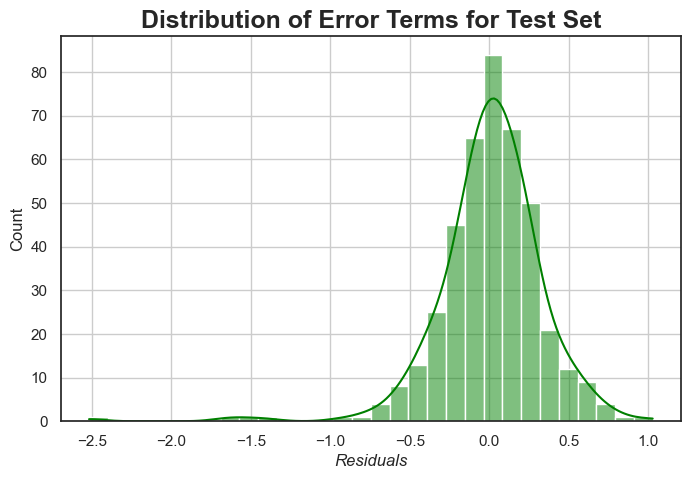

In [868]:
# Applying a clean visual style for the histogram
sb.set_style('white')
pt.figure(figsize=(8,5), dpi=100)
# Calculating the residuals by subtracting the predicted values from the actual test set values
residuals_test = y_test - y_pred_lasso_test
# Plotting the distribution of residuals for the test set to examine their spread and normality
sb.histplot(residuals_test, bins=30, color='green', kde=True)
pt.title('Distribution of Error Terms for Test Set', fontweight='bold', fontsize=18)               
pt.xlabel('Residuals', fontstyle='italic', fontsize=12) 
pt.grid(True)
pt.show()

The distribution of error terms closely approximates a normal distribution centered around zero, confirming our initial assumption.

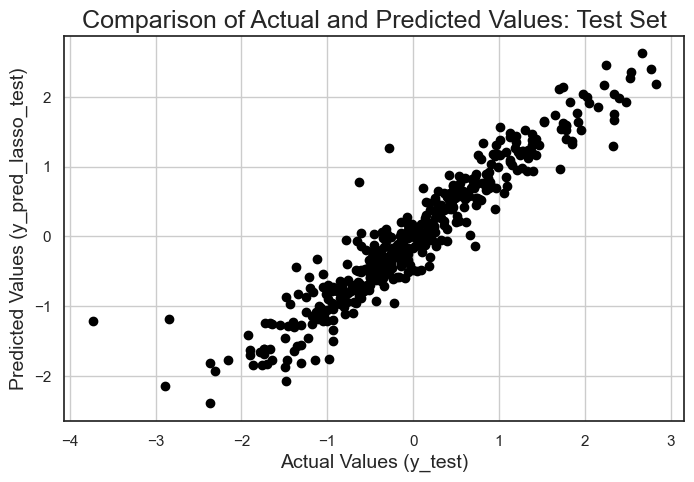

In [869]:
# Applying a clean style for the scatter plot
sb.set_style('white')
pt.figure(figsize=(8,5), dpi=100)
# Plotting actual vs predicted values for the test set to analyze the spread and alignment
pt.scatter(y_test, y_pred_lasso_test, color='Black')
pt.title('Comparison of Actual and Predicted Values: Test Set', fontsize=18)             
pt.xlabel('Actual Values (y_test)', fontsize=14)                       
pt.ylabel('Predicted Values (y_pred_lasso_test)', fontsize=14)  
pt.grid(True)
pt.show()


In [870]:
y_test.shape

(415,)

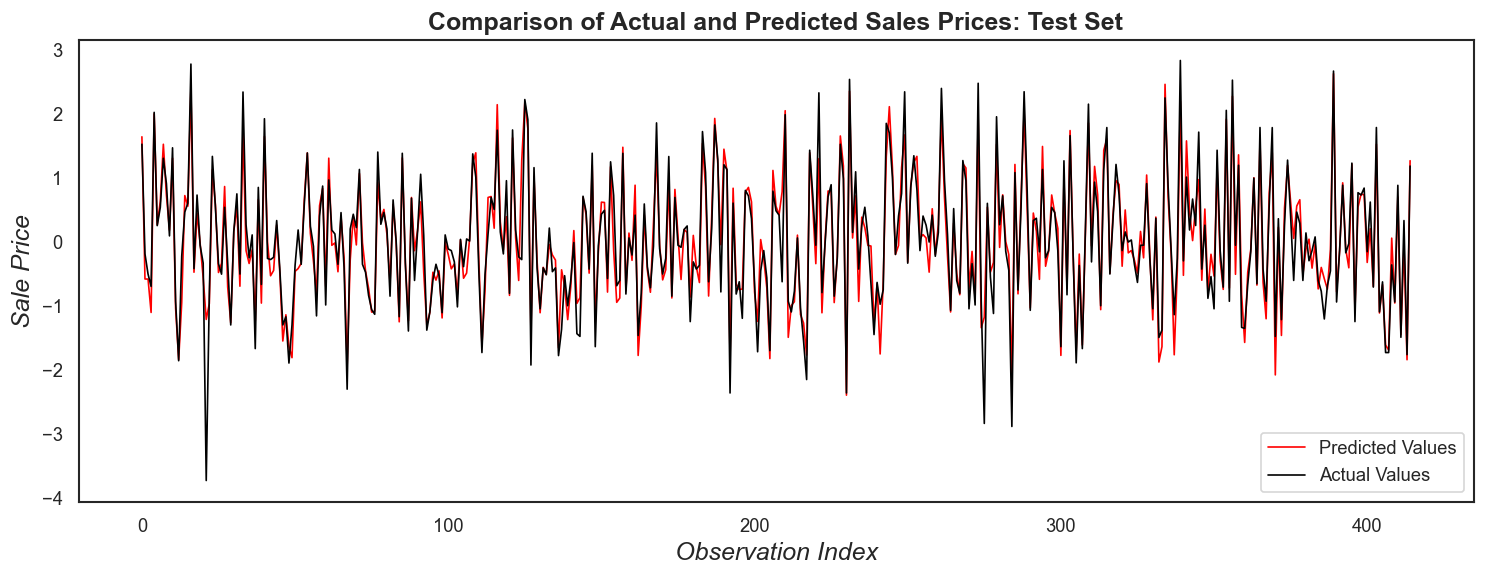

In [871]:
# Setting up the figure for plotting
pt.figure(figsize=(15,5), dpi=120)
# Generating index values corresponding to the number of observations in the test set
index_values = [i for i in range(0, 415, 1)]
# Plotting the predicted sales prices for the test set
pt.plot(index_values, y_pred_lasso_test, color="red", linewidth=1, linestyle="-", label='Predicted Values')
# Plotting the actual sales prices for the test set
pt.plot(index_values, y_test, color="black", linewidth=1, linestyle="-", label='Actual Values')
pt.title('Comparison of Actual and Predicted Sales Prices: Test Set', fontsize=15, fontweight='bold')                              
pt.ylabel('Sale Price', fontstyle='italic', fontsize=15)  
pt.xlabel('Observation Index', fontstyle='italic', fontsize=15)
pt.legend()
pt.show()

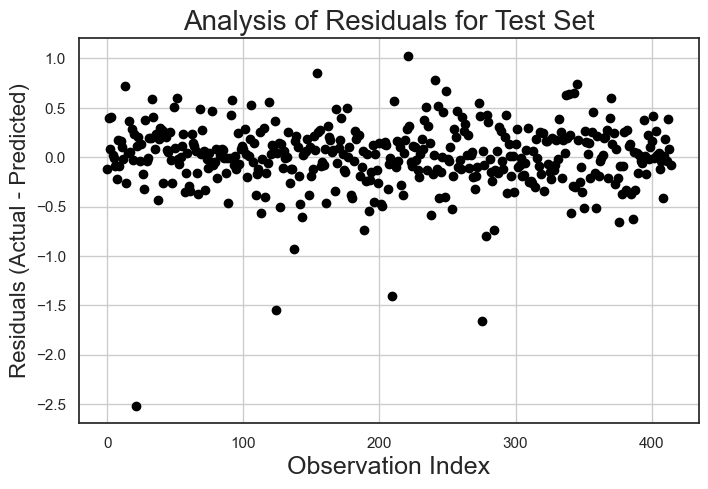

In [872]:
# Initializing the figure for plotting error terms
pt.figure(figsize=(8,5), dpi=100)
# Creating index values for each observation in the test set
indices_test = [i for i in range(0, 415, 1)]
# Calculating the residuals for the test set by subtracting the predicted values from the actual values
residuals_test_set = y_test - y_pred_lasso_test
# Plotting the residuals to assess the spread of errors across the test set
pt.scatter(indices_test, residuals_test_set,color='black')

pt.title('Analysis of Residuals for Test Set', fontsize=20)              
pt.xlabel('Observation Index', fontsize=18)                     
pt.ylabel('Residuals (Actual - Predicted)', fontsize=16)    
pt.grid(True)
pt.show()

The residuals are distributed around the zero line and appear to be uncorrelated with one another.

### Additional Section for Subjective Questions:

#### Question 1:

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [873]:
# Storing the optimal alpha values previously identified for Ridge and Lasso Regression models

optimal_alpha_ridge = 8.0        # Optimal alpha value for Ridge Regression
optimal_alpha_lasso = 0.001      # Optimal alpha value for Lasso Regression


#### Changes to the model when we double the value of alpha for both ridge and lasso regression:

### Ridge Regression

In [874]:
# Fitting the Ridge Regression model with an updated alpha value, double the previously determined optimal
ridge  = Ridge(alpha=16)

ridge .fit(X_train, y_train)
# Displaying the model's intercept and the set of coefficients for analysis
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n", ridge.coef_)

Intercept:  -0.10404484857115498
Coefficients:
 [ 0.07784594  0.25363824  0.15618383 -0.08899585  0.20331273  0.34466624
  0.10015476 -0.29044012  0.03144753  0.14937853  0.00563516 -0.18148798
  0.00133167 -0.14927792 -0.05320973  0.17588443  0.11587234  0.04442904
 -0.06205817  0.09666882 -0.03182806  0.16118951 -0.07903709 -0.07346436
 -0.09759823 -0.09336806 -0.08829789 -0.13568337  0.09728447 -0.11885101
 -0.09732272 -0.04418544  0.16072053  0.0073089  -0.04847964  0.07988996
  0.04206505 -0.00525054  0.06379129  0.01521488  0.07593165  0.06082675
  0.05647679 -0.01720107 -0.03137067 -0.07885678  0.12955458  0.03652461
 -0.07893109  0.07219665]


In [875]:

# Generating predictions for both the training and testing datasets using the Ridge Regression model
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# Calculating the R2 score for the Ridge Regression model on both sets
r2_score_train_ridge = r2_score(y_true=y_train, y_pred=y_pred_train_ridge)
r2_score_test_ridge = r2_score(y_true=y_test, y_pred=y_pred_test_ridge)

# Determining the Mean Squared Error (MSE) for the Ridge Regression model
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

# Calculating the Mean Absolute Error (MAE) for both the train and test datasets
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)

# Computing the Root Mean Squared Error (RMSE) for both datasets
rmse_train_ridge = ny.sqrt(mse_train_ridge)
rmse_test_ridge = ny.sqrt(mse_test_ridge)

# Summary of model performance metrics for Ridge Regression with alpha set to 16.0
print("Ridge Regression Model Performance (Doubled Alpha=8*2=16):\n", "-"*40)
print("\nTraining Set Metrics:\nR2 Score:", r2_score_train_ridge, "\nMSE:", mse_train_ridge, "\nMAE:", mae_train_ridge,
      "\nRMSE:", rmse_train_ridge)
print("\nTesting Set Metrics:\nR2 Score:", r2_score_test_ridge, "\nMSE:", mse_test_ridge, "\nMAE:", mae_test_ridge,
      "\nRMSE:", rmse_test_ridge, "\n", "-"*40)


Ridge Regression Model Performance (Doubled Alpha=8*2=16):
 ----------------------------------------

Training Set Metrics:
R2 Score: 0.9111010762652046 
MSE: 0.08889892373479537 
MAE: 0.20892933701756003 
RMSE: 0.29815922547322826

Testing Set Metrics:
R2 Score: 0.8975371403846054 
MSE: 0.1108863979545022 
MAE: 0.23120844486768852 
RMSE: 0.33299609300185823 
 ----------------------------------------


In [876]:
# Constructing a DataFrame to display the features and their respective coefficients from the updated Ridge model
ridge_features_df = pa.DataFrame({
    'Feature': X_train.columns, 
    'Coefficient': ridge.coef_.round(4),
    'Absolute_Coefficient': abs(ridge.coef_.round(4))
})

# Reordering the DataFrame based on the absolute value of coefficients in descending order and resetting the index for clarity
ridge_features_df = ridge_features_df.sort_values(by='Absolute_Coefficient', ascending=False)
ridge_features_df.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the highest absolute coefficients from the Ridge regression model
ridge_features_df.head(10)


Feature  Coefficient  Absolute_Coefficient
0             GrLivArea       0.3447                0.3447
1           PropertyAge      -0.2904                0.2904
2           OverallQual       0.2536                0.2536
3           TotalBsmtSF       0.2033                0.2033
4         MSSubClass_90      -0.1815                0.1815
5           MSZoning_FV       0.1759                0.1759
6  Neighborhood_Crawfor       0.1612                0.1612
7  Neighborhood_StoneBr       0.1607                0.1607
8           OverallCond       0.1562                0.1562
9         MSSubClass_70       0.1494                0.1494

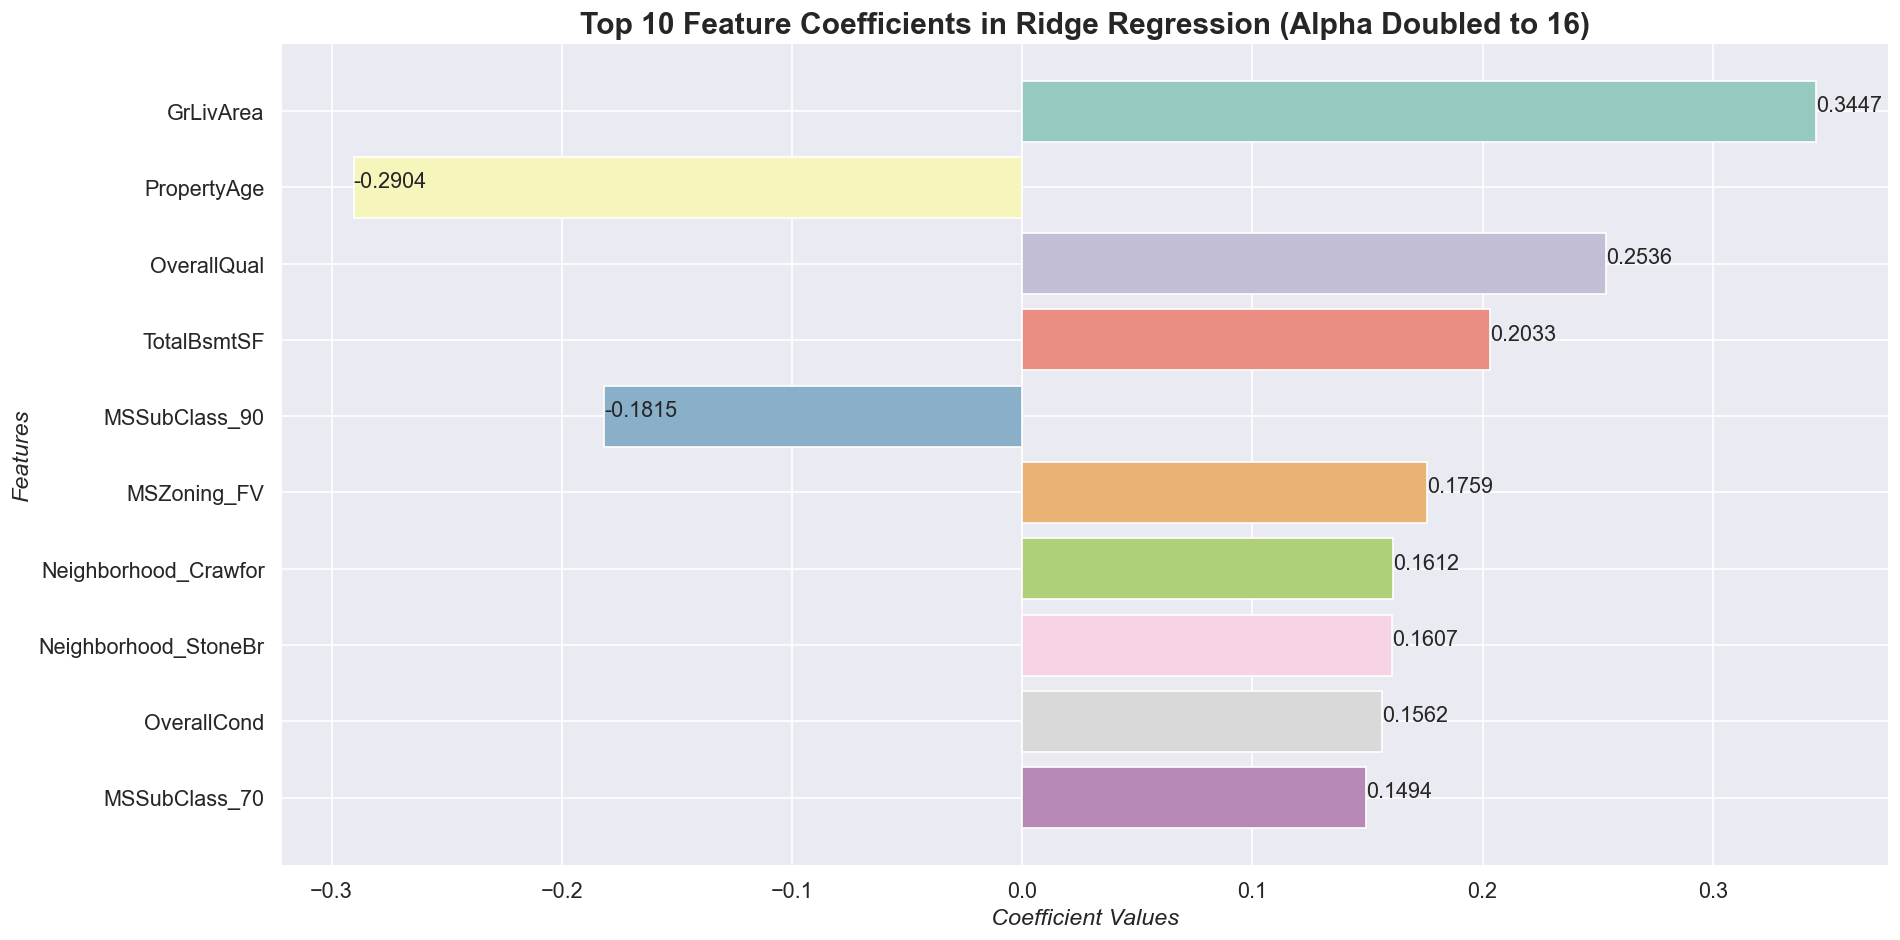

In [877]:
# Displaying the top 10 features with the highest coefficients from the Ridge regression model, using a doubled alpha value
top10_features_ridge = ridge_features_df.head(10)

# Setting the visual style for the plot
sb.set(style='darkgrid')
pt.figure(figsize=(16,8), dpi=120)
# Creating a bar plot to visualize the coefficients of the top 10 features
bar_plot_ridge = sb.barplot(y=top10_features_ridge['Feature'], x=top10_features_ridge['Coefficient'], palette='Set3')

pt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
pt.ylabel('Features', fontsize=14, fontstyle='italic')
pt.title('Top 10 Feature Coefficients in Ridge Regression (Alpha Doubled to 16)', fontsize=18, fontweight='bold')

# Annotating the plot with coefficient values for each feature
coefficients = top10_features_ridge['Coefficient']
for index, value in enumerate(coefficients):
    pt.text(value, index, str(value), fontsize=13)

pt.grid(True)
pt.xticks(fontsize=13)
pt.yticks(fontsize=13)
pt.autoscale()
pt.tight_layout()
pt.show()


In [878]:
print("Ridge Regression Analysis (With Alpha Doubled to 16): \n", "-"*125)
print("Top 10 Most Significant Predictor Variables Post Adjustment:\n\n", list(top10_features_ridge['Feature']), "\n", "-"*125)


Ridge Regression Analysis (With Alpha Doubled to 16): 
 -----------------------------------------------------------------------------------------------------------------------------
Top 10 Most Significant Predictor Variables Post Adjustment:

 ['GrLivArea', 'PropertyAge', 'OverallQual', 'TotalBsmtSF', 'MSSubClass_90', 'MSZoning_FV', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'OverallCond', 'MSSubClass_70'] 
 -----------------------------------------------------------------------------------------------------------------------------


### Lasso Regression

In [879]:
##Evaluating the impact on coefficient values by doubling the alpha parameter to 0.002 in the Lasso Regression model.

lasso = Lasso(alpha=0.002)
        
lasso.fit(X_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)

Intercept:  -0.1106782507792394
Coefficients:
  [ 7.16068227e-02  2.54710351e-01  1.60225793e-01 -8.44245074e-02
  2.01873391e-01  3.53944700e-01  9.98551985e-02 -3.06633658e-01
  0.00000000e+00  1.68657210e-01 -0.00000000e+00 -2.29794013e-01
 -0.00000000e+00 -1.79816979e-01 -0.00000000e+00  2.15388148e-01
  1.15716803e-01  0.00000000e+00 -0.00000000e+00  9.23083163e-02
 -0.00000000e+00  2.26318437e-01 -2.85098357e-02 -0.00000000e+00
 -4.94430383e-02 -5.79783676e-02 -4.48944476e-02 -1.25968612e-01
  9.98432462e-02 -6.98934443e-02 -5.63711680e-02 -3.93928783e-05
  2.02389919e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  3.78825373e-02  0.00000000e+00
  1.00772345e-02  3.77069041e-02  3.08607322e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.50710046e-01  0.00000000e+00
 -5.25945847e-02  0.00000000e+00]


In [880]:
# Predicting sales prices using the Lasso Regression model for both training and testing data
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

# Calculating the R2 score to evaluate the Lasso Regression model's accuracy
r2_lasso_train = r2_score(y_true=y_train, y_pred=y_pred_lasso_train)
r2_lasso_test = r2_score(y_true=y_test, y_pred=y_pred_lasso_test)

# Determining the Mean Squared Error (MSE) to assess the average squared difference between estimated and actual values
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)

# Computing the Mean Absolute Error (MAE) to measure the average magnitude of errors in a set of predictions
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

# Calculating the Root Mean Squared Error (RMSE) to evaluate the model's accuracy by squaring the average error
rmse_lasso_train = ny.sqrt(mse_lasso_train)
rmse_lasso_test = ny.sqrt(mse_lasso_test)

# Displaying performance metrics for the Lasso Regression model
print("Lasso Regression Model Performance (With Doubled alpha:0.001*2 = 0.002):\n", "*" * 40)
print("\nTraining Set Metrics:\nR2 Score:", r2_lasso_train, "\nMSE:", mse_lasso_train, "\nMAE:", mae_lasso_train,
      "\nRMSE:", rmse_lasso_train)
print("\nTesting Set Metrics:\nR2 Score:", r2_lasso_test, "\nMSE:", mse_lasso_test, "\nMAE:", mae_lasso_test,
      "\nRMSE:", rmse_lasso_test, "\n", "*" * 40)


Lasso Regression Model Performance (With Doubled alpha:0.001*2 = 0.002):
 ****************************************

Training Set Metrics:
R2 Score: 0.909273732835048 
MSE: 0.09072626716495198 
MAE: 0.21075465161767734 
RMSE: 0.3012080131154415

Testing Set Metrics:
R2 Score: 0.8987595121571955 
MSE: 0.109563534203358 
MAE: 0.22810198707416482 
RMSE: 0.331003828079613 
 ****************************************


In [881]:
# Constructing a DataFrame to showcase the coefficients of features from the Lasso Regression model
lasso_features_df = pa.DataFrame({
    'Feature': X_train.columns, 
    'Coefficient': lasso.coef_.round(4),  # Rounding coefficients for readability
    'Absolute_Coefficient': abs(lasso.coef_.round(4))  # Calculating absolute values for sorting
})

# Ordering the DataFrame by the absolute coefficient values in descending order to highlight the most influential features
lasso_features_df = lasso_features_df.sort_values(by='Absolute_Coefficient', ascending=False)
lasso_features_df.reset_index(drop=True, inplace=True)  # Resetting the index after sorting

# Displaying the top 10 features with the highest absolute coefficients for analysis
lasso_features_df.head(10)


Feature  Coefficient  Absolute_Coefficient
0             GrLivArea       0.3539                0.3539
1           PropertyAge      -0.3066                0.3066
2           OverallQual       0.2547                0.2547
3         MSSubClass_90      -0.2298                0.2298
4  Neighborhood_Crawfor       0.2263                0.2263
5           MSZoning_FV       0.2154                0.2154
6  Neighborhood_StoneBr       0.2024                0.2024
7           TotalBsmtSF       0.2019                0.2019
8        MSSubClass_160      -0.1798                0.1798
9         MSSubClass_70       0.1687                0.1687

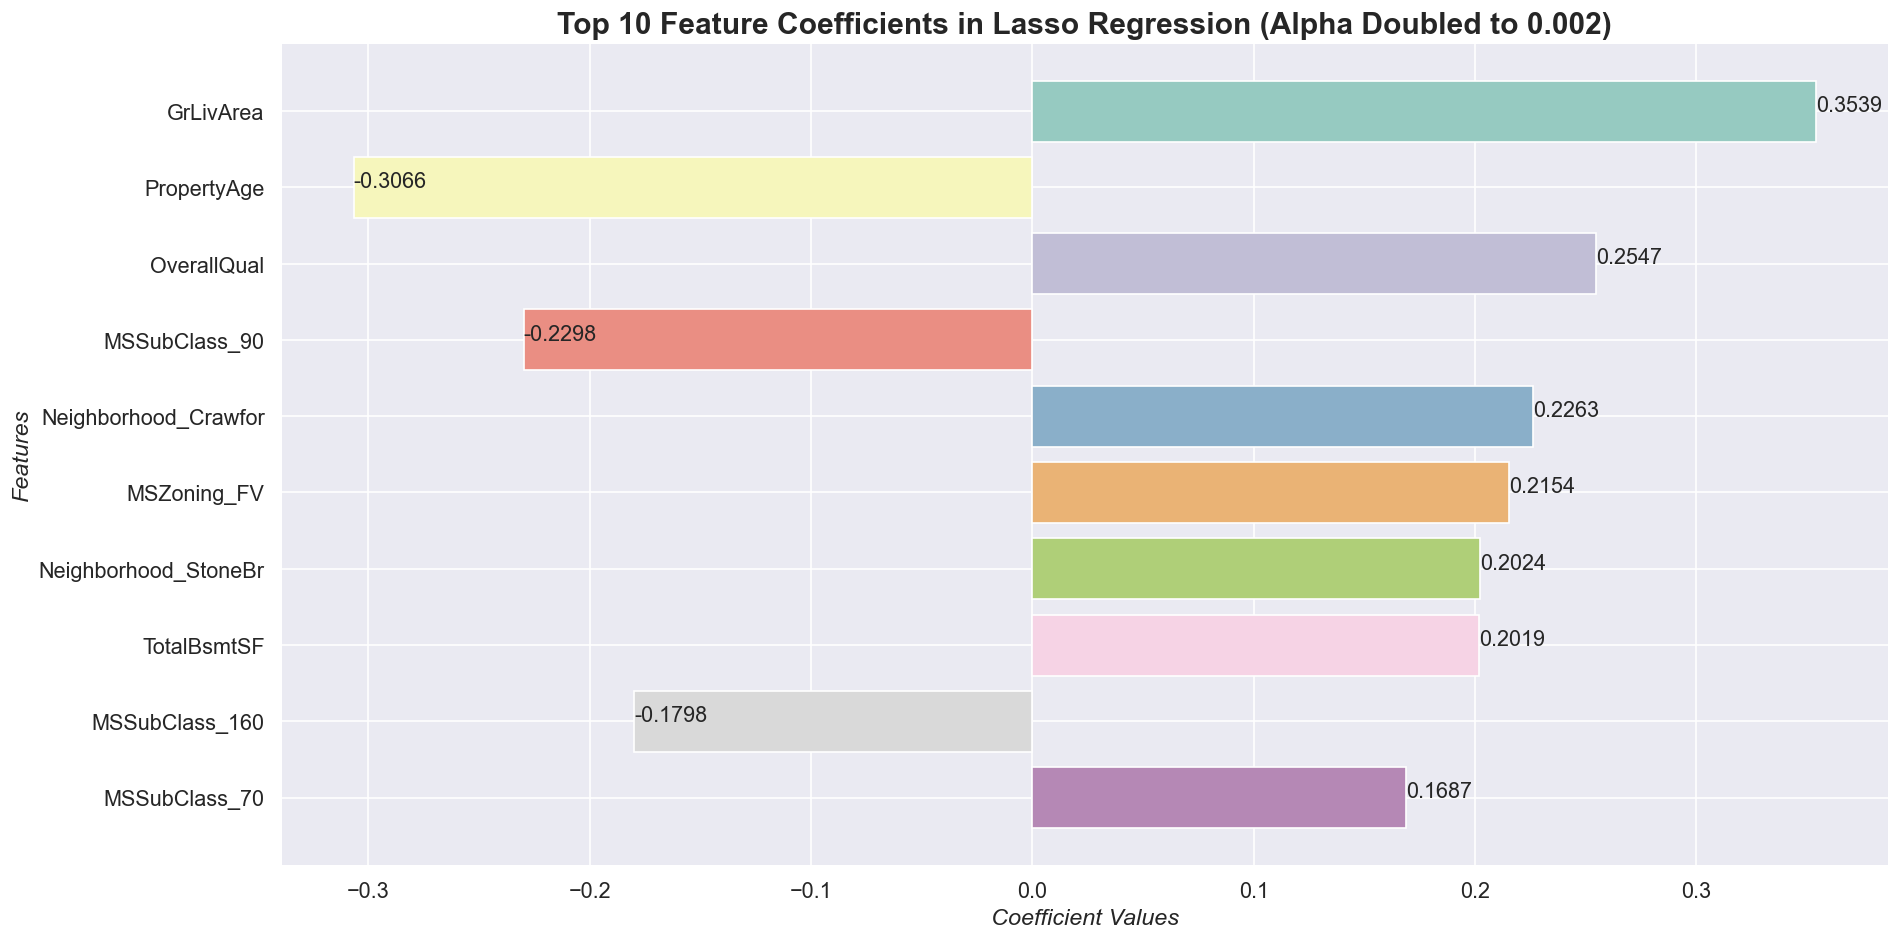

In [882]:
# Displaying the top 10 features by coefficient magnitude from the Lasso Regression model, using a doubled alpha value
top10_features_lasso = lasso_features_df.head(10)

# Configuring the plot style and dimensions for clarity and aesthetics
sb.set(style='darkgrid')
pt.figure(figsize=(16,8), dpi=120)
# Creating a bar plot to visualize the magnitude and direction of the top 10 coefficients
bar_plot_lasso = sb.barplot(y=top10_features_lasso['Feature'], x=top10_features_lasso['Coefficient'], palette='Set3')

pt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
pt.ylabel('Features', fontsize=14, fontstyle='italic')
pt.title('Top 10 Feature Coefficients in Lasso Regression (Alpha Doubled to 0.002)', fontsize=18, fontweight='bold')

# Annotating the plot with coefficient values for enhanced insight
coefficients = top10_features_lasso['Coefficient']
for index, value in enumerate(coefficients):
    pt.text(value, index, str(value), fontsize=13)

pt.grid(True)
pt.xticks(fontsize=13)
pt.yticks(fontsize=13)
pt.autoscale()
pt.tight_layout()
pt.show()



In [883]:
print("Lasso Regression Analysis (With Alpha Increased to 0.002): \n", "-"*125)
print("Top 10 Key Predictor Variables Identified Post-Adjustment:\n\n", list(top10_features_lasso['Feature']), "\n", "-"*125)


Lasso Regression Analysis (With Alpha Increased to 0.002): 
 -----------------------------------------------------------------------------------------------------------------------------
Top 10 Key Predictor Variables Identified Post-Adjustment:

 ['GrLivArea', 'PropertyAge', 'OverallQual', 'MSSubClass_90', 'Neighborhood_Crawfor', 'MSZoning_FV', 'Neighborhood_StoneBr', 'TotalBsmtSF', 'MSSubClass_160', 'MSSubClass_70'] 
 -----------------------------------------------------------------------------------------------------------------------------


#### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Optimal Alpha Values Determined:

For Ridge Regression, the optimal alpha value identified is 8.0.
For Lasso Regression, the optimal alpha value found is 0.001.

Comparative Analysis:

The Lasso Regression Model demonstrates a marginally superior R2 score for the test set compared to the Ridge Regression Model, indicating slightly better performance on unseen data. Additionally, the Lasso Regression Model shows a modest decrease in training accuracy, suggesting it might be a preferable choice due to its enhanced generalizability.

Performance Metrics:

The Mean Squared Error (MSE) for the test set is somewhat lower in the Lasso Regression Model than in the Ridge Regression Model. This suggests that Lasso Regression has a slight advantage in handling unseen test data. The ability of Lasso Regression to perform feature selection—reducing the coefficients of less significant predictors to zero—further underscores its superiority in this context. By identifying and utilizing only the most relevant variables, Lasso Regression provides a more focused approach for predicting house prices in this analysis.

Considerations for Regression Choice:

When selecting a regression model for practical applications, analysts must navigate challenges such as outliers, non-normally distributed errors, and the risk of overfitting, particularly in sparse datasets. The L2 norm utilized in Ridge Regression may leave models more susceptible to these issues. In contrast, the L1 norm employed by Lasso Regression offers greater resilience, mitigating such risks more effectively and leading to more robust and reliable models.

#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [884]:
##From Original Lasso Regression Model, import 'top5_lasso_features': Top5 features
print("Top 5 features in original lasso model (dropped):\n", top5_lasso_features)

House_Dataset= House_Dataset_copy

##Removing these top5 features (as per Original Lasso Model) from 'House_Dataset'
House_Dataset= House_Dataset.drop(top5_lasso_features, axis=1)
House_Dataset.head()

Top 5 features in original lasso model (dropped):
 ['GrLivArea', 'PropertyAge', 'Exterior1st_BrkComm', 'Neighborhood_StoneBr', 'MSZoning_FV']


LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0        150          856             1         2         1             3   
1        284         1262             0         2         0             3   
2        434          920             1         2         1             3   
3        540          756             1         1         0             3   
4        490         1145             1         2         1             4   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0           0         548           0           61  12.247699   
1           1         460         298            0  12.109016   
2           1         608           0           42  12.317171   
3           1         642           0           35  11.849405   
4           1         836         192           84  12.429220   

   WhetherRemodelled  d_LotShape  d_HeatingQC  d_GarageFinish  d_BsmtExposure  \
0                  0           3            5               2               1   
1                  0           3            5               2               4   
2                  1           2            5               2               2   
3                  1           2            4               1               1   
4                  0           2            5               2               3   

   d_BsmtQual  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0           4          False          False          False          False   
1           4          False          False          False          False   
2           4          False          False          False          False   
3           3          False          False          False          False   
4           4          False          False          False          False   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0           True          False          False          False          False   
1          False          False          False          False          False   
2           True          False          False          False          False   
3          False           True          False          False          False   
4           True          False          False          False          False   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0          False           False           False           False   
1          False           False           False           False   
2          False           False           False           False   
3          False           False           False           False   
4          False           False           False           False   

   MSSubClass_190  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0           False              False          False          False   
1           False              False           True          False   
2           False              False          False          False   
3           False              False          False          False   
4           False              False           True          False   

   LotConfig_Inside  MSZoning_RH  MSZoning_RL  Foundation_CBlock  \
0              True        False         True              False   
1             False        False         True               True   
2              True        False         True              False   
3             False        False         True              False   
4             False        False         True              False   

   Foundation_Sl

In [885]:
# Define a function to identify columns in the 'House_Dataset' dataframe that contain binary values
def identify_binary_columns(dataset):
    # Create a copy of the dataset to avoid altering the original data
    dataset_copy = dataset.copy()
    # Determine which columns have exactly two unique values, indicating binary data
    is_binary = (dataset_copy.nunique() == 2)
    # Compile a list of these binary columns
    binary_columns_list = list(is_binary[is_binary.values == True].index)
    return binary_columns_list

# Apply the function to the 'House_Dataset' to extract a list of binary columns
binary_columns = identify_binary_columns(House_Dataset)


#### Separating the Data into Training and Test Sets.

In [886]:
ny.random.seed(0)
House_Dataset_train, House_Dataset_test = train_test_split(House_Dataset, train_size=0.7, test_size = 0.3, random_state=100)

Feature Scaling

In [887]:
# Extracting binary columns from the training and testing datasets
House_Dataset_binary_train = House_Dataset_train.loc[:, binary_columns]
House_Dataset_binary_test = House_Dataset_test.loc[:, binary_columns]

# Removing binary columns from the original datasets to avoid scaling issues
House_Dataset_train = House_Dataset_train.drop(binary_columns, axis=1)
House_Dataset_test = House_Dataset_test.drop(binary_columns, axis=1)

# Preparing for feature scaling to ensure consistent data range across variables
all_cols = House_Dataset_train.columns
scaler = StandardScaler()

# Applying the StandardScaler to normalize the training data
House_Dataset_train[all_cols] = scaler.fit_transform(House_Dataset_train[all_cols])
# Reintegrating binary columns to the normalized training dataset
House_Dataset_train = pa.concat([House_Dataset_train, House_Dataset_binary_train], axis=1)

# Normalizing the testing data using the same scaler fitted to the training data
House_Dataset_test[all_cols] = scaler.transform(House_Dataset_test[all_cols])
# Reintegrating binary columns to the normalized testing dataset
House_Dataset_test = pa.concat([House_Dataset_test, House_Dataset_binary_test], axis=1)

In [888]:
##Storing target variable to y_train and y_test respectively

y_train = House_Dataset_train['SalePrice']
y_test = House_Dataset_test['SalePrice']

In [889]:
##Storing all feature variables to X_train and X_test
X_train = House_Dataset_train.drop('SalePrice',axis=1)
X_test = House_Dataset_test.drop('SalePrice',axis=1)

### Feature Selection through Recursive Elimination

In [890]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=50)  # Initiating RFE to narrow down to 50 most influential features
rfe = rfe.fit(X_train, y_train)

In [891]:
# Creating a tuple list that combines feature names, selection status, and feature rankings from RFE
feature_selection_details = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
feature_selection_details

[('LotFrontage', False, 30),
 ('LotArea', False, 6),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 40),
 ('BsmtFinSF1', False, 46),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', True, 1),
 ('BsmtFullBath', False, 22),
 ('FullBath', True, 1),
 ('HalfBath', False, 4),
 ('BedroomAbvGr', False, 34),
 ('Fireplaces', False, 21),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 32),
 ('OpenPorchSF', False, 33),
 ('d_LotShape', False, 52),
 ('d_HeatingQC', False, 27),
 ('d_GarageFinish', False, 51),
 ('d_BsmtExposure', False, 37),
 ('d_BsmtQual', False, 26),
 ('WhetherRemodelled', False, 45),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 31),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', False, 35),
 ('MSSubClass_70', False, 29),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_85', True, 1),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 18),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', Tr

In [892]:
# Identifying the feature names selected by RFE
selected_features_by_rfe = X_train.columns[rfe.support_]
selected_features_by_rfe

Index(['OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath', 'GarageArea',
       'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac',
       'LotConfig_FR3', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'Exteri

In [893]:
# Constructing a dataframe to display the top 50 features selected through RFE
selected_features_df = pa.DataFrame(feature_selection_details, columns=['FeatureName', 'IsSelected', 'Rank'])
selected_features_df = selected_features_df.loc[selected_features_df['IsSelected'] == True]
selected_features_df.reset_index(drop=True, inplace=True)
selected_features_df

FeatureName  IsSelected  Rank
0            OverallQual        True     1
1            OverallCond        True     1
2            TotalBsmtSF        True     1
3               FullBath        True     1
4             GarageArea        True     1
5          MSSubClass_30        True     1
6          MSSubClass_45        True     1
7          MSSubClass_50        True     1
8          MSSubClass_75        True     1
9          MSSubClass_80        True     1
10         MSSubClass_85        True     1
11         MSSubClass_90        True     1
12        MSSubClass_160        True     1
13        MSSubClass_180        True     1
14        MSSubClass_190        True     1
15     LotConfig_CulDSac        True     1
16         LotConfig_FR3        True     1
17       Foundation_Slab        True     1
18      Foundation_Stone        True     1
19       Foundation_Wood        True     1
20  Neighborhood_Blueste        True     1
21   Neighborhood_BrDale        True     1
22  Neighborhood_BrkSide        True     1
23  Neighborhood_ClearCr        True     1
24  Neighborhood_CollgCr        True     1
25  Neighborhood_Edwards        True     1
26  Neighborhood_Gilbert        True     1
27   Neighborhood_IDOTRR        True     1
28  Neighborhood_MeadowV        True     1
29  Neighborhood_Mitchel        True     1
30    Neighborhood_NAmes        True     1
31  Neighborhood_NPkVill        True     1
32   Neighborhood_NWAmes        True     1
33  Neighborhood_OldTown        True     1
34    Neighborhood_SWISU        True     1
35   Neighborhood_Sawyer        True     1
36  Neighborhood_SawyerW        True     1
37   Neighborhood_Timber        True     1
38   Exterior2nd_Brk Cmn        True     1
39   Exterior2nd_BrkFace        True     1
40   Exterior2nd_CmentBd        True     1
41     Exterior2nd_Other        True     1
42     HouseStyle_1Story        True     1
43     HouseStyle_2.5Fin        True     1
44   Exterior1st_AsphShn        True     1
45   Exterior1st_ImStucc        True     1
46    GarageType_Basment        True     1
47    GarageType_BuiltIn        True     1
48     RoofStyle_Gambrel        True     1
49     RoofStyle_Mansard        True     1

In [894]:
# Assigning the features selected by RFE to a new training dataset
X_train_rfe = X_train[selected_features_by_rfe]

In [895]:
# Updating X_train and X_test to contain only the 50 features identified by RFE for subsequent analysis
X_train = X_train_rfe[X_train_rfe.columns]  # Ensuring X_train includes only the RFE-selected features
X_test = X_test[X_train.columns]  # Aligning X_test to have the same feature set as X_train


**Model Building: Lasso Regression Model**

In [896]:
# Initializing the Lasso Regression model
lasso_regression = Lasso()

# Defining a range of alpha values for tuning the Lasso Regression model
alpha_values = {
    'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]
}

# Configuring cross-validation settings
num_folds = 5
lasso_cv_model = GridSearchCV(estimator=lasso_regression,                         
                              param_grid=alpha_values, 
                              scoring='neg_mean_absolute_error', 
                              cv=num_folds, 
                              return_train_score=True,
                              verbose=1)            

# Fitting the Lasso model with the training data and cross-validation
lasso_cv_model.fit(X_train, y_train)


Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [897]:
# Extracting and displaying the mean scores from the Lasso Regression cross-validation results
lasso_cross_val_scores = pa.DataFrame(lasso_cv_model.cv_results_)
lasso_cross_val_scores[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

param_alpha  mean_train_score  mean_test_score  rank_test_score
6       0.0006         -0.259174        -0.279175                1
5       0.0005         -0.258439        -0.279259                2
7       0.0007         -0.259988        -0.279396                3
8       0.0008         -0.260878        -0.279784                4
4       0.0004         -0.257733        -0.279788                5
9       0.0009         -0.261838        -0.280251                6
3       0.0003         -0.257046        -0.280363                7
10       0.001         -0.262858        -0.280839                8
2       0.0002         -0.256461        -0.280999                9
1       0.0001         -0.255982        -0.281850               10
0      0.00001         -0.255631        -0.282828               11
11       0.005         -0.296362        -0.304607               12
12        0.01         -0.311509        -0.316720               13
13        0.05         -0.345195        -0.347059               14
14         0.1         -0.357033        -0.358320               15
15         0.2         -0.394453        -0.396343               16
16         0.3         -0.455326        -0.457686               17
17         0.4         -0.520372        -0.522604               18
18         0.5         -0.578599        -0.579436               19
19         0.6         -0.635596        -0.636334               20
20         0.7         -0.698352        -0.699364               21
21         0.8         -0.763201        -0.764499               22
35         100         -0.778938        -0.780171               23
34          50         -0.778938        -0.780171               23
33          20         -0.778938        -0.780171               23
32        10.0         -0.778938        -0.780171               23
31         9.0         -0.778938        -0.780171               23
30         8.0         -0.778938        -0.780171               23
29         7.0         -0.778938        -0.780171               23
28         6.0         -0.778938        -0.780171               23
27         5.0         -0.778938        -0.780171               23
26         4.0         -0.778938        -0.780171               23
25         3.0         -0.778938        -0.780171               23
24         2.0         -0.778938        -0.780171               23
23         1.0         -0.778938        -0.780171               23
22         0.9         -0.778938        -0.780171               23
36         500         -0.778938        -0.780171               23
37        1000         -0.778938        -0.780171               23

**Focusing on smaller alpha values based on above data**

In [898]:
# Initializing the Lasso Regression model
lasso_regression = Lasso()

# Defining a range of alpha values for tuning the Lasso Regression model
alpha_values = {
    'alpha': [0.00001, 0.00009, 0.00005, 0.00003, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02, 0.05]
}

# Configuring cross-validation settings
num_folds = 5
lasso_cv_model = GridSearchCV(estimator=lasso_regression,                         
                              param_grid=alpha_values, 
                              scoring='neg_mean_absolute_error', 
                              cv=num_folds, 
                              return_train_score=True,
                              verbose=1)            

# Fitting the Lasso model with the training data and cross-validation
lasso_cv_model.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 5e-05, 3e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [899]:
# Again Extracting and displaying the mean scores from the Lasso Regression cross-validation results 
lasso_cross_val_scores = pa.DataFrame(lasso_cv_model.cv_results_)
lasso_cross_val_scores[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

param_alpha  mean_train_score  mean_test_score  rank_test_score
9       0.0006         -0.259174        -0.279175                1
8       0.0005         -0.258439        -0.279259                2
10      0.0007         -0.259988        -0.279396                3
11      0.0008         -0.260878        -0.279784                4
7       0.0004         -0.257733        -0.279788                5
12      0.0009         -0.261838        -0.280251                6
6       0.0003         -0.257046        -0.280363                7
13       0.001         -0.262858        -0.280839                8
5       0.0002         -0.256461        -0.280999                9
4       0.0001         -0.255982        -0.281850               10
1      0.00009         -0.255941        -0.281952               11
2      0.00005         -0.255779        -0.282382               12
3      0.00003         -0.255702        -0.282597               13
0      0.00001         -0.255631        -0.282828               14
14       0.005         -0.296362        -0.304607               15
15        0.01         -0.311509        -0.316720               16
16        0.02         -0.327240        -0.330838               17
17        0.05         -0.345195        -0.347059               18

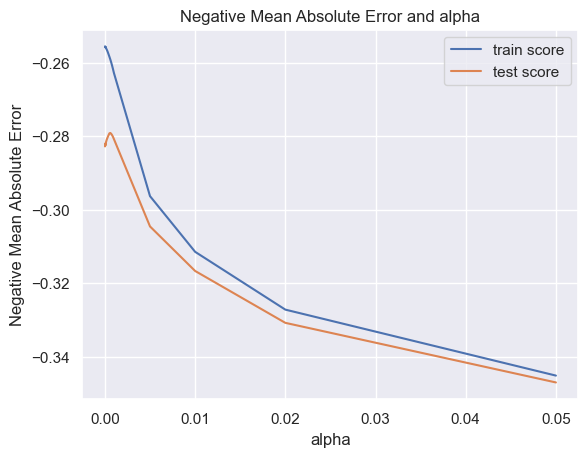

In [900]:
##Plotting mean test and train scoes with alpha 
lasso_cross_val_scores['param_alpha'] = lasso_cross_val_scores['param_alpha'].astype('float64')

##plotting
pt.plot(lasso_cross_val_scores['param_alpha'], lasso_cross_val_scores['mean_train_score'])
pt.plot(lasso_cross_val_scores['param_alpha'], lasso_cross_val_scores['mean_test_score'])
pt.xlabel('alpha')
pt.ylabel('Negative Mean Absolute Error')

pt.title("Negative Mean Absolute Error and alpha")
pt.legend(['train score', 'test score'], loc='upper right')
pt.show()

In [901]:
# get the best estimator for lambda

lasso_cv_model.best_estimator_

Lasso(alpha=0.0006)

In [902]:
# check the coefficient values with (lambda) alpha = 0.0006

lasso = Lasso(alpha=0.0006)
        
lasso.fit(X_train, y_train) 
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  0.5017142311998628
Coefficients:
 [ 0.31080855  0.13896218  0.35980228  0.11175413  0.1692675  -0.16016219
 -0.59787661 -0.231608   -0.         -0.27274602 -0.39553157 -0.36434501
 -0.37493174 -0.32750819 -0.28365659  0.14712375 -0.          0.5824354
  0.         -0.         -0.         -0.5021317  -0.39656068  0.
 -0.09150773 -0.25911353 -0.09026649 -0.7003932  -0.74076927 -0.21418209
 -0.2534733  -0.11988281 -0.28065336 -0.69717634 -0.28895179 -0.25046874
 -0.10054234 -0.00579703 -0.41781378  0.2131945   0.08640731  0.
 -0.45970529  0.08973398  0.27431795 -0.          0.09897034  0.27214235
  0.2164033   0.18678372]


In [903]:
# Creating a DataFrame to detail the features and their respective coefficients from the Lasso model
lasso_features_df = pa.DataFrame({
    'Feature': X_train.columns, 
    'Coefficient': lasso.coef_.round(4),
    'Absolute_Coefficient': abs(lasso.coef_.round(4))
})

# Sorting the DataFrame based on the absolute coefficient values in descending order for clearer insight
lasso_features_df = lasso_features_df.sort_values(by='Absolute_Coefficient', ascending=False)
lasso_features_df.reset_index(drop=True, inplace=True)

# Displaying the top 10 features with the highest impact according to the Lasso regression analysis
lasso_features_df.head(5)


Feature  Coefficient  Absolute_Coefficient
0  Neighborhood_MeadowV      -0.7408                0.7408
1   Neighborhood_IDOTRR      -0.7004                0.7004
2  Neighborhood_OldTown      -0.6972                0.6972
3         MSSubClass_45      -0.5979                0.5979
4       Foundation_Slab       0.5824                0.5824

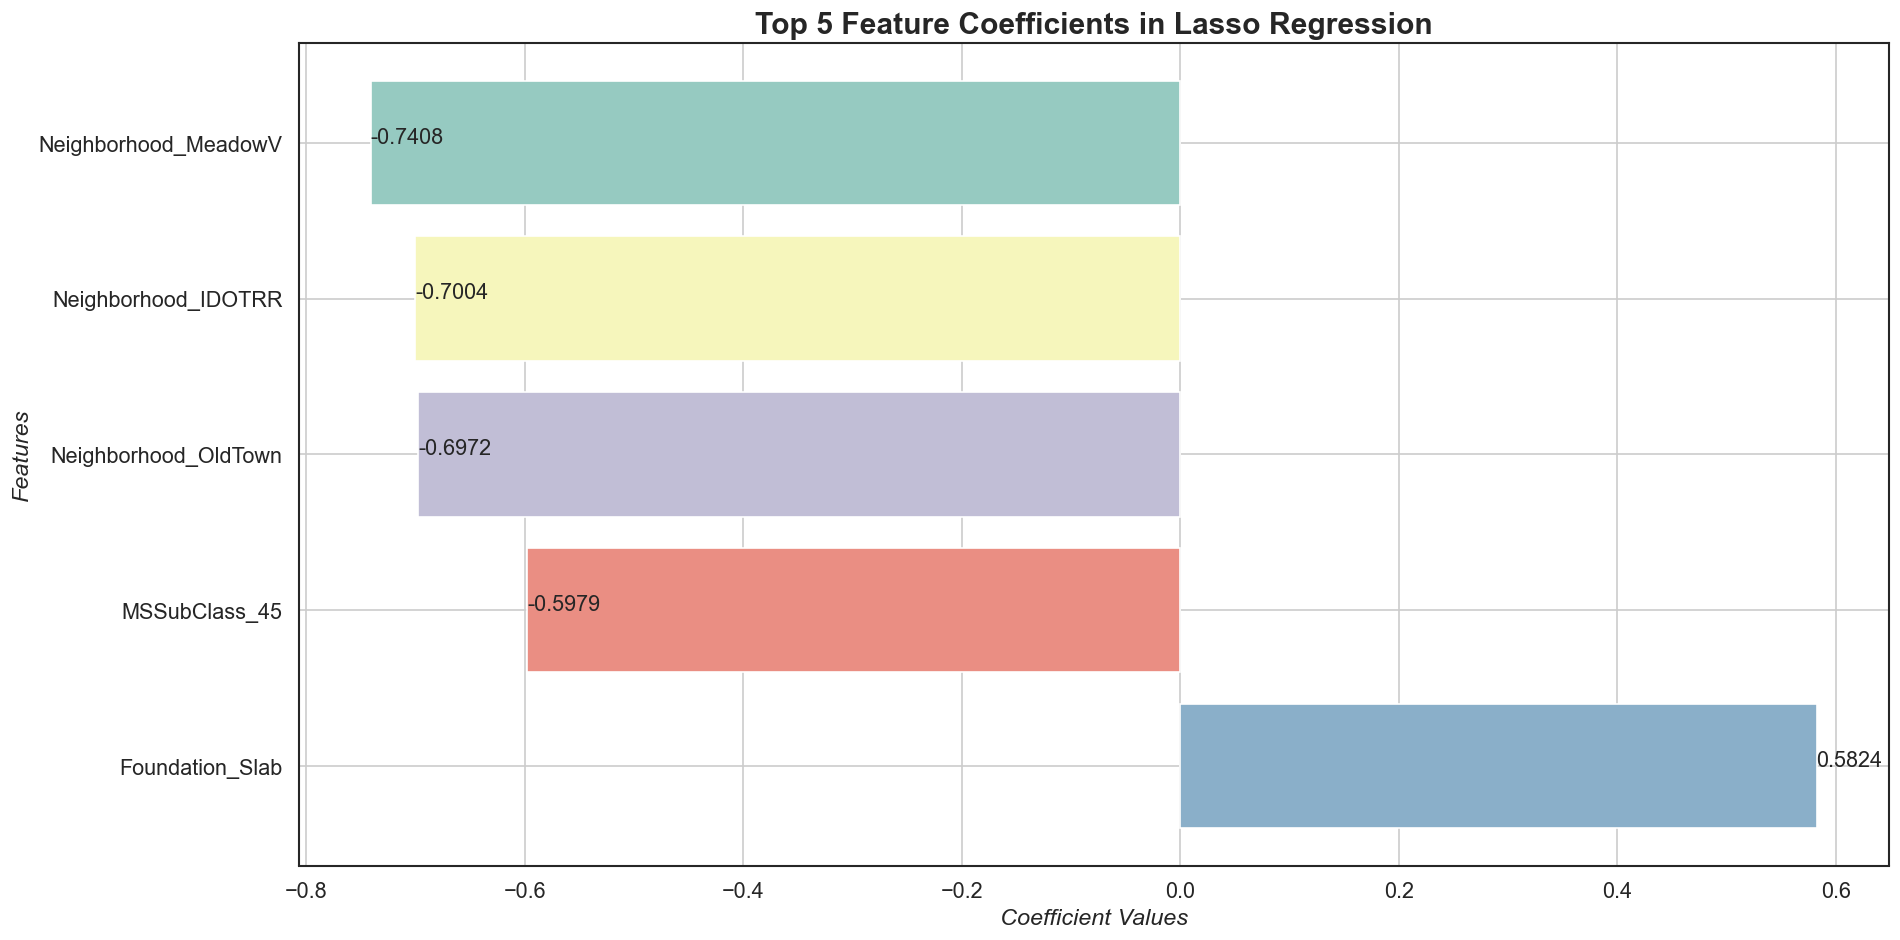

In [904]:
# Extracting the top 5 features based on their coefficients from the Lasso regression model
top5_features_lasso = lasso_features_df.head(5)

# Setting up the plot style for clarity
sb.set(style='white')
pt.figure(figsize=(16,8), dpi=120)
# Creating a bar plot to visualize the coefficients of the top 5 features identified by Lasso regression
bar_plot_lasso = sb.barplot(y=top5_features_lasso['Feature'], x=top5_features_lasso['Coefficient'], palette='Set3')

pt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
pt.ylabel('Features', fontsize=14, fontstyle='italic')
pt.title('Top 5 Feature Coefficients in Lasso Regression', fontsize=18, fontweight='bold')

# Annotating the coefficient values on the bar plot for detailed insight
coefficients = top5_features_lasso['Coefficient']
for index, value in enumerate(coefficients):
    pt.text(value, index, str(value), fontsize=13)

pt.grid(True)
pt.xticks(fontsize=13)
pt.yticks(fontsize=13)
pt.autoscale()
pt.tight_layout()
pt.show()



In [905]:
print("For New Lasso Regression Model (After eliminating the top5 features from the original model):\n","*"*125)
print("The top5 new most important predictor variables are as follows:\n\n",\
      list(top5_features_lasso['Feature']),"\n", "*"*125)

For New Lasso Regression Model (After eliminating the top5 features from the original model):
 *****************************************************************************************************************************
The top5 new most important predictor variables are as follows:

 ['Neighborhood_MeadowV', 'Neighborhood_IDOTRR', 'Neighborhood_OldTown', 'MSSubClass_45', 'Foundation_Slab'] 
 *****************************************************************************************************************************


#### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

The robustness of a model refers to its consistency across both training and testing errors and its ability to maintain stable performance, even when the dataset is slightly altered. A robust or generalizable model is one that applies successfully to new datasets beyond those it was trained and tested on. Regularization techniques play a crucial role in balancing model complexity and bias, directly influencing model robustness. By penalizing overly complex models through regularization, we ensure the model retains only the necessary complexity, thus enhancing its robustness. Achieving this balance is vital for creating models that are both simple enough to be broadly applicable yet sophisticated enough to be useful.

Moreover, the simplicity of a model is key to navigating the Bias-Variance Trade-off:

Highly complex models are unstable and sensitive to small changes in the training data, requiring adjustments for any slight dataset variation.
Conversely, simpler models, which generalize some data patterns, are more stable and less likely to undergo significant changes with the addition or removal of data points.
Bias quantifies a model's accuracy on test data, with complex models potentially being more accurate if ample training data is provided. On the other hand, overly simplistic models, such as those producing uniform results for diverse inputs, exhibit high bias due to their generally high error rates across all test inputs. Variance measures how much a model changes in response to fluctuations in the training data.

Maintaining a balance between bias and variance is crucial for optimizing model accuracy, as it helps minimize overall error, as illustrated in the accompanying graph. However, there is a trade-off between accuracy and robustness; overly precise models may overfit, performing exceptionally well on training data but poorly on new, unseen data.